# Part 8: Analysis of Treg cells

In this document, we focus on Treg cluster subsetted from the main CD4 dataset. To recapitulate the analysis, please download the Treg Seurat object available at Zenodo: [https://doi.org/10.5281/zenodo.14222418](https://doi.org/10.5281/zenodo.14222418)

In [16]:
source("diabetes_analysis_v07.R")


Attaching package: ‘Matrix’


The following object is masked from ‘package:S4Vectors’:

    expand



Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS


The following object is masked from ‘package:SeuratObject’:

    JS



Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:stats’:

  

In [ ]:
plan("multisession")

We will load the datasets of all CD4 cells and Treg cells.

In [ ]:
### CD4 All
cd4_l2  <- readRDS("../data/processed/L2/cd4_subcluster.rds")

In [3]:
## CD4 Treg
treg  <- readRDS("../data/processed/L3/cd4_l3_treg.rds")

We will add the colors and metadata for future use. 

In [4]:
treg@misc$cols_annotations  <- c( "#e56381ff","#fbca93ff",   "#a93d60ff", "#ffbdcbff",
                                 "#f9dd60ff", "#66033cff")[c(2,4,5,1)]

treg@misc$dataset_name  <- "treg"

treg@misc$all_md  <- cd4_l2@meta.data  %>% 
                            dplyr::select(Sample_ID, Condition,  
                                          Disease, 
                                          Sex, Age, Age_group, Patient_ID, 
                                          Time, Experiment_ID)   %>% unique

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.4.0 but the current version is
4.4.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.7.0 but the current
version is 1.7.2; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




ERROR: Error in cd4_l2@meta.data %>% dplyr::select(Sample_ID, Condition, Disease, : could not find function "%>%"


## Projection on L2 CD4 subcluster

Here, we will create a visualization showing Treg subclusters on the whole Cd4 dataset. 

In [ ]:
md_to_join  <- treg@meta.data  %>% dplyr::select(barcode, treg_annotations = annotations_manual)

In [ ]:
cd4_l2$annotations_manual  %>% table

In [ ]:
cd4_l2@meta.data  <- cd4_l2@meta.data  %>% left_join(md_to_join)
rownames(cd4_l2@meta.data)  <- colnames(cd4_l2)

In [ ]:
treg@misc$cols_annotations

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7.5)

DimPlot(cd4_l2, group.by = "treg_annotations", cols = treg@misc$cols_annotations)

## Treg score on L2 map

In [ ]:
#GSE15659_TREG_VS_TCONV_UP
treg_module  <- c(
'ABT1', 'ADM2', 'AFTPH', 'CRYBG2', 'ALDH3B2', 'ALG13', 'AMPD1', 'APOE', 'ARG1', 'ARHGAP12', 'ATP1B4', 'AVP', 
'GPRASP3', 'BIRC2', 'BOK', 'BTBD2', 'BUB3', 'LINC01553', 'ARMH3', 'C11orf71', 'RGCC', 'INTS14', 'KXD1', 'C1QC', 'OSER1', 
'LINC01620', 'LINC01549', 'C2orf16', 'C4orf46', 'SMIM15', 'SSMEM1', 'CAMK2D', 'CAMKV', 'ITPRID1', 'CD27', 'CDK7', 'CDKAL1', 
'CEACAM21', 'CEACAM6', 'CHMP1B', 'CLIC4', 'CMA1', 'DAXX', 'DEFB119', 'DHX8', 'DLGAP3', 'DMD', 'DNAJC14', 'DPT', 'DUOX1', 
'EIF1B', 'ENDOU', 'SELENOI', 'EXOSC9', 'FAM124A', 'BRINP3', 'GARIN3', 'FCGR1A', 'FGG',  'FMNL2',  'GAL', 'GALNT1', 
'GALNT8', 'GALNT16', 'GAPDHS', 'GDPD1', 'GHDC', 'GNA12', 'GPR161', 'GSDMC', 'GUCY2F', 'GXYLT2', 'HCN3', 'HES1', 'HFM1', 
'HIGD1B', 'H3C2', 'HLA-DPB2', 'PLAAT5', 'HSPA2', 'INPP5J', 'ITM2C', 'JOSD1', 'KLHDC3', 'KNCN', 'LCE3D', 'LEFTY1', 
'LGR4', 'LHX2', 'LIPJ', 'PLPPR5-AS1', 'HMGN3-AS1', 'NKX2-1-AS1', 'TNFRSF14-AS1', 'LINC01107', 
'RBAKDN', 'LINC02139', 'HTATSF1P2', 'LRATD1', 'KIAA2012-AS1', 'PRSS59P', 'FAM238B', 'LRRC56', 'LRRCC1', 'MADD', 
'MAF1', 'MAST3', 'MFAP3L', 'MMP15', 'MOSPD2', 'MSL2', 'MTPAP', 'NAF1', 'NANOS3', 'NAT8B', 'LINC00269', 'NEBL', 
'NTM', 'OR5I1', 'OR5L2', 'PAK5', 'PALM', 'PAPOLG', 'PCP4', 'PKDREJ', 'PLK3', 'PNCK', 'PRKAB1', 'PRSS58', 'PRTG', 
'PTP4A1', 'PTPRZ1', 'EPRS1', 'RAB11FIP4', 'RABEP1', 'RASSF9', 'RHBDL2', 'RNF121', 'RNF183', 'RNF20', 'MRM3', 'ROBO1', 
'ROS1', 'RPA1', 'RTN4', 'S1PR3', 'SCN7A', 'SDC3', 'SDHAF1', 'SDHAF2', 'SEPTIN4', 'SEPTIN7P2', 'SH3PXD2B', 'SLC17A4', 
'SLC1A2', 'SLC2A10', 'SLC2A13', 'SLC39A10', 'SLC43A1', 'SLC5A8', 'SNORA71A', 'SNORA71B', 'SREBF2', 'SYCP2L', 'SYNPO2', 
'TBC1D14', 'TCN2', 'THAP1', 'TLK2', 'TMEM59L', 'TNFRSF10A', 'TOPORS', 'TREML1', 'TRPV5', 
'TSC2', 'UBAC1', 'UBAP2L', 'UBE2Z', 'UPRT', 'VTCN1', 'WFDC3', 'WWP1', 'WWTR1-AS1', 'XIST', 'ZFP57', 'ZNF214', 'ZNF221', 
'ZNF345', 'ZNF597', 'ZNF622', 'ZNF765', 'ZNF846', 'ZRANB1'
)

In [ ]:
table(treg_module %in% rownames(cd4_l2@assays$RNA))

In [ ]:
which(treg_module %in% rownames(cd4_l2@assays$RNA))

In [ ]:
# Genes from comparison Treg vs Naive in our data
treg_gene_sig  <- c('S100A4', 'FOXP3', 'ITGB1', 'AHNAK', 'TIGIT', 'ANXA2', 'IL10RA',                     'TNFRSF1B', 'GBP5', 'LGALS1', 'RTKN2', 'CTLA4', 'S100A10', 'IL32',                     'FCRL3', 'IL2RA', 'CLIC1', 'KLF6', 'ANXA5', 'SYNE2', 'S100A11',                     'CD74', 'CRIP1', 'EZR', 'NIBAN1', 'FLNA', 'NCF4', 'PRDM1', 'LGALS3', 
                    'CAPN2', 'ARID5B', 'SH3BGRL3', 'CST7', 'ISG20', 'MYO1F', 'LMNA',                    'HLA-DRB5', 'TENT5C', 'GAPDH', 'MTHFD2', 'FANK1', 'HLA-DQA1',                     'IL2RB', 'IKZF2', 'SRGN', 'STAM', 'CLDND1', 'DUSP4', 'BIRC3',                     'SAT1', 'PBXIP1', 'HLA-DRB1', 'HLA-DPA1', 'TNFRSF4', 'SHMT2',                     'TAGLN2', 'PLP2', 'ACTN4', 'DUSP1', 'RORA', 'CD99', 'GLCCI1', 
                    'CARD16', 'PTTG1', 'TSPAN5', 'TAP1', 'OPTN', 'EIF3A', 'ELOVL5',                    'LSR', 'GSTK1', 'ZFP36', 'TIFA', 'BATF', 'EMP3', 'TSC22D3', 'OGDH',                    'HLA-DPB1', 'CCDC50', 'LIMS1', 'RAB11FIP1', 'TRAC', 'CD84', 'CAST',                     'PYHIN1', 'JPT1', 'MPST', 'SAMSN1', 'ZC2HC1A', 'PMAIP1', 'S100A6', 
                    'PI16', 'OAS1', 'PPP1R18', 'NCR3', 'CD58', 'DOK2', 'BCL2L11',                     'SMAD3', 'GBP2', 'SYT11', 'PPP2R5C', 'PPP1R15A', 'RGS1', 'RAB37',                     'REEP5', 'IKZF3', 'RNF214', 'IRF1', 'ANTKMT', 'PRDX1', 'IQGAP2', 'MT2A',                     'TNFRSF18', 'FAS', 'DUSP2', 'CCDC167', 'HLA-DRA', 'PELI1', 'JUNB', 'LGALS9', 
                    'ZBTB38', 'SPTAN1', 'SMS', 'PARP1', 'MCL1', 'DYNLL1', 'HERC5', 'CDC25B',                     'SLC9A3R1', 'MYO1G', 'TPR', 'JUN', 'ID3', 'TPI1', 'RILPL2', 'CCR6',                     'YWHAH', 'PTGER2', 'HNRNPLL', 'PREX1', 'PSMB9', 'MYH9', 'CORO1B', 'SLAMF1',                     'SIT1', 'NPDC1', 'PHACTR2', 'ST8SIA6', 'ATP2B4', 'IL18R1', 'TRIM22', 'HLA-DQB1', 
                    'F5', 'TBC1D4', 'MAF', 'ATP2B1', 'C4orf48', 'GALM', 'C12orf75', 'CPA5',                     'PPP1CA', 'S1PR4', 'PDE4DIP', 'GATA3', 'GLIPR2', 'CHST7', 'CXCR4', 'H1-4',                     'GADD45B', 'RESF1', 'IER2', 'ISG15', 'CDC42EP3', 'PCBD1', 'LYST', 'TPM4',                     'TAB2', 'NINJ2', 'ALOX5AP', 'CCR4', 'FCER1G', 'MAP3K1', 'CXCR3', 'CD59',                     'SLFN5', 'CCNG2', 'ITGA4', 'SESN1', 'SPATS2L', 'HPGD', 'EFHD2', 'LIMA1',                     'BCL2', 'RABGAP1L', 'TOX', 'SAMD9', 'TXN', 'IFI16', 'IDS', 'TRIB2', 'CDHR3',                     'PALM2AKAP2', 'ICA1', 'LPAR6', 'KLRB1', 'SMC6', 'ITM2C', 'CEACAM4', 'PRF1', 
                    'CD63', 'AHR', 'IQGAP1', 'GADD45A', 'ADAM8', 'GLIPR1', 'VAV3', 'EPSTI1',                     'GPRIN3', 'POU2F2', 'SH2D2A', 'DENND10', 'MAP4', 'CCR10', 'PTPN18', 'IER5', 
                    'GPR183', 'LAIR2', 'CTSC', 'TTN', 'NR4A2', 'SESN3', 'CPNE2', 'MX1')


In [ ]:
#GSE15659_NAIVE_CD4_TCELL_VS_ACTIVATED_TREG_DN
NAIVE_CD4_TCELL_VS_ACTIVATED_TREG_DN  <- c('LINC00310', 'PPM1K', 'PPP2R1A', 'PPP2R5A', 'PPP4R2', 'DESI2', 'PRAMEF12', 'PRDM1', 'PRDX4', 'PRG3', 'PRKAG3', 'PRRG3', 'PSEN1', 'PSMA2', 'PSMA6', 'PSMG2', 'PSRC1', 'PTH2R', 'PTPN18', 'PVR', 'NECTIN4', 'PXDNL', 'PYHIN1', 'RAB2B', 'RAB8B', 'RAMP1', 'RANBP9', 'RANGRF', 'RAP2B', 'RASD1', 'RBM28', 'RBPMS', 'RD3', 'REM2', 'RENBP', 'RGS17', 'RGS4', 'RHBDL2', 'RHOC', 'RHOH', 'RNF10', 'RNF113A', 'RNF167', 'RNF19A', 'RNF214', 'ROCK1', 'ROPN1B', 'ROS1', 'RPE65', 'RPL26L1', 'RRM1', 'RSPH1', 'RSPH10B2', 'RTP1', 'RTP3', 'RUSC1', 'S100A16', 'S1PR2', 'SAGE1', 'SAP30BP', 'SARS2', 'SCARF2', 'SCEL', 'SCGB3A2', 'SCN8A', 'SCO2', 'SEC23B', 'SEC24D', 'SEMA4A', 'SEMA6A', 'SEMA7A', 'SEPHS2', 'SEPTIN3', '', 'SF3B4', 'SGO2', 'SH2D1A', 'SHB', 'SHISA6', 'SHMT2', 'SLC16A11', 'SLC22A1', 'SLC22A18', 'SLC25A2', 'SLC35F3', 'SLC39A1', 'SLC39A7', 'SLC41A1', 'SLC43A3', 'SLC44A3', 'SLC45A1', 'SLC4A2', 'SLC4A9', 'SLC6A7', 'SLC9A5', 'SLC9A8', 'SLFNL1', 'SNAI2', 'SNAP91', 'SNED1', 'SNORA65', 'SNRNP40', 'SNX3', 'SOX11', 'SOX2-OT', 'SPATA12', 'SPATA5L1', 'SPATC1', 'SPATS2L', 'SPDYA', 'SRL', 'SSR2', 'DENND2B', 'ST7-AS1', 'STARD4', 'STK16', 'STK25', 'STK32A', 'SYN2', 'TAS2R9', 'TBC1D4', 'TBCCD1', 'TBX3', 'TCP10L3', 'TDRD7', 'TFF2', 'THBS2', 'THRB', 'TIMM17A', 'TINF2', 'TK1', 'TLCD1', 'TLR4', 'TMBIM1', 'TMCO5A', 'TMEM125', 'TMEM126A', 'ARHGAP42', 'TMEM158', 'STING1', 'TMEM208', 'EMC4', 'TNF', 'TOMM22', 'TOP3A', 'TOR1AIP1', 'TP53I13', 'TP53INP2', 'TP63', 'TPI1', 'TPMT', 'TPSAB1', 'TRAK1', 'TRAPPC6B', 'TRIM16', 'TRIML1', 'TRIP12', 'TRPM6', 'TSNAX', 'GFUS', 'TTC33', 'TTC7A', 'TTL', 'U2AF1', 'UBE2J1', 'UBE2U', 'UBE4B', 'UBL3', 'UBL7', '', 'UGT2B17', 'LINC01121', 'USP43', 'UTS2B', 'VAMP3', 'WARS1', 'WDHD1', 'DNAAF10', 'GET1', 'ZAN', 'ZBED6', 'ZC3H13', 'ZCCHC13', 'ZFAND5', 'ZFP36L1', 'ZIC1', 'ZMIZ2', 'ZNF142', 'ZNF277', 'ZNF28', 'ZNF324B', 'ZNF34', 'ZNF394', 'ZNF414', 'ZNF557', 'ZNF596', 'ZNF861P', 'POLR1H', 'ZPBP2', 'ZSCAN29'
)

In [ ]:
Idents(cd4_l2)  <- cd4_l2$annotations_manual

In [ ]:
mrk_treg  <- FindMarkers(cd4_l2, `ident.1` = "Treg")

In [ ]:
 mrk_treg  %>% arrange(desc(avg_log2FC))  %>% slice_head(n = 200)

In [ ]:
treg_mrk_our_data  <- mrk_treg  %>% arrange(desc(avg_log2FC))  %>% slice_head(n = 200)  %>% 
rownames_to_column("gene") %>% pull(gene)

In [ ]:
treg_mrk_our_data

In [ ]:
#GSE15659_NAIVE_CD4_TCELL_VS_RESTING_TREG_DN
NAIVE_CD4_TCELL_VS_RESTING_TREG_DN  <- c('CCDC97', 'CTNS', 'RAB17', 'RAB35', 'RAB8B', 'RAB9A', 'RAMP1', 'RANBP9', 'RASD1', 'RGPD5', 'RGS17', 'RHBDL2', 'RHOC', 'RHOH', 'RIPPLY2', 'RND2', 'RNF113A', 'RNF19A', 'ROS1', 'RPL3L', 'RRM1', 'RSPH10B2', 'RTP1', 'RTP3', 'RUSC1', 'S100A16', 'S1PR2', 'SAGE1', 'SAMSN1', 'SAP30BP', 'SARS2', 'SCAMP5', 'SCARF2', 'SCGB3A2', 'SCN8A', 'SCO2', 'SDCCAG3', 'SECISBP2', 'SEMA4A', 'SEMA6A', 'SEMA7A', 'SEPT3', 'SERHL2', 'SERPINA9', 'SERPINB10', 'SETD6', 'SF3B4', 'SGOL2', 'SHB', 'SHE', 'SHMT2', 'SKI', 'SLC16A11', 'SLC22A1', 'SLC22A18', 'SLC24A6', 'SLC25A2', 'SLC26A11', 'SLC26A3', 'SLC43A2', 'SLC43A3', 'SLC4A11', 'SLC4A2', 'SLC6A7', 'SLC9A5', 'SLFNL1', 'SNAI3', 'SNAP91', 'SNCA', 'SNHG12', 'SNHG4', 'SNORA65', 'SOX2OT', 'SP6', 'SPACA7', 'SPATA12', 'SPATA2', 'SPATA22', 'SPATC1', 'SPATS2L', 'SPCS2', 'SPDYA', 'SRL', 'SSR2', 'ST7-AS1', 'STARD4', 'STC2', 'STK16', 'STK25', 'STK32A', 'SULT1B1', 'SYN2', 'TAS2R9', 'TBCCD1', 'TCEAL8', 'TCN2', 'TFF2', 'TGIF2LY', 'THBD', 'THBS2', 'THRB', 'TIFAB', 'TIMM23B', 'TINF2', 'TK1', 'TLCD1', 'TLL2', 'TLN2', 'TLX3', 'TMCO5A', 'TMCO6', 'TMEM125', 'TMEM133', 'TMEM139', 'TMEM158', 'TMEM208', 'TMEM70', 'TMLHE', 'TNF', 'TNFSF12', 'TNNC1', 'TNR', 'TOP3A', 'TP53', 'TP53I13', 'TP63', 'TPMT', 'TPR', 'TRABD', 'TRAK1', 'TREX1', 'TRIM36', 'TRIM54', 'TRPM6', 'TSNARE1', 'TTC12', 'TTC7A', 'TTL', 'TTLL12', 'TTLL13', 'TTTY13', 'TTTY15', 'TYSND1', 'UBE2D1', 'UBE2U', 'UBE4B', 'UBL3', 'UBL7', 'UG0898H09', 'UNQ6975', 'USP11', 'USP7', 'UTP23', 'UTS2D', 'VASN', 'VCPIP1', 'VEGFB', 'VENTXP1', 'VSTM1', 'WARS', 'WDR33', 'WDR74', 'WDR89', 'WDR90', 'WDR92', 'WFS1', 'WISP3', 'WNT9B', 'YIPF2', 'YRDC', 'ZAN', 'ZCCHC13', 'ZIC1', 'ZMIZ2', 'ZMYND11', 'ZNF131', 'ZNF142', 'ZNF187', 'ZNF193', 'ZNF200', 'ZNF268', 'ZNF28', 'ZNF285', 'ZNF34', 'ZNF385D', 'ZNF430', 'ZNF432', 'ZNF44', 'ZNF530', 'ZNF579', 'ZNF585B', 'ZNF596', 'ZNF643', 'ZNF644', 'ZNF665', 'ZNF678', 'ZNF861P', 'ZNRF2', 'ZSCAN12', 'ZSCAN29')

In [ ]:
colnames(cd4_l2@meta.data@meta.data)

In [ ]:
DefaultAssay(cd4_l2)  <- "RNA"

In [ ]:
cd4_l2  <- AddModuleScore(cd4_l2, features = NAIVE_CD4_TCELL_VS_RESTING_TREG_DN[which(NAIVE_CD4_TCELL_VS_RESTING_TREG_DN %in% rownames(cd4_l2@assays$RNA))],
                                   search = T,
  ctrl = 50,
  nbin = 50,
  assay = "RNA",
  name = 'treg_module')

In [ ]:
cd4_l2  <- AddModuleScore(cd4_l2, features = treg_module[which(treg_module %in% rownames(cd4_l2@assays$RNA))],
                                   search = T,
  ctrl = 50,
  nbin = 50,
  assay = "RNA",
  name = 'treg_module')

In [ ]:
cd4_l2  <- AddModuleScore(cd4_l2, features = treg_mrk_our_data,
                                   search = F,
  ctrl = 50,
  nbin = 50,
  assay = "RNA",
  name = 'treg_mrk_our_data')

In [ ]:
cd4_l2  <- AddModuleScore(cd4_l2, features = NAIVE_CD4_TCELL_VS_RESTING_TREG_DN[which(NAIVE_CD4_TCELL_VS_RESTING_TREG_DN %in% rownames(cd4_l2@assays$RNA))],
                                   search = T,
  ctrl = 50,
  nbin = 50,
  assay = "RNA",
  name = 'NAIVE_CD4_TCELL_VS_RESTING_TREG_DN')

In [ ]:
cd4_l2  <- AddModuleScore(cd4_l2, features = treg_gene_sig,
                                   search = F,
  ctrl = 50,
  nbin = 50,
  assay = "RNA",
  name = 'treg_gene_sig')

In [ ]:
VlnPlot(cd4_l2, features = "treg_mrk_our_data1", pt.size = 0, group.by = "annotations_manual")

In [ ]:
VlnPlot(cd4_l2, features = "treg_gene_sig1", pt.size = 0, group.by = "annotations_manual")

In [ ]:
VlnPlot(cd4_l2, features = "treg_module1", pt.size = 0, group.by = "annotations_manual")

In [ ]:
FeaturePlot(cd4_l2,  features = "treg_module1", min.cutoff = 2)

In [ ]:
FeaturePlot(cd4_l2,  features = "treg_gene_sig1")

In [ ]:
FeaturePlot(cd4_l2,  features = "NAIVE_CD4_TCELL_VS_RESTING_TREG_DN1")

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 7.5)
FeaturePlot(cd4_l2,  features = c("NR4A1","NR4A3","CCR8","IKZF2","TNFRSF18","IRF4"), ncol = 3)

In [ ]:
cd4_l2@meta.data  <- cd4_l2@meta.data  %>% mutate(
    annotations_treg_and_all = if_else(annotations_manual == "Treg",
                                          treg_annotations,
                                          annotations_manual)) 

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7.5)

DimPlot(cd4_l2, group.by = "treg_annotations")

In [ ]:
DimPlot(cd4_l2, group.by = "annotations_treg_and_all")

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7.5)

VlnPlot(cd4_l2, features = "treg_mrk_our_data1", pt.size = 0, group.by = "annotations_treg_and_all")

VlnPlot(cd4_l2, features = "treg_gene_sig1", pt.size = 0, group.by = "annotations_treg_and_all")

VlnPlot(cd4_l2, features = "treg_module1", pt.size = 0, group.by = "annotations_treg_and_all")

VlnPlot(cd4_l2, features = "NAIVE_CD4_TCELL_VS_RESTING_TREG_DN1", pt.size = 0, group.by = "annotations_treg_and_all")

In [ ]:
seurat_meta_data$annotations_treg_and_all_sample  %>% table

In [ ]:
pull(seurat_meta_data, sample)  %>% unique

In [ ]:
# Extract the dataframe with seurat metadata
cd4_l2$annotations_treg_and_all_sample  <- paste(cd4_l2$annotations_treg_and_all, cd4_l2$Sample_ID)
seurat_meta_data <- cd4_l2@meta.data
seurat_meta_data$sample <- seurat_meta_data$annotations_treg_and_all_sample

# Select genes of interest
# The script only works for two or more genes, you can't select just one!
gene_hits <- c("FOXP3", "IL2RB", "IL2RA", "TIGIT", 
               "CTLA4", "IL10RA", "NR4A1", "NR4A3", 
               "IKZF2", "CCR4", "IZUMO1R")

# By default the percentage of calculated cells is computed for whole sample
# Optionally, you can select a cluster that you're interested in by subsetting:
# pbmc_small <- subset(pbmc_small, seurat_clusters == 3)


# Now we will calculate the percentage of expressing cells for each sample and we will merge the resulting dataframes
expr_data4 <- data.frame(genes = gene_hits)

# We will need a function that will convert any non-zero count to value 1
fns_replace <- function(x){ifelse(x>0,1,0)}

for(j in (pull(seurat_meta_data, sample)  %>% unique)){
  
  # subset only selected cell type
  seu_sub_sample <- subset(cd4_l2, annotations_treg_and_all_sample == j) 
  
  # select the rows corresponding to genes of interest
  index_subset <- which(rownames(seu_sub_sample@assays$RNA@counts) %in% gene_hits)
  
  # create a dataframe with genes of interest and cells of interest
  expr_data <- as.data.frame(seu_sub_sample@assays$RNA@counts[index_subset,]) 
  
  # convert expression to binary values
  expr_data2 <- expr_data %>% mutate(across(.fns = fns_replace))
  rownames(expr_data2) <- rownames(expr_data)
  
  # calculate average expresion (percentage of cells expressing the gene)
  expr_data3 <- rowMeans(expr_data2)
  
  # add zeroes in cases of no expression
  for(k in gene_hits){
    if(k %in% names(expr_data3) == F){expr_data3[[k]] <- 0}
  }
  
  expr_data3 <- as.data.frame(expr_data3)
  colnames(expr_data3) <- j
  expr_data3$genes <- rownames(expr_data3)
  
  # final dataframe with values in correct order (all cell type, loop results)
  expr_data4 <- left_join(expr_data4, expr_data3, by="genes")
  
}

# Now we have the whole dataframe, we just need to tidy it a bit, add metadata and visualize

expr_data5 <- as.data.frame(t(expr_data4))
colnames(expr_data5) <- expr_data5[1,]
expr_data5 <- expr_data5[2:nrow(expr_data5),]
expr_data5$sample <- rownames(expr_data5)
expr_data5 <- expr_data5 %>% pivot_longer( !sample, names_to = "gene", values_to = "pct_express")

# Add metadata per sample - select those that you will use in the plot below
md_to_join <- seurat_meta_data %>% dplyr::select(sample = annotations_treg_and_all_sample)  %>% 
unique() %>% mutate(sample = as.character(sample))
md2 <- left_join(expr_data5, md_to_join, by = "sample") %>% ungroup %>% unique



In [ ]:
md2

In [ ]:
options(repr.plot.width = 30, repr.plot.height = 16)

md2 %>% 
pivot_wider(names_from = "gene", values_from = "pct_express", values_fill = "0")  %>% 
pivot_longer(cols = c(2:8), names_to = "gene", values_to = "pct_express")  %>% 
mutate(sample_id = substr(sample,nchar(sample)-3,nchar(sample)))  %>% 
mutate(population = substr(sample,1,nchar(sample)-4))  %>% 

ggplot(aes(x = population, y = as.numeric(pct_express))) + 
 geom_violin(alpha = 0.3, aes(fill = population), scale = "width") + 
 
geom_beeswarm(size = 1.5, aes(fill = population), cex = 2, 
                shape = 21, color = "grey40",corral = "random") +
 stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
 #stat_compare_means(label = "p.format", comparisons = list(c(1,2))) +
  theme_minimal() + 
  facet_wrap(~gene, scales = "free", ncol = 5) + 
  ylim(c(0,NA)) +
#ggpubr::stat_compare_means()+
  ylab("Percentage of expressing cells") +
  theme_classic() + ggtheme() +
 theme(legend.title = element_blank(),axis.text.x = element_text(angle = 90)) 

#ggsave("../figures/scRNAseq_gd_characterization.svg", width = 13, height = 9)

In [ ]:
md2  %>% pull(gene)  %>% unique  

In [ ]:
md2 %>% 
pivot_wider(names_from = "gene", values_from = "pct_express", values_fill = "0")  %>% colnames()

In [ ]:
options(repr.plot.width = 25, repr.plot.height = 8)
md2 %>% 
pivot_wider(names_from = "gene", values_from = "pct_express", values_fill = "0")  %>% 
pivot_longer(cols = c(2:7), names_to = "gene", values_to = "pct_express")  %>% 
mutate(sample_id = substr(sample,nchar(sample)-3,nchar(sample)))  %>% 
mutate(population = substr(sample,1,nchar(sample)-4))  %>% 
dplyr::filter(grepl(population, pattern = "Treg")|population == "Naive")  %>% 

ggplot(aes(x = population, y = as.numeric(pct_express))) + 
 geom_violin(alpha = 0.7, aes(fill = population), scale = "width") + 
 
#geom_beeswarm(size = 1.5, aes(fill = population), cex = 2, 
#                shape = 21, color = "grey40",corral = "random") +
 stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey20") +
 #stat_compare_means(label = "p.format", comparisons = list(c(1,2))) +
scale_fill_manual(values = c("grey50",treg@misc$cols_annotations[c(3,1,2,4)]))+
scale_color_manual(values = c("grey50",treg@misc$cols_annotations[c(3,1,2,4)]))+

  theme_minimal() + 
  facet_wrap(~gene, scales = "free", ncol = 7) + 
  ylim(c(0,NA)) +
#ggpubr::stat_compare_means()+
  ylab("Percentage of expressing cells") +
  theme_classic() + ggtheme() +
 theme(legend.title = element_blank(),axis.text.x = element_text(angle = 90)) 

In [ ]:
ggsave(filename = "../figures/subset_characterization/treg_genes_violin.svg", 
      width = 50, height = 18, units = "cm", create.dir = TRUE)

## Frequency plot figure

In [ ]:
treg_subset  <- subset(treg, Condition %in% c("Ctrl T0", "Dia T0", "Dia T1") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20")) 

In [ ]:
df4  <- create_df4(treg_subset)

In [ ]:
df4

In [ ]:
 p5  <-   df4  %>% 
filter(Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
  ggplot(aes(x = Condition, y = freq*100)) + # you can change the x to whatever variable you're interested in
   geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
geom_beeswarm(size = 3, cex = 3, 
              color = "black", method = "center",
             aes(fill = Condition), shape = 21) +
   facet_wrap(~annotations_manual, scales = "free", ncol = 9) +
  ylab("Frequency") +
  xlab("Condition") +
  theme_classic() +
ggtheme() +
ggpubr::stat_compare_means(label.x= 1.5, 
                           size = 7, vjust = -1, label = "p.format", comparisons = list(c(1,2)))+
ggtheme() +
 scale_y_continuous(limits = c(0,NA), expand = c(0.05,0,0,10)) +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) + NoLegend() + ggtitle("Final data all groups")
ncols = length(levels(factor(df4$annotations_manual)))

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 7)
p5

In [ ]:
ggsave("../figures/subset_characterization/treg_subsets_in_condition.svg",
       width = 25, height = 12, units = "cm")

In [ ]:
df4

In [ ]:
    p5  <-   df4  %>% 
filter(Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
dplyr::filter(Patient_ID != "116")  %>% 
  ggplot(aes(x = Condition, y = freq*100)) + # you can change the x to whatever variable you're interested in
   geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
geom_beeswarm(size = 3, cex = 3, 
              color = "black", method = "center",
             aes(fill = Condition), shape = 21) +
   facet_wrap(~annotations_manual, scales = "free", ncol = 9) +
  ylab("Frequency") +
  xlab("Condition") +
  theme_classic() +
ggtheme() +
ggpubr::stat_compare_means(label.x= 1.5, 
                           size = 7, vjust = -1, label = "p.format", comparisons = list(c(2,3)), paired = TRUE)+
ggtheme() +
 scale_y_continuous(limits = c(0,NA), expand = c(0.05,0,0,10)) +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) + NoLegend() + ggtitle("Final data all groups")
ncols = length(levels(factor(df4$annotations_manual)))

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 7)
p5

In [ ]:
### Ratio

## Treg density

In [ ]:
density  <- treg_subset@meta.data  %>% dplyr::select(Sample_ID, Condition)

density$x_umap  <- treg_subset@reductions$umap@cell.embeddings[,1]
density$y_umap  <- treg_subset@reductions$umap@cell.embeddings[,2]


library(ggplot2)
library(dplyr)
library(viridis)

colfunc <- colorRampPalette(c("white", "grey85","grey75","dodgerblue","green","yellow","red"))


In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)

p1  <- density %>%
filter(Condition == "Dia T0")  %>% 
  ggplot(aes(x=x_umap, y= y_umap)) + 
 geom_point(shape = "")  + geom_density_2d_filled(bins = 30)  + 
theme_classic() + ggtheme() +
xlim(-10,10)+  ylim(-8,8) +
scale_fill_manual(values = colfunc(30))  + 
ggtitle("Dia T0") + NoLegend()

p2   <-   density %>%
filter(Condition == "Ctrl T0")  %>% 
  ggplot(aes(x=x_umap, y= y_umap)) + 
 geom_point(shape = "")  + geom_density_2d_filled(bins = 30)  + 
theme_classic() + ggtheme() +
xlim(-10,10)+  ylim(-8,8) +
scale_fill_manual(values = colfunc(30))  + 
ggtitle("Ctrl T0") + NoLegend()


p1 + p2

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1  <- density %>%
filter(Condition == "Dia T0")  %>% 
  ggplot(aes(x=x_umap, y= y_umap)) + 
 geom_point(shape = "")  + geom_density_2d_filled(bins = 30)  + 
theme_classic() + ggtheme() +
xlim(-10,10)+  ylim(-8,8) +
scale_fill_manual(values = colfunc(30))  + 
ggtitle("Dia T0") + NoLegend()

In [ ]:
p2   <-   density %>%
filter(Condition == "Ctrl T0")  %>% 
  ggplot(aes(x=x_umap, y= y_umap)) + 
 geom_point(shape = "")  + geom_density_2d_filled(bins = 30)  + 
theme_classic() + ggtheme() +
xlim(-10,10)+  ylim(-8,8) +
scale_fill_manual(values = colfunc(30))  + 
ggtitle("Ctrl T0") + NoLegend()

In [ ]:
p3  <-  density %>%
filter(Condition == "Dia T1")  %>% 
  ggplot(aes(x=x_umap, y= y_umap)) + 
 geom_point(shape = "")  + geom_density_2d_filled(bins = 30)  + 
theme_classic() + ggtheme() +
xlim(-10,10)+  ylim(-8,8) +
scale_fill_manual(values = colfunc(30))  + 
ggtitle("Dia T1") + NoLegend()

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 5)
p1 + p2 + p3

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 + geom_vline(xintercept = 6.8) + 
geom_vline(xintercept = 2.8) + 
geom_hline(yintercept = -1.5) + 
geom_hline(yintercept = -5) + p2 + 
geom_vline(xintercept = 6.8) + 
geom_vline(xintercept = 2.8) + 
geom_hline(yintercept = -1.5) + 
geom_hline(yintercept = -5) + p3 +
geom_vline(xintercept = 6.8) + 
geom_vline(xintercept = 2.8) + 
geom_hline(yintercept = -1.5) + 
geom_hline(yintercept = -5) 

In [ ]:
treg_subset$umap1  <- treg_subset@reductions$umap@cell.embeddings[,1]
treg_subset$umap2  <- treg_subset@reductions$umap@cell.embeddings[,2]


In [ ]:
treg_subset$cells_in_gate  <- ifelse(treg_subset$umap1 < 6.8 & treg_subset$umap1 > 2.8 &
                                     treg_subset$umap2 < -1.5 & treg_subset$umap2 > -5,
                                     "gate","no_gate")

In [ ]:
DimPlot(treg_subset, group.by = "cells_in_gate")

In [ ]:
df4

In [ ]:
seurat_meta_data <- treg_subset@meta.data

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(Sample_ID, cells_in_gate) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 

# Control - all sums should be one
#df4 %>% group_by(Sample_ID) %>% summarise(sum = sum(freq))

# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(Sample_ID, Condition, Disease, Patient_ID) %>% unique()
df4  <- left_join(df4, md_to_join, by = "Sample_ID")

# add zero which was not added to table
pt_454_gate  <- df4  %>% filter(freq == 1)
pt_454_gate$cells_in_gate  <- "gate"
pt_454_gate$n  <- 0
pt_454_gate$freq  <- 0

df4  <- rbind(df4, pt_454_gate)

In [ ]:
options(repr.plot.width = 7.5, repr.plot.height = 4)
# The final plot

df4 %>% ggplot(aes(x = Condition, y = freq)) + # you can change the x to whatever variable you're interested in
    geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
geom_beeswarm(size = 3, cex = 3, 
              color = "black", method = "center",
             aes(fill = Condition), shape = 21) +
facet_wrap(~cells_in_gate, scales = "free") +
  ylab("Frequency") +
  xlab("Condition") +
  ylim(c(-0.001,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
stat_compare_means(comparisons = list(c(1,2))) + ggtheme() + NoLegend()
ggsave("../figures/subset_characterization/treg_gate.svg",
       width = 14, height = 10, units = "cm")

In [ ]:
df4 %>% dplyr::filter(Patient_ID != 116)  %>% 
ggplot(aes(x = Condition, y = freq)) + # you can change the x to whatever variable you're interested in
    geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
geom_beeswarm(size = 3, cex = 3, 
              color = "black", method = "center",
             aes(fill = Condition), shape = 21) +
facet_wrap(~cells_in_gate, scales = "free") +
  ylab("Frequency") +
  xlab("Condition") +
  ylim(c(-0.001,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
stat_compare_means(comparisons = list(c(2,3)), paired = TRUE) + ggtheme()

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 + geom_vline(xintercept = -4) + 
geom_vline(xintercept = -8) + 
geom_hline(yintercept = 0.5) + 
geom_hline(yintercept = 4.5) + p2 + 
geom_vline(xintercept = -4) + 
geom_vline(xintercept = -8) + 
geom_hline(yintercept = 0.5) + 
geom_hline(yintercept = 4.5) + p3 +
geom_vline(xintercept = -4) + 
geom_vline(xintercept = -8) + 
geom_hline(yintercept = 0.5) + 
geom_hline(yintercept = 4.5) 

In [ ]:
treg_subset$umap1  <- treg_subset@reductions$umap@cell.embeddings[,1]
treg_subset$umap2  <- treg_subset@reductions$umap@cell.embeddings[,2]


In [ ]:
treg_subset$cells_in_gate  <- ifelse(treg_subset$umap1 < -4 & treg_subset$umap1 > -8 &
                                     treg_subset$umap2 < 4.25 & treg_subset$umap2 > 0.75,
                                     "gate","no_gate")

In [ ]:
DimPlot(treg_subset, group.by = "cells_in_gate")

In [ ]:
seurat_meta_data <- treg_subset@meta.data

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(Sample_ID, cells_in_gate) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 

# Control - all sums should be one
#df4 %>% group_by(Sample_ID) %>% summarise(sum = sum(freq))

# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(Sample_ID, Condition, Disease, Patient_ID) %>% unique()
df4  <- left_join(df4, md_to_join, by = "Sample_ID")

# add zero which was not added to table
pt_454_gate  <- df4  %>% filter(freq == 1)
pt_454_gate$cells_in_gate  <- "gate"
pt_454_gate$n  <- 0
pt_454_gate$freq  <- 0

df4  <- rbind(df4, pt_454_gate)

In [ ]:
options(repr.plot.width = 7.5, repr.plot.height = 4)
# The final plot

df4 %>% ggplot(aes(x = Condition, y = freq)) + # you can change the x to whatever variable you're interested in
    geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
geom_beeswarm(size = 3, cex = 3, 
              color = "black", method = "center",
             aes(fill = Condition), shape = 21) +
facet_wrap(~cells_in_gate, scales = "free") +
  ylab("Frequency") +
  xlab("Condition") +
  ylim(c(-0.001,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
stat_compare_means(comparisons = list(c(1,2))) + ggtheme()

df4 %>% dplyr::filter(Patient_ID != 116)  %>% 
ggplot(aes(x = Condition, y = freq)) + # you can change the x to whatever variable you're interested in
    geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
geom_beeswarm(size = 3, cex = 3, 
              color = "black", method = "center",
             aes(fill = Condition), shape = 21) +
facet_wrap(~cells_in_gate, scales = "free") +
  ylab("Frequency") +
  xlab("Condition") +
  ylim(c(-0.001,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
stat_compare_means(comparisons = list(c(2,3)), paired = TRUE) + ggtheme()

In [ ]:
### Ratio

In [ ]:
df  <- treg_subset@meta.data  %>% dplyr::select(Patient_ID, Sample_ID, 23:25, 77:138, 140:147, Condition)  %>% unique

In [ ]:
nrow(df)

In [ ]:
df5  <- df4  %>% filter(cells_in_gate == "no_gate")  %>% dplyr::select(Sample_ID, freq)

In [ ]:
df  <- left_join(df, df5)

In [ ]:
colnames(df)

In [ ]:
which(colnames(df)=="znt8_man")

In [ ]:
i = 21
df_filt  <- df  %>% dplyr::select(freq, i, Condition)
    colnames(df_filt)[2]  <- "value"
      p  <-   ggplot(df_filt, aes(x = as.numeric(freq), y = as.numeric(value), color = Condition)) + 
    geom_point() + ggtitle(colnames(df)[i]) + stat_cor()
    print(p)

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 5)

for(i in 3:length(colnames(df))-2){
    df_filt  <- df  %>% dplyr::select(freq, i, Condition)
    colnames(df_filt)[2]  <- "value"
      p  <-   ggplot(df_filt, aes(x = as.numeric(freq), y = as.factor(value), color = Condition)) + 
    geom_point() + ggtitle(colnames(df)[i])
    print(p)
    
}

In [ ]:
ggsave("../figures/treg/density_plot.png", width = 20, height = 10, units = "cm")
ggsave("../figures/treg/density_plot.svg", width = 20, height = 10, units = "cm")

In [ ]:
DefaultAssay(treg)  <- "integrated"
treg  <- FindNeighbors(treg)
treg  <- FindClusters(treg, resolution = 0.3)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
DimPlot(treg)

In [ ]:
treg@misc$cols_annotations  <- c( "#e56381ff","#fbca93ff",   "#a93d60ff", "#ffbdcbff",
                                 "#f9dd60ff", "#66033cff")[c(2,4,5,1)]


treg@misc$dataset_name  <- "treg"

treg@misc$all_md  <- treg@meta.data  %>% 
                            dplyr::select(Sample_ID, Condition,  
                                          Disease, 
                                          Sex, Age, Age_group, Patient_ID, 
                                          Time, Experiment_ID)   %>% unique

In [ ]:
treg$annotations_manual  <- recode_factor(treg$seurat_clusters, 
                                          "0" = "Treg2",
                                          "1" = "Treg3",
                                          "2" = "Treg1",
                                          "3" = "Treg4")

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
DimPlot(treg, cols = treg@misc$cols_annotations, group.by = "annotations_manual")

In [ ]:
df4  <- create_df4(treg)

In [ ]:
df5  <- df4  %>% pivot_wider(names_from = "annotations_manual", values_from = "freq") 

In [ ]:
df5

In [ ]:
options(repr.plot.width = 3, repr.plot.height = 5)
p1  <- df5 %>% 
filter(Condition %in% c("Ctrl T0", "Dia T0") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
  ggplot(aes(x = Condition, y = Treg1)) + # you can change the x to whatever variable you're interested in
  geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", method = "center") +
scale_shape_manual(values = c(21,22))+
  ylab("") +
  xlab("") +
  theme_classic() +
scale_fill_manual(values = c("#1874cdff","#c41515ff"))+
ggpubr::stat_compare_means(label.x= 1.2, label.y.npc = 0.9,
                           size = 7, label = "p.format")+
ggtheme() +
 scale_y_continuous(limits = c(0,NA)) +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) + NoLegend() + ggtitle("Final data: Treg1")
print(p1)
library(svglite)
ggsave(filename = "../figures/treg/treg_density_quantification.svg", width = 3, height = 5)

In [ ]:
options(repr.plot.width = 3, repr.plot.height = 5)
p1  <- df5 %>% 
filter(Condition %in% c("Ctrl T0", "Dia T0") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
  ggplot(aes(x = Condition, y = Treg4)) + # you can change the x to whatever variable you're interested in
  geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", method = "center") +
scale_shape_manual(values = c(21,22))+
  ylab("") +
  xlab("") +
  theme_classic() +
scale_fill_manual(values = c("#1874cdff","#c41515ff"))+
ggpubr::stat_compare_means(label.x= 1.2, label.y.npc = 0.9,
                           size = 7, label = "p.format")+
ggtheme() +
 scale_y_continuous(limits = c(0,NA)) +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) + NoLegend() + ggtitle("Final data:Treg4")
print(p1)
library(svglite)
#ggsave(filename = "treg_density_quantification.svg", width = 3, height = 5)

In [ ]:
options(repr.plot.width = 3, repr.plot.height = 5)
p1  <- df5 %>% 
filter(Condition %in% c("Ctrl T0", "Dia T0") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
  ggplot(aes(x = Condition, y = Treg1/Treg4)) + # you can change the x to whatever variable you're interested in
  geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", method = "center") +
scale_shape_manual(values = c(21,22))+
  ylab("") +
  xlab("") +
  theme_classic() +
scale_fill_manual(values = c("#1874cdff","#c41515ff"))+
ggpubr::stat_compare_means(label.x= 1.2, label.y.npc = 0.9,
                           size = 7, label = "p.format")+
ggtheme() +
 scale_y_continuous(limits = c(0,NA)) +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) + NoLegend() + ggtitle("Final data: Treg1/Treg4")
print(p1)
library(svglite)
#ggsave(filename = "treg_density_quantification.svg", width = 3, height = 5)

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 5)
plot_plot5(df4, seurat_dataset = treg)

# Gene expression pct

In [ ]:
get_gene_pct_expression2  <- function(seurat_object, gene_hits_vector){

# Extract the dataframe with seurat metadata
seurat_meta_data <- seurat_object@meta.data
seurat_meta_data$sample  <- seurat_meta_data$Sample_ID

# Select genes of interest
gene_hits <- gene_hits_vector

# Now we will calculate the percentage of expressing cells for each sample and we will merge the resulting dataframes
expr_data4 <- data.frame(genes = gene_hits)

# We will need a function that will convert any non-zero count to value 1
fns_replace <- function(x){ifelse(x>0,1,0)}

for(j in levels(factor(seurat_meta_data$sample))){
  
  # subset only selected cell type
  seu_sub_sample <- subset(seurat_object, Sample_ID == j) 
  
  # select the rows corresponding to genes of interest
  index_subset <- which(rownames(seu_sub_sample@assays$RNA@counts) %in% gene_hits)
  
  # create a dataframe with genes of interest and cells of interest
  expr_data <- as.data.frame(seu_sub_sample@assays$RNA@counts[index_subset,]) 
  
  # convert expression to binary values
  expr_data2 <- expr_data %>% mutate(across(.fns = fns_replace))
  rownames(expr_data2) <- rownames(expr_data)
  
  # calculate average expresion (percentage of cells expressing the gene)
  expr_data3 <- rowMeans(expr_data2)
  
  # add zeroes in cases of no expression
  for(k in gene_hits){
    if(k %in% names(expr_data3) == F){expr_data3[[k]] <- 0}
  }
  
  expr_data3 <- as.data.frame(expr_data3)
  colnames(expr_data3) <- j
  expr_data3$genes <- rownames(expr_data3)
  
  # final dataframe with values in correct order (all cell type, loop results)
  expr_data4 <- left_join(expr_data4, expr_data3, by="genes")
  
}

expr_data5 <- as.data.frame(t(expr_data4))
colnames(expr_data5) <- expr_data5[1,]
expr_data5 <- expr_data5[2:nrow(expr_data5),]
expr_data5$sample <- rownames(expr_data5)
expr_data5 <- expr_data5 %>% pivot_longer( !sample, names_to = "gene", values_to = "pct_express")
expr_data5$Sample_ID  <- as.numeric(expr_data5$sample)
# Add metadata per sample - select those that you will use in the plot below
md_to_join <- seurat_meta_data %>% dplyr::select(Sample_ID, Condition, Condition2, Disease) %>% 
    ungroup %>% unique
md2 <- left_join(expr_data5, md_to_join, by = "Sample_ID") %>% ungroup %>% unique
return(md2)
}


In [ ]:
DefaultAssay(treg)

In [ ]:
md4  <- get_gene_pct_expression2(treg, c("IL2RA","FOXP3","GZMK","TNFRSF9","CD226","IL4R","IL10RA","SELL","CCR7","TIGIT"))

In [ ]:
md4

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 12)
# Plot the results
md4 %>% 
dplyr::filter(Condition %in% c("Ctrl T0", "Dia T0"))  %>% 
ggplot(aes(x = Condition, y = as.numeric(pct_express))) + 
  geom_boxplot(outlier.shape = NA) +
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = factor(Condition))) +
  theme_minimal() + 
  facet_wrap(~gene, scales = "free", ncol = 5) + 
  ylim(c(0,NA)) +
  ylab("Percentage of expressing cells") +
  theme(legend.title = element_blank()) + stat_compare_means(label = "p.format")

In [ ]:
DefaultAssay(treg)  <- "RNA"

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
FeaturePlot(treg, "IL4R")

# GSEA Resting vs Activated Treg

GSE15659_RESTING_VS_ACTIVATED_TREG_DN

Warning message:
“The following features are not present in the object: LMNTD2-AS1, PRG3, PRKAG3, , NECTIN4, RD3, RGS4, ROS1, RPL26L1, RTP1, SAGE1, SHISA6, SLC6A7, SNAP91, SNORA65, SOX11, SOX2-OT, SRL, ST7-AS1, STK32A, TFF2, TRIM55, TRIML1, TRPM6, TTTY13, UBE2U, UGT2B17, DNAAF10, CCN6, ZDHHC8BP, ZNF663P, not searching for symbol synonyms”


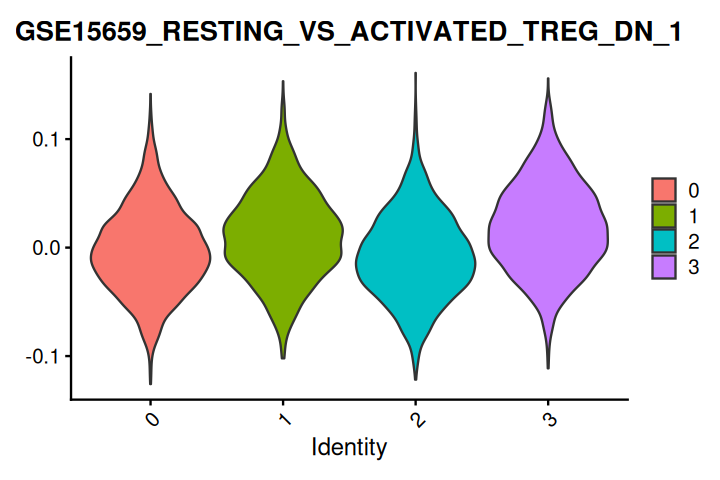

In [29]:
# GSE15659_RESTING_VS_ACTIVATED_TREG_DN

genes  <- c('LMNTD2-AS1', 'POLR2F', 'POLR3F', 'POP7', 'PPHLN1', 'PPM1B', 'PPM1K', 'PPP2CA', 'PPP2R1A', 
'PPP2R5A', 'DESI2', 'PPY', 'PRAM1', 'PRDX3', 'PRDX4', 'PRG3', 'PRKAG3', 'PRKX', '', 'PROCR', 'PSEN1', 
'PSMA2', 'PSMG2', 'PSPN', 'PSRC1', 'PTK2B', 'HACD4', 'PTPN23', 'NECTIN4', 'PYGL', 'PYHIN1', 'RAB2B', 
'RAB9A', 'RAMP1', 'RAN', 'RANBP9', 'RANGRF', 'RAP2B', 'RBCK1', 'RBM41', 'RCOR1', 'RD3', 'RGS17', 
'RGS4', 'RHOC', 'RHOU', 'RIT1', 'RNF10', 'RNF150', 'RNF167', 'RNF214', 'ROCK1', 'ROS1', 'RPL26L1', 
'RRM1', 'RSPH1', 'RSPH10B2', 'RSPH3', 'RTP1', 'RUSC1', 'S100P', 'S1PR2', 'SAGE1', 'SAP30BP', 
'SARS2', 'SCN8A', 'SCO2', 'SDC3', 'SEC24D', 'SEC61B', 'SEPHS2', 'SEPTIN3', 'SF3B1', '', 'SGO2', 
'SH2D1A', 'SHISA6', 'SLC16A4', 'SLC22A18', 'SLC24A5', 'SLC25A3', 'SLC25A46', 'SLC26A6', 'SLC35F3', 
'SLC39A1', 'SLC43A3', 'SLC44A3', 'SLC4A9', 'SLC6A7', 'SLC9A6', 'SLC9A8', 'SLFNL1', 'SMAP2', 'SNAP91', 
'SNORA65', 'SNX3', 'SOX11', 'SOX2-OT', 'SPATA2', 'SPATA22', 'SPATA5L1', 'SPATC1', 'SPATS2L', 'SRL', 
'DENND2B', 'ST7-AS1', 'STARD4', 'STK25', 'STK32A', 'STK36', 'STX10', 'SUMO4', 'SUSD1', 'SYN2', 
'TBC1D1', 'TBC1D4', 'TDRD7', 'TEX12', 'TFF2', 'THAP1', 'THRB', 'TIFAB', 'TIPRL', 'TK1', 'TMBIM1', 
'TMEM126A', 'TMEM139', 'TMEM208', 'TMEM70', 'EMC4', 'TNF', 'TNFAIP3', 'TNFSF12', 'TOMM22', 'TOP1', 
'TOR1AIP1', 'TP53INP2', 'TPI1', 'TPMT', 'TRABD', 'TRIM16', 'TRIM55', 'TRIML1', 'TRIP12', 'TRIP6', 
'TRPM6', 'TSNAX', 'EIPR1', 'GFUS', 'TTC33', 'EMC2', 'TTC7A', 'TTL', 'TTTY13', 'TULP2', 'TUSC2', 
'TYK2', 'U2AF1', 'UBA3', 'UBE2D1', 'UBE2U', 'UBFD1', 'UBL7', 'UBR5', 'UGGT1', 'UGT2B17', 'UNC13D', 
'UTS2B', 'VAMP3', 'VCPIP1', 'VPS28', 'WARS1', 'WDHD1', 'DNAAF10', 'CCN6', 'GET1', 'XAF1', 'YY1', 
'ZAN', 'ZBED6', 'ZC3H13', 'ZCCHC9', 'ZDHHC8BP', 'ZFAND5', 'ZFC3H1', 'ZMIZ2', 'ZNF28', 'ZNF287', 'ZNF324B', 
'ZNF34', 'ZNF385D', 'ZNF394', 'ZNF414', 'ZNF596', 'ZNF618', 'ZNF663P', 'ZNF678', 'POLR1H', 'ZNRF2', 'ZPBP2')



treg <- AddModuleScore(
  object = treg,
  features = list(c(genes)),
  search = F,
  ctrl = 50,
  nbin = 50,
  assay = "RNA",
  name = 'GSE15659_RESTING_VS_ACTIVATED_TREG_DN_')

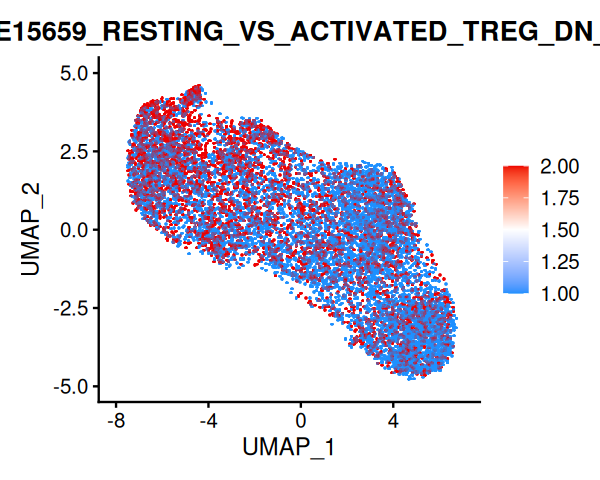

In [34]:
options(repr.plot.width = 5, repr.plot.height = 4)

FeaturePlot(treg, features = "GSE15659_RESTING_VS_ACTIVATED_TREG_DN_1", cols = c("#2d95ffff","white","#ff4140ff"),
           pt.size = 3, raster = T)



# Trajectory analysis

To analyze the trajectory of Treg cells, we will use the [Slingshot package](https://www.bioconductor.org/packages/release/bioc/vignettes/slingshot/inst/doc/vignette.html).

In [6]:
library(grDevices)
library(RColorBrewer)
library(slingshot)

Loading required package: princurve

Loading required package: TrajectoryUtils

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLog

As the input for the Slingshot analysis is SCE object, we need to convert our Seurat object first. We found that integrated assay causes problems upon conversion, so we will remove it and then add just the UMAP coordinates. 

In [8]:
DefaultAssay(treg) <- "RNA"

treg_no_integrated <- treg
treg_no_integrated[["integrated"]] <- NULL

Idents(treg_no_integrated) <- treg_no_integrated$seurat_clusters

sce <- as.SingleCellExperiment(treg_no_integrated)

reducedDim(sce, "PCA", withDimnames=TRUE) <- treg[['pca']]@cell.embeddings
reducedDim(sce, "UMAP", withDimnames=TRUE) <- treg_no_integrated[['umap']]@cell.embeddings

Run the Slingshot algotirhm:

In [9]:
sce <- slingshot(sce, clusterLabels = 'seurat_clusters', reducedDim = 'UMAP')

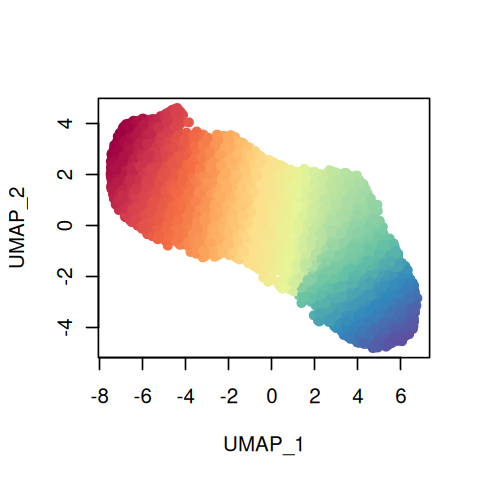

In [10]:
colors <- rev(colorRampPalette(brewer.pal(11,'Spectral')[-6])(100))
plotcol <- colors[cut(sce$slingPseudotime_1, breaks=100)]

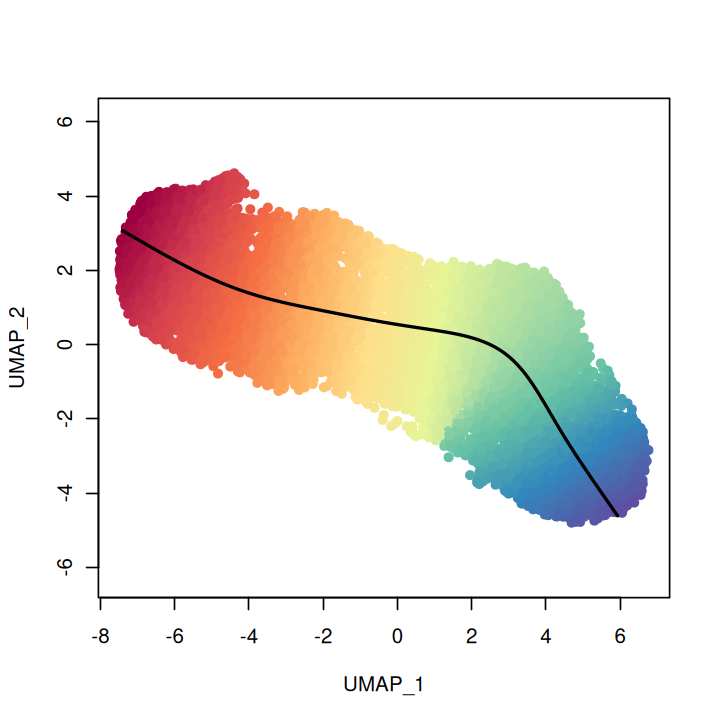

In [144]:
options(repr.plot.width = 6, repr.plot.height = 6)
plot(reducedDims(sce)$UMAP, col = plotcol, pch=16, asp = 1)
lines(SlingshotDataSet(sce), lwd=2, col='black')

For visualization purposes we will add the Slingshot pseudotime score back to the Seurat object.

In [12]:
treg$slingPseudotime_1  <- sce$slingPseudotime_1

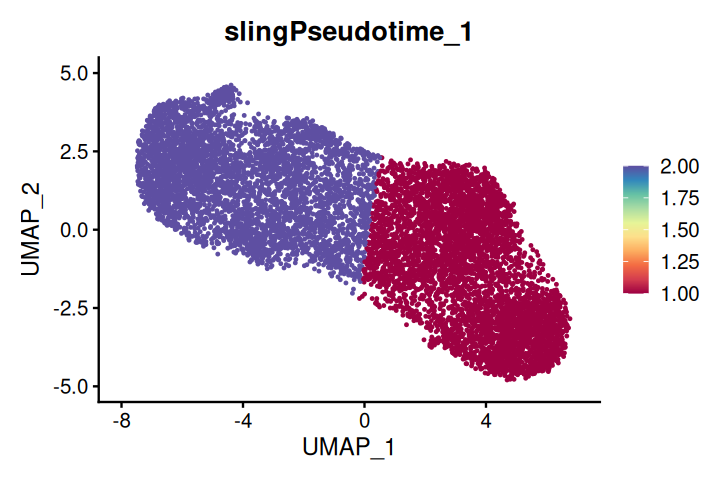

In [142]:
FeaturePlot(treg, features = "slingPseudotime_1", 
            cols = colorRampPalette(brewer.pal(11,'Spectral')[-6])(100))

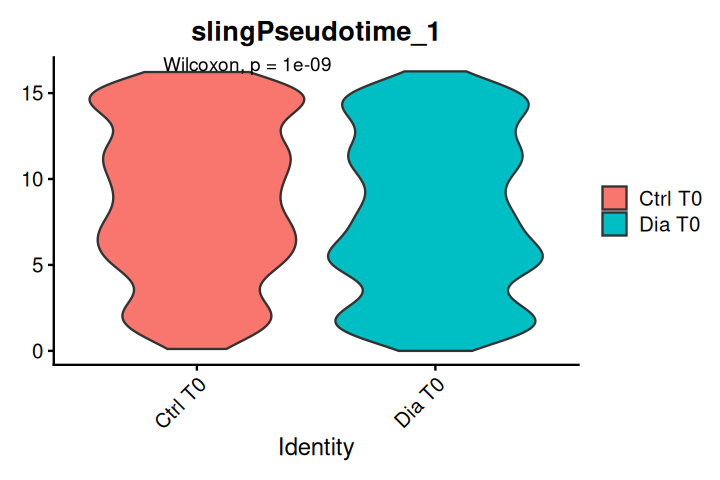

In [18]:
options(repr.plot.width = 6, repr.plot.height = 4)

VlnPlot(subset(treg, Condition %in% c("Ctrl T0", "Dia T0") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20")),
        group.by = "Condition", features = "slingPseudotime_1", pt.size = 0) + ggpubr::stat_compare_means()

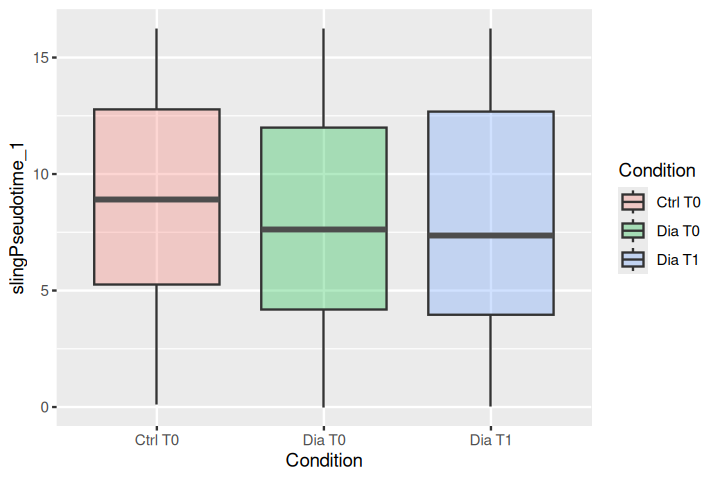

In [23]:
treg@meta.data %>% 
filter(Condition %in% c("Ctrl T0", "Dia T0", "Dia T1") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
  ggplot(aes(x = Condition, y = slingPseudotime_1)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(alpha = 0.3, aes(fill = Condition), outlier.shape = NA) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30")

`summarise()` has grouped output by 'Patient_ID', 'Condition'. You can override
using the `.groups` argument.


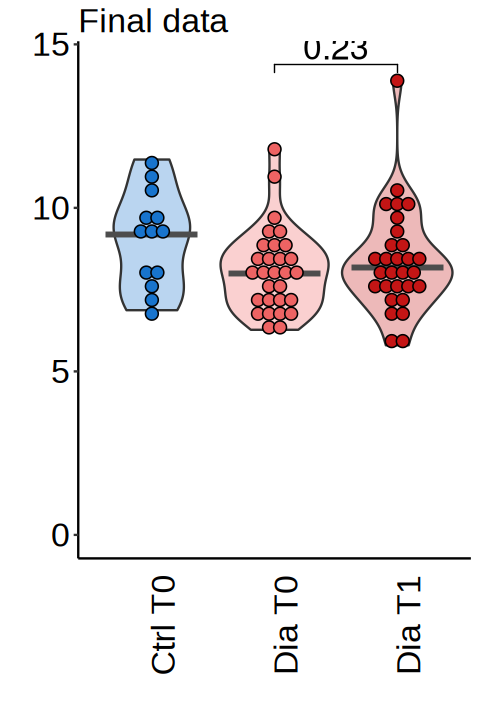

In [124]:
options(repr.plot.width =4, repr.plot.height =6)
treg@meta.data %>% 
group_by(Patient_ID, Condition, Experiment_ID)  %>% 
dplyr::filter(Patient_ID != "116")  %>% 
summarize(mean_Sling = mean(slingPseudotime_1))  %>% 
filter(Condition %in% c("Ctrl T0", "Dia T0", "Dia T1") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
  ggplot(aes(x = Condition, y = mean_Sling)) + # you can change the x to whatever variable you're interested in
  geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", method = "center") +
scale_shape_manual(values = c(21,22))+
  ylab("") +
  xlab("") +
  theme_classic() +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ggpubr::stat_compare_means(label.x= 1.2, label.y.npc = 0.9,
                           size = 7, label = "p.format", 
                          comparison = list(c(2,3)), paired = TRUE)+
ggtheme() +
 scale_y_continuous(limits = c(0,NA)) +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) + NoLegend() + ggtitle("Final data")

`summarise()` has grouped output by 'Patient_ID', 'Condition'. You can override
using the `.groups` argument.
✔ Created directory: ../figures/subset_characterization.



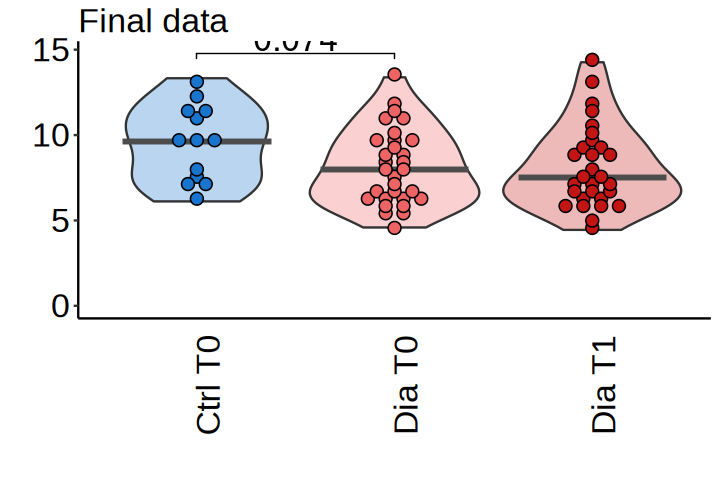

In [126]:
options(repr.plot.width = 6, repr.plot.height = 4)
treg@meta.data %>% 
group_by(Patient_ID, Condition, Experiment_ID)  %>% 
summarize(median_Sling = median(slingPseudotime_1))  %>% 
filter(Condition %in% c("Ctrl T0", "Dia T0", "Dia T1") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
  ggplot(aes(x = Condition, y = median_Sling)) + # you can change the x to whatever variable you're interested in
  geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", method = "center") +
scale_shape_manual(values = c(21,22))+
  ylab("") +
  xlab("") +
  theme_classic() +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ggpubr::stat_compare_means(label.x= 1.2, label.y.npc = 0.9,
                           size = 7, label = "p.format", 
                          comparisons = list(c(1,2)))+
ggtheme() +
 scale_y_continuous(limits = c(0,NA)) +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) + NoLegend() + ggtitle("Final data")

ggsave("../figures/subset_characterization/treg_pseudotime_in_condition.svg",
       width = 10, create.dir = TRUE, height = 12, units = "cm")

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4)
treg@meta.data %>% 
group_by(Patient_ID, Condition, Experiment_ID)  %>% 
summarize(median_Sling = median(slingPseudotime_1))  %>% 
filter(Condition %in% c("Ctrl T0", "Dia T0", "Dia T1") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
  ggplot(aes(x = Condition, y = median_Sling)) + # you can change the x to whatever variable you're interested in
  geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", method = "center") +
scale_shape_manual(values = c(21,22))+
  ylab("") +
  xlab("") +
  theme_classic() +
#scale_fill_manual(values = c("#1874cdff","#c41515ff"))+
ggpubr::stat_compare_means(label.x= 1.2, label.y.npc = 0.9,
                           size = 7, label = "p.format", 
                          comparisons = list(c(1,2)))+
ggtheme() +
 scale_y_continuous(limits = c(0,NA)) +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) + NoLegend() + ggtitle("Final data")

In [88]:
options(repr.plot.width = 6, repr.plot.height = 5)
treg_pseudotime  <- treg@meta.data %>% 
mutate(ntile_sling = ntile(slingPseudotime_1, n = 20))  %>% 
group_by(Condition, ntile_sling) %>% 
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))  %>% 
dplyr::select(-n)  %>% 
pivot_wider(names_from = "ntile_sling", values_from = "freq", values_fill = 0) 

treg_pseudotime2  <- treg_pseudotime  %>% pivot_longer(3:ncol(treg_pseudotime), names_to = "ntile_sling", values_to = "freq")  

`summarise()` has grouped output by 'Condition'. You can override using the
`.groups` argument.


In [89]:
treg_pseudotime2

Condition,1,ntile_sling,freq
<chr>,<dbl>,<chr>,<dbl>
Ctrl T0,0.03971547,2,0.04030824
Ctrl T0,0.03971547,3,0.04386485
Ctrl T0,0.03971547,4,0.04505039
Ctrl T0,0.03971547,5,0.03734440
Ctrl T0,0.03971547,6,0.04267931
Ctrl T0,0.03971547,7,0.04090101
Ctrl T0,0.03971547,8,0.03971547
Ctrl T0,0.03971547,9,0.04919976
Ctrl T0,0.03971547,10,0.06105513


In [107]:
mtx  <- treg@meta.data %>% 
mutate(ntile_sling = ntile(slingPseudotime_1, n = 20),
       ntile_score = ntile(GSE15659_RESTING_VS_ACTIVATED_TREG_DN_1, n = 20))  %>% 
ungroup  %>% 
group_by(ntile_sling, ntile_score)  %>% 
tally()  %>% 
pivot_wider(names_from = ntile_score, values_from = n, values_fill = 0)  %>% 
column_to_rownames("ntile_sling")  %>% 
as.matrix()

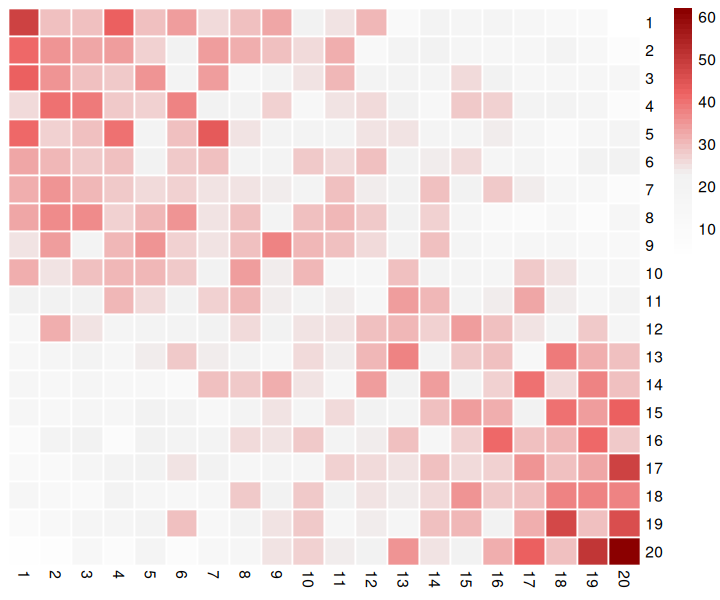

In [111]:
options(repr.plot.width = 6, repr.plot.height = 5)
pheatmap::pheatmap(mtx, cluster_rows = F, cluster_cols = F, 
                  color=colorRampPalette(c("white", "grey95", "indianred2","darkred"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 9)

options(repr.plot.width = 6, repr.plot.height = 5)
pheatmap::pheatmap(mtx, cluster_rows = F, cluster_cols = F, 
                  color=colorRampPalette(c("white", "grey95", "indianred2","darkred"))(50), 
         border_color = "white", width = 6, height = 5,
                  fontsize = 9, filename = "../figures/treg_validation/trajectory_correlation_hm.pdf")

In [58]:
options(warn = -1)

In [127]:
treg@meta.data  <- treg@meta.data %>% 
mutate(ntile_sling = ntile(slingPseudotime_1, n = 20))

In [151]:
avgexp  <- AggregateExpression(treg, group.by = c("ntile_sling"), 
                             features = c("NELL2","IL7R","CCR7","TCF7","SELL",
                                          "CTLA4","IL10RA","IL2RA","ENTPD1",
                                          "TNFRSF9","CCR4"),
                             assay = "RNA", return.seurat = F)

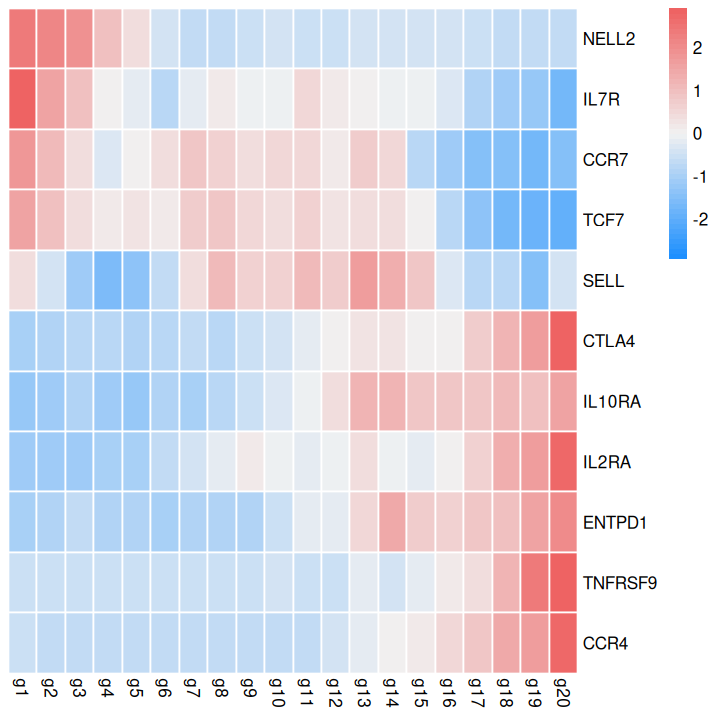

In [152]:
pheatmap::pheatmap(avgexp$RNA, cluster_rows = F, cluster_cols = F, scale = "row",
                  color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 6, height = 5)

# Gene correlation

In [ ]:
md_cpept  <- read_xlsx("../data/metadata_v06.xlsx")  %>% 
mutate(Patient_Time = paste(patient, time_taken))  %>% 
       dplyr::select(Patient_Time, fasting_cpept_T1, fasting_cpept_1, c_peptide_change)  %>% unique

md_cpept   <- md_cpept  %>% mutate(group = substr(Patient_Time,1,1))  %>% filter(group == 1)

In [ ]:
treg

In [ ]:
ds_mtx  <- AverageExpression(treg, group.by = "Patient_Time", return.seurat = F, assays = "RNA",
                            features = c("IL10RA","IL4R"))

In [ ]:
ds_mtx$RNA

In [ ]:
rna  <- ds_mtx$RNA  %>% 
as.data.frame()  %>% 
rownames_to_column("gene")  %>% 
pivot_longer(!gene, names_to = "Patient_Time", values_to = "expression")  %>% 
 left_join(md_cpept)  

In [ ]:
rna

In [ ]:
calc_one_pop  <- function(select_gene){
    
    df  <- rna  %>% dplyr::filter(gene == select_gene)
    cor  <- cor.test(df$expression, df$fasting_cpept_1)
    res_df  <- data.frame(gene = select_gene,
                           cor = cor$estimate, 
                          pval = cor$p.value, 
                         padj  = ifelse(cor$p.value*2>1,1,cor$p.value*2))
    return(res_df)
}


In [ ]:
calc_one_pop("IL10RA")

In [ ]:
df  <- rna  %>% dplyr::filter(gene == "IL10RA")
p <- df %>%  
 ggplot(aes(x=expression, y=fasting_cpept_T1)) +
 geom_point(shape = 16, size = 2) +
 geom_smooth(method=lm, alpha = 0.2) + ggtitle(paste("IL10RA", "in", "Treg")) + 
stat_cor(size = 7) + theme_classic() + ggtheme()
print(p)

ggsave(filename = paste0("../figures/correlation_populations/IL10RinTreg.svg"), width = 9, height = 4)


In [ ]:
df  <- rna  %>% dplyr::filter(gene == "IL4R")
p <- df %>%  
 ggplot(aes(x=expression, y=fasting_cpept_T1)) +
 geom_point(shape = 16, size = 2) +
 geom_smooth(method=lm, alpha = 0.2) + ggtitle(paste("IL4R", "in", "Treg")) + 
stat_cor(size = 7) + theme_classic() + ggtheme()
print(p)

ggsave(filename = paste0("../figures/correlation_populations/IL4RRinTreg.svg"), width = 4.5, height = 4)


# DE genes

In [ ]:
treg_subset  <- subset(treg, Condition %in% c("Ctrl T0", "Ctrl T1","Dia T0") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20")) 


In [ ]:
Idents(treg_subset)  <- treg_subset$Disease

In [ ]:
DimPlot(treg_subset)

In [ ]:
plan("sequential")

In [ ]:
DefaultAssay(treg_subset)  <- "RNA"

In [ ]:
mrk  <- FindAllMarkers(treg_subset, only.pos = T, test.use = "t")

In [ ]:
mrk

In [ ]:
DefaultAssay(treg_subset)  <- "CollecTRI"

mrk  <- FindAllMarkers(treg_subset, only.pos = T)

mrk

In [ ]:
Idents(treg)  <- treg$seurat_clusters

In [ ]:
DefaultAssay(treg)  <- "RNA"

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 4.25)
DimPlot(treg, label = T)

In [ ]:
mrk2  <- FindAllMarkers(treg)

In [ ]:
mrk2  %>% group_by(cluster)  %>% 
filter(avg_log2FC>0) %>% slice_head(n = 10)

In [ ]:
FeaturePlot(treg, features = "CCR5", 
           min.cutoff = 0, ncol = 5)

In [ ]:
markers_cl2  <- mrk2  %>% group_by(cluster)  %>% 
filter(avg_log2FC>0 & cluster ==2)   %>% slice_head(n = 30) %>% pull(gene) 

options(repr.plot.width = 30, repr.plot.height = 20)
FeaturePlot(treg, features = markers_cl2, 
           min.cutoff = 0, ncol = 5)

## Heatmap

In [ ]:
avgexp = AverageExpression(treg, features = rev(str_to_upper(c(
    "CCR7","TCF7","LEF1","SELL","BTG1","IL4R","IL7R","LAG3","GZMK","CD226","HAVCR2","PDCD1",
    "STAT5A","TIGIT","IKZF2","TNFRSF18","ENTPD1","IL10RA","IL2RB","FOXP3","IL2RA","TGFB1","CCR4",
    "TNFRSF9","HLA-DPA1","CTLA4"
    
    ))), return.seurat = F, 
                           group.by = "seurat_clusters", assays = "RNA")

In [ ]:
avgexp

In [ ]:
library(pheatmap)

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 2.5)
pheatmap(t(avgexp$RNA)[c(3,1,2,4),], main = "", scale = "column", cluster_cols = F, cluster_rows = F,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 9)

In [ ]:
dir.create("../figures/heatmaps/")

In [ ]:
pheatmap(t(avgexp$RNA)[c(3,1,2,4),], main = "", scale = "column", cluster_cols = F, cluster_rows = F,
         color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", filename = "../figures/heatmaps/heatmap_treg_v2.pdf",width = 9, height = 3.3,
                  fontsize = 9)

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 2.5)
pheatmap(t(avgexp$RNA)[c(3,1,2,4),], main = "", scale = "column", cluster_cols = F, cluster_rows = F,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 9)

In [ ]:
pheatmap(t(avgexp$RNA)[c(3,1,2,4),], main = "", scale = "column", cluster_cols = F, cluster_rows = F,
         color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", filename = "../figures/heatmaps/heatmap_treg.pdf",width = 9, height = 3.3,
                  fontsize = 9)

## Heatmap with Naive

In [ ]:
naive  <- readRDS("../data/processed/L3/cd4_l3_naive.rds")

In [ ]:
avgexp_naive = AverageExpression(naive, features = rev(str_to_upper(c(
    "CCR7","TCF7","LEF1","SELL","BTG1","IL7R","LAG3","GZMK","CD226","HAVCR2","PDCD1",
    "STAT5A","TIGIT","IKZF2","TNFRSF18","ENTPD1","IL2RB","IL2RA","TGFB1","FOXP3","TNFRSF9","HLA-DPA1","CTLA4"
    ))), return.seurat = F, 
                           group.by = "study", assays = "RNA")

In [ ]:
avgexp_naive

In [ ]:
naive$study  <- "1"

In [ ]:
rownames(avgexp$RNA) == rownames(avgexp_naive$RNA)

In [ ]:
avgexp_all  <- cbind(avgexp$RNA, avgexp_naive$RNA)

In [ ]:
avgexp_all

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 2.5)
pheatmap(t(avgexp_all)[c(5,3,1,2,4),], main = "", scale = "column", cluster_cols = F, cluster_rows = F,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 9)

In [ ]:
genes_treg  <-  c("CCR7","TCF7","LEF1","SELL","BTG1","IL7R","CD226","LAG3",
                  "GZMK","HAVCR2","ICOS",
    "CTLA4","TIGIT","IL10RA","IL2RB","IL2RA","FOXP3","IKZF2","TNFRSF18",
                  "ENTPD1",
                  "TNFRSF9","HLA-DPA1")
    

In [ ]:
avgexp_naive = AverageExpression(naive, features = rev(str_to_upper(c(
    genes_treg))), return.seurat = F, 
                           group.by = "study", assays = "RNA")
avgexp = AverageExpression(treg, features = rev(str_to_upper(c(genes_treg
   ))), return.seurat = F, 
                           group.by = "seurat_clusters", assays = "RNA")
avgexp_all  <- cbind(avgexp$RNA, avgexp_naive$RNA)

options(repr.plot.width = 9, repr.plot.height = 3)
pheatmap(t(avgexp_all)[c(5,3,1,2,4),], main = "", scale = "column", cluster_cols = F, cluster_rows = F,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 14)
pheatmap(t(avgexp_all)[c(5,3,1,2,4),], main = "", scale = "column", cluster_cols = F, cluster_rows = F,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 14, filename = "") 

### CollecTRI assay

In [ ]:
DefaultAssay(treg)  <- "CollecTRI"

In [ ]:
Idents(treg)  <- treg$seurat_clusters

In [ ]:
mrk2  <- FindAllMarkers(treg)

In [ ]:
mrk3  <- mrk2  %>% group_by(cluster)  %>% 
filter(avg_log2FC>0) %>% slice_head(n = 10)

In [ ]:
mrk3

In [ ]:
avgexp = AverageExpression(treg, features = pull(mrk3, gene),
                           return.seurat = F, group.by = "seurat_clusters", assays = "CollecTRI")

In [ ]:
library(pheatmap)

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 3.5)
pheatmap(t(avgexp$CollecTRI), main = "", scale = "column", cluster_cols = T, cluster_rows = T,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white",
                  fontsize = 9)

### NicheNET assay

In [ ]:
treg

In [ ]:
DefaultAssay(treg_subset)  <- "pathwayswmean"

In [ ]:
Idents(treg)  <- treg$seurat_clusters

In [ ]:
mrk2  <- FindAllMarkers(treg_subset)

In [ ]:
mrk2

In [ ]:
mrk3  <- mrk2  %>% group_by(cluster)  %>% 
filter(avg_log2FC>0) %>% slice_head(n = 10)

In [ ]:
mrk3

In [ ]:
mrk2  %>% group_by(cluster)  %>% 
filter(avg_log2FC>0 & cluster ==3)

In [ ]:
avgexp = AverageExpression(treg, features = pull(mrk3, gene),
                           return.seurat = F, group.by = "seurat_clusters", assays = "pathwayswmean")

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 3.5)
pheatmap(t(avgexp$pathwayswmean), main = "", scale = "column", cluster_cols = T, cluster_rows = T,
        color=colorRampPalette(c("blue", "grey95", "red"))(50), 
         border_color = "white",
                  fontsize = 9)

In [ ]:
DimPlot(treg)

### Slingshot

In [ ]:
library(grDevices)
library(RColorBrewer)
library(slingshot)


In [ ]:
DefaultAssay(treg) <- "RNA"

fun_basic <- treg
fun_basic[["integrated"]] <- NULL

Idents(fun_basic) <- fun_basic$seurat_clusters

sce <- as.SingleCellExperiment(fun_basic)

reducedDim(sce, "PCA", withDimnames=TRUE) <- treg[['pca']]@cell.embeddings
reducedDim(sce, "UMAP", withDimnames=TRUE) <- fun_basic[['umap']]@cell.embeddings

sce <- slingshot(sce, clusterLabels = 'seurat_clusters', reducedDim = 'UMAP')

In [ ]:
colors <- rev(colorRampPalette(brewer.pal(11,'Spectral')[-6])(100))
plotcol <- colors[cut(sce$slingPseudotime_1, breaks=100)]

options(repr.plot.width = 4, repr.plot.height = 4)
plot(reducedDims(sce)$UMAP, col = colors[cut(sce$slingPseudotime_1, breaks=100)], pch = 16)


In [ ]:
treg

In [ ]:
treg$slingPseudotime_1  <- sce$slingPseudotime_1

In [ ]:
FeaturePlot(treg, features = "slingPseudotime_1")

In [ ]:
VlnPlot(subset(treg, Condition %in% c("Ctrl T0", "Dia T0") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20")),
        group.by = "Condition", features = "slingPseudotime_1") + ggpubr::stat_compare_means()

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4)
treg@meta.data %>% 
group_by(Patient_ID, Condition, Experiment_ID)  %>% 
summarize(mean_Sling = median(slingPseudotime_1))  %>% 
filter(Condition %in% c("Ctrl T0", "Dia T0") & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))  %>% 
  ggplot(aes(x = Condition, y = mean_Sling)) + # you can change the x to whatever variable you're interested in
  geom_violin(alpha = 0.3, aes(fill = Condition)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", method = "center") +
scale_shape_manual(values = c(21,22))+
  ylab("") +
  xlab("") +
  theme_classic() +
scale_fill_manual(values = c("#1874cdff","#c41515ff"))+
ggpubr::stat_compare_means(label.x= 1.2, label.y.npc = 0.9,
                           size = 7, label = "p.format")+
ggtheme() +
 scale_y_continuous(limits = c(0,NA)) +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) + NoLegend() + ggtitle("Final data")

In [ ]:
treg$Patient_ID  %>% table

In [ ]:
treg@meta.data %>% 
mutate(sling_round = round(slingPseudotime_1*2, digits = 0))  %>% 
group_by(Sample_ID, sling_round) %>% 
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
treg_pseudotime  <- treg@meta.data %>% 
mutate(sling_round = round(slingPseudotime_1*2, digits = 0))  %>% 
group_by(Sample_ID, Condition, sling_round) %>% 
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))  %>% 
dplyr::select(-n)  %>% 
pivot_wider(names_from = "sling_round", values_from = "freq", values_fill = 0) 

treg_pseudotime2  <- treg_pseudotime  %>% pivot_longer(3:ncol(treg_pseudotime), names_to = "sling_round", values_to = "freq")  

In [ ]:
treg_pseudotime2

## DEG in Treg subclusters

In [ ]:
DimPlot(treg)

In [ ]:
DefaultAssay(treg)  <- "RNA"

In [ ]:
treg1  <- subset(treg, seurat_clusters == 2 & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))
treg2  <- subset(treg, seurat_clusters == 0 & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))
treg3  <- subset(treg, seurat_clusters == 1 & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))
treg4  <- subset(treg, seurat_clusters == 3 & Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20"))

In [ ]:
Idents(treg1)  <- treg1$Disease
Idents(treg2)  <- treg2$Disease
Idents(treg3)  <- treg3$Disease
Idents(treg4)  <- treg4$Disease

In [ ]:
de_treg1  <- FindAllMarkers(treg1,
               test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = F,  
                                   min.cells.feature = 1, return.thresh = 1)
de_treg2  <- FindAllMarkers(treg2, ,
               test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = F,  
                                   min.cells.feature = 1, return.thresh = 1)
de_treg3  <- FindAllMarkers(treg3, ,
               test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = F,  
                                   min.cells.feature = 1, return.thresh = 1)
de_treg4  <- FindAllMarkers(treg4, ,
               test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = F,  
                                   min.cells.feature = 1, return.thresh = 1)

In [ ]:
de_treg1

In [ ]:
de_treg2

In [ ]:
de_treg3

In [ ]:
de_treg4

In [ ]:
zemmour  <- read_xlsx("../../240218_VN_Diabetes_V05/data/published_data/Zemmour_2018/zemmour2.xlsx")
treg_ipex_up  <- zemmour  %>% dplyr::filter(Average_FC_in_Treg>1)  %>% pull(gene)
treg_ipex_down  <- zemmour  %>% dplyr::filter(Average_FC_in_Treg<1)  %>% pull(gene)

In [ ]:
library(fgsea)

In [ ]:
treg_ipex_up  %>% length

In [ ]:
treg_ipex_up2  %>% length

In [ ]:
treg_ipex_up2  <- treg_ipex_up[which(treg_ipex_up %in% rownames(treg))]

In [ ]:
fc.df  <- de_treg1  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

fgsea(pathways = list(treg_ipex_up = treg_ipex_up, treg_ipex_down = treg_ipex_down), stats = ranks
         )
options(repr.plot.width = 10, repr.plot.height = 6)

p  <- plotEnrichment(treg_ipex_up,
               ranks) + labs(title="treg_ipex_up") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(treg_ipex_down,
               ranks) + labs(title="treg_ipex_down") + ylim(-0.7,0.7) + ggtheme()
p

In [ ]:
fc.df  <- de_treg2  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

fgsea(pathways = list(treg_ipex_up = treg_ipex_up, treg_ipex_down = treg_ipex_down), stats = ranks
         )
options(repr.plot.width = 10, repr.plot.height = 6)

p  <- plotEnrichment(treg_ipex_up,
               ranks) + labs(title="treg_ipex_up") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(treg_ipex_down,
               ranks) + labs(title="treg_ipex_down") + ylim(-0.7,0.7) + ggtheme()
p

In [ ]:
fc.df  <- de_treg3  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

fgsea(pathways = list(treg_ipex_up = treg_ipex_up, treg_ipex_down = treg_ipex_down), stats = ranks
         )
options(repr.plot.width = 10, repr.plot.height = 6)

p  <- plotEnrichment(treg_ipex_up,
               ranks) + labs(title="treg_ipex_up") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(treg_ipex_down,
               ranks) + labs(title="treg_ipex_down") + ylim(-0.7,0.7) + ggtheme()
p

In [ ]:
fc.df  <- de_treg4  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

fgsea(pathways = list(treg_ipex_up = treg_ipex_up, treg_ipex_down = treg_ipex_down), stats = ranks
         )
options(repr.plot.width = 10, repr.plot.height = 6)

p  <- plotEnrichment(treg_ipex_up,
               ranks) + labs(title="treg_ipex_up") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(treg_ipex_down,
               ranks) + labs(title="treg_ipex_down") + ylim(-0.7,0.7) + ggtheme()
p

In [ ]:
Idents(treg)  <- treg$Disease

In [ ]:
de_treg  <- FindAllMarkers(treg,
               test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = F,  
                                   min.cells.feature = 1, return.thresh = 1)

In [ ]:
de_treg

In [ ]:
fc.df  <- de_treg  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

fgsea(pathways = list(treg_ipex_up = treg_ipex_up, treg_ipex_down = treg_ipex_down), stats = ranks
         )
options(repr.plot.width = 10, repr.plot.height = 6)

p  <- plotEnrichment(treg_ipex_up,
               ranks) + labs(title="treg_ipex_up") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(treg_ipex_down,
               ranks) + labs(title="treg_ipex_down") + ylim(-0.7,0.7) + ggtheme()
p

# GSEA

## IPEX Treg our Treg

In [ ]:
fc.df  <- read_csv("../../240218_VN_Diabetes_V05/tables/fold_change/cd4_l3_treg.csv")  %>% as.data.frame()


In [ ]:
fc.df

In [ ]:
zemmour  <- read_xlsx("../../240218_VN_Diabetes_V05/data/published_data/Zemmour_2018/zemmour2.xlsx")

zemmour is ipex vs healthy

In [ ]:
fc.df  %>% dplyr::filter(cluster == "Dia")  %>% left_join(zemmour) 

In [ ]:
ipex_in_our  <- fc.df  %>% dplyr::filter(cluster == "Dia")  %>% left_join(zemmour)  %>% 
dplyr::filter(!is.na(Average_FC_in_Treg))

In [ ]:
ipex_in_our

In [ ]:
treg_ipex_up  <- ipex_in_our  %>% dplyr::filter(Average_FC_in_Treg>1)  %>% pull(gene)

In [ ]:
treg_ipex_down  <- ipex_in_our  %>% dplyr::filter(Average_FC_in_Treg<1)  %>% pull(gene)

In [ ]:
# CD4L1
fc.df  <- read_csv("../../240218_VN_Diabetes_V05/tables/fold_change/cd4_l3_treg.csv")  %>% as.data.frame()
fc.df  <- fc.df  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

In [ ]:
library(fgsea)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 3)

p  <- plotEnrichment(treg_ipex_up,
               ranks) + labs(title="treg_ipex_up") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(treg_ipex_down,
               ranks) + labs(title="treg_ipex_down") + ylim(-0.7,0.7) + ggtheme()


In [ ]:
p

In [ ]:
dir.create("../figures/gsea/")

In [ ]:
ggsave(p, filename = paste0("../figures/gsea/treg_zemmour.svg"), width = 24, height = 12, units = "cm")

In [ ]:
fgseaRes <- fgsea(pathways = list(treg_ipex_up = treg_ipex_up, treg_ipex_down = treg_ipex_down), 
                 stats = ranks)

In [ ]:
fgseaRes

In [ ]:
ipex_in_our

In [ ]:
ipex_in_our_rank  <- ipex_in_our  %>% dplyr::select(avg_log2FC, Average_FC_in_Treg)  %>% 
mutate_each(funs(dense_rank(-.))) 

In [ ]:
ipex_in_our_rank$gene  <- ipex_in_our$gene

In [ ]:
ipex_in_our_rank

In [ ]:
ipex_in_our_rank %>% mutate(decile_ipex = ntile(Average_FC_in_Treg, 10),
                            dec_our = ntile(avg_log2FC, 10)
                            )  %>% group_by(decile_ipex, dec_our)  %>% tally

In [ ]:
ipex_in_our_rank

In [ ]:

options(repr.plot.width = 6, repr.plot.height = 5)
ipex_in_our_rank %>% mutate(decile_ipex = ntile(Average_FC_in_Treg, 8),
                            dec_our = ntile(avg_log2FC, 8)
                            )  %>% group_by(decile_ipex, dec_our)  %>% tally  %>% 
ggplot(aes(decile_ipex, dec_our)) + 
  geom_point(aes(size = n, colour = n)) + 
  theme_bw() + scale_size_continuous(range=c(7,12)) +
scale_y_reverse()+
scale_x_reverse()+
coord_flip()+
  geom_text(aes(label = n), size = 5) + 
  scale_colour_gradient2(low = "lightskyblue", mid = "lightsteelblue2", high = "#B07AA1", midpoint = 2) +
  theme_bw() + ggtheme()

ggsave("../figures/gsea/zemmour_treg_genes_corr.svg", width = 13, height = 11, units = "cm")

In [ ]:
ipex_in_our_rank %>% mutate(decile_ipex = ntile(Average_FC_in_Treg, 8),
                            decile_our = ntile(avg_log2FC, 8)
                            )  %>% dplyr::filter(decile_ipex == 8 & decile_our == 8)  %>% pull(gene)

## Borna


In [ ]:
borna  <- readRDS("../../240218_VN_Diabetes_V05/data/published_data/Borna_2023/GSE247274_unstim.rds")

In [ ]:
DimPlot(borna)

In [ ]:
borna$Gated_and_FOXP3  %>% table

In [ ]:
borna$Gated_and_FOXP3  %>% table

In [ ]:
borna$cluster_names_mem  %>% table

In [ ]:
DimPlot(borna, group.by = "status")

In [ ]:
DimPlot(borna, group.by = "Gated_and_FOXP3")

In [ ]:
FeaturePlot(borna, features = "ISG15")
FeaturePlot(borna, features = "CCR10")
FeaturePlot(borna, features = "TNFRSF9")

In [ ]:
FeaturePlot(borna, features = "TCF7")
FeaturePlot(borna, features = "LAG3")
FeaturePlot(borna, features = "GZMK")
FeaturePlot(borna, features = "FOXP3")
FeaturePlot(borna, features = "KLRG1")
FeaturePlot(borna, features = "CD226")

### Cells clustering as Tregs

In [ ]:
borna_treg  <- subset(borna, cluster_names_mem %in% c("Treg memory 2", "Treg memory 1", "Treg naive"))

In [ ]:
Idents(borna_treg)  <- borna_treg$status
    mrk  <- FindAllMarkers(borna_treg)

In [ ]:
borna_hd_genes  <- mrk  %>% dplyr::filter(avg_log2FC>0 & cluster == "HD")  %>% pull(gene)

In [ ]:
borna_hd_genes  %>% length

In [ ]:
borna_ipex_genes  <- mrk  %>% dplyr::filter(avg_log2FC>0 & cluster == "IPEX")  %>% pull(gene) 

In [ ]:
borna_ipex_genes  %>% length

In [ ]:
fc.df  <- read_csv("../../240218_VN_Diabetes_V05/tables/fold_change/cd4_l3_treg.csv")  %>% as.data.frame()
fc.df  <- fc.df  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)


In [ ]:
fgsea_bulk <- fgsea(pathways = list(Borna_UP_in_Ctrl = borna_hd_genes,
                                    Borna_UP_in_IPEX = borna_ipex_genes
                                    ), 
                                      stats    = ranks)
fgsea_bulk

In [ ]:
fgsea_bulk$leadingEdge

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 3)

p  <- plotEnrichment(borna_hd_genes,
               ranks) + labs(title="borna_hd_genes") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(borna_ipex_genes,
               ranks) + labs(title="borna_ipex_genes") + ylim(-0.7,0.7) + ggtheme()


p

dir.create("../figures/gsea/")

ggsave(p, filename = paste0("../figures/gsea/treg_borna.svg"), width = 24, height = 12, units = "cm")

### Only cells sorted as Tregs

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)

DimPlot(borna, group.by = "Gated_and_FOXP3")

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 12)

DimPlot(borna, group.by = "cluster_names_mem", split.by = "Gated_and_FOXP3", ncol = 3)

In [ ]:
borna_treg  <- subset(borna, Gated_and_FOXP3 %in% c("FOXP3_plus_Treg", "FOXP3_minus_Treg"))

In [ ]:
Idents(borna_treg)  <- borna_treg$status
    mrk  <- FindAllMarkers(borna_treg)

In [ ]:
borna_hd_genes  <- mrk  %>% dplyr::filter(avg_log2FC>0 & cluster == "HD")  %>% pull(gene)

In [ ]:
borna_ipex_genes  <- mrk  %>% dplyr::filter(avg_log2FC>0 & cluster == "IPEX")  %>% pull(gene)

In [ ]:
fc.df  <- read_csv("../../240218_VN_Diabetes_V05/tables/fold_change/cd4_l3_treg.csv")  %>% as.data.frame()
fc.df  <- fc.df  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)


In [ ]:
fgsea_bulk <- fgsea(pathways = list(Borna_UP_in_Ctrl = borna_hd_genes,
                                    Borna_UP_in_IPEX = borna_ipex_genes
                                    ), 
                                      stats    = ranks)
fgsea_bulk

In [ ]:
fgsea_bulk$leadingEdge

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 3)

p  <- plotEnrichment(borna_hd_genes,
               ranks) + labs(title="borna_hd_genes") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(borna_ipex_genes,
               ranks) + labs(title="borna_ipex_genes") + ylim(-0.7,0.7) + ggtheme()


p

In [ ]:
ggsave(p, filename = paste0("../figures/gsea/treg_borna.svg"), width = 24, height = 12, units = "cm")

# HPAP Treg

In [ ]:
treg_hpap  <- readRDS("../../230927_VN_HPAP_Diabetes_Multiome/data/treg.rds")

In [ ]:
treg_hpap

In [ ]:
DimPlot(treg_hpap)

In [ ]:
colnames(treg_hpap@meta.data)

In [ ]:
DimPlot(treg_hpap, group.by = "Monaco_single")

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)
DimPlot(treg_hpap, group.by = "HPCA_single")

In [ ]:
DimPlot(treg_hpap, group.by = "Wherry_main")

In [ ]:
DimPlot(treg_hpap, group.by = "predicted.celltype.l3")

In [ ]:
seu  <- treg_hpap

In [ ]:
seu[["percent.mt"]] <- PercentageFeatureSet(seu, pattern = "^MT-")
seu[["percent.rt"]] <- PercentageFeatureSet(seu, pattern = "^RP[LS]")

# Remove TRAV, TRBV genes: blood young B6
rownames(seu)
seu_annots <- seu@meta.data
seu_counts <- seu[!(grepl('TRAV', rownames(seu)) |
          grepl('TRBV', rownames(seu)) |
          grepl('^MT-', rownames(seu)) |
            grepl('RPL', rownames(seu)) |
          grepl('RPS', rownames(seu)) |
          grepl('MTRN', rownames(seu)) |
          grepl('LINC', rownames(seu)) |
          grepl('\\.', rownames(seu)) |
          grepl('\\-', rownames(seu)) |
          grepl('^AS', rownames(seu)) |
          grepl('^AL', rownames(seu)) |
          grepl('^AC', rownames(seu)) 
            ),]

seu <- CreateSeuratObject(counts = seu_counts[["RNA"]]@counts, project = "seu", 
                          min.cells = 3, min.features = 200, meta.data = seu_annots)
 seu <- NormalizeData(object = seu)
  seu <- ScaleData(seu, verbose = FALSE)
  seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 1000, 
                                       verbose = FALSE)
  seu <- RunPCA(seu, npcs = 20, verbose = FALSE)
  seu <- RunUMAP(seu, reduction = "pca", dims = 1:20)
  seu <- FindNeighbors(seu, dims = 1:20)
  seu <- FindClusters(seu, resolution = 0.9)


In [ ]:
DimPlot(seu)

In [ ]:
options(repr.plot.width = 15)
VlnPlot(seu, features = c("percent.mt", "percent.rp", "nCount_RNA", "nFeature_RNA"), ncol = 4, raster = F)

In [ ]:
load("../231003_DiabetesV02/data/ref_wherry_new.RData")

In [ ]:
hpca.se  <- celldex::HumanPrimaryCellAtlasData()
mid.se <- celldex::MonacoImmuneData()

In [ ]:
seu  <- annotate_tcell_data(seu)

In [ ]:
merged.list  <- SplitObject(seu, split.by = "Experiment_ID")

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [ ]:
plan("sequential")

In [ ]:
gc()

In [ ]:
new_dia_experiment2 <- Run.STACAS(merged.list, dims = 1:12)
new_dia_experiment2 <- RunUMAP(new_dia_experiment2, dims = 1:12) 

In [ ]:
treg_hpap  <- new_dia_experiment2

In [ ]:
treg_hpap <- FindNeighbors(treg_hpap, reduction = "pca", dims = 1:12)

In [ ]:
treg_hpap <- FindClusters(treg_hpap, resolution = 0.6)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
DimPlot(treg_hpap, label = T)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)
DimPlot(treg_hpap, group.by = "Monaco_single")

In [ ]:
DimPlot(treg_hpap, group.by = "HPCA_single")

In [ ]:
DimPlot(treg_hpap, group.by = "Wherry_main")

In [ ]:
DimPlot(treg_hpap, group.by = "predicted.celltype.l3")

In [ ]:
DimPlot(treg_hpap, group.by = "predicted.celltype.l3")

In [ ]:
DefaultAssay(treg_hpap)  <- "RNA"
FeaturePlot(treg_hpap, features = c("FOXP3","IL2RA","CD226","CTLA4"), min.cutoff = 0)

In [ ]:
FeaturePlot(treg_hpap, features = c("SELL","TIGIT","GZMK","IL7R"), min.cutoff = 0)

In [ ]:
FeaturePlot(treg_hpap, features = c("IFNG","ITGAE","ZNF683","IKZF2"), min.cutoff = 0)

In [ ]:
FeaturePlot(treg_hpap, features = c("IL10","IL19","KLRG1","TBX21"), min.cutoff = 0)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5)
DimPlot(treg_hpap, group.by = "Disease")

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 5)
DimPlot(treg_hpap, split.by = "Disease")

In [ ]:
DimPlot(treg_hpap, label = T)

In [ ]:
saveRDS(treg_hpap, "240623_treg_hpap_stacas_v06.rds")

In [ ]:
treg_hpap  <- readRDS("../data/published_data/HPAP/240623_treg_hpap_stacas_v06.rds")

In [ ]:
DefaultAssay(treg_hpap)  <- "integrated"

In [ ]:
treg_hpap <- FindClusters(treg_hpap, resolution = 0.3)

In [ ]:
DimPlot(treg_hpap, label = T)

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 10)

seurat_meta_data <- treg_hpap@meta.data
seurat_meta_data$sample  <- seurat_meta_data$source
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue) 

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 


# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, Disease, Patient_ID, Tissue) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

# The final plot

df4 %>% ggplot(aes(x = Disease, y = freq)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = Patient_ID, shape = Tissue)) + # in aes, you can also use shape or fill (for the shapes that allow it)
  facet_wrap(~seurat_clusters, scales = "free") +
  ylab("Frequency") +
  xlab("Condition") +
ggpubr::stat_compare_means() +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank())


In [ ]:
options(repr.plot.width = 16, repr.plot.height = 20)

seurat_meta_data <- treg_hpap@meta.data
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue) 

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 


# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, Disease, Patient_ID, Tissue) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

# The final plot

df4 %>% ggplot(aes(x = Disease, y = freq)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = Patient_ID, shape = Tissue)) + # in aes, you can also use shape or fill (for the shapes that allow it)
  facet_grid(rows = vars(seurat_clusters), cols = vars(Tissue), scales = "free") +
  ylab("Frequency") +
  xlab("Condition") +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
stat_compare_means(label = "p.format")+
  theme(strip.background = element_blank(), panel.grid = element_blank())


### GSEA our markers in HPAP

In [ ]:
Idents(treg_hpap)  <- treg_hpap$Disease

In [ ]:
treg_hpap$Disease  %>% table

In [ ]:
fc_HPAP2  <- FindAllMarkers(treg_hpap, only.pos = TRUE, logfc.threshold = 0.2, assay = "RNA")

In [ ]:
fc_HPAP2 

In [ ]:
# CD4L1
fc.df  <- read_csv("../../240218_VN_Diabetes_V05/tables/fold_change/cd4_l3_treg.csv")  %>% as.data.frame()
fc.df  <- fc.df  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

library(fgsea)

options(repr.plot.width = 5, repr.plot.height = 3)

In [ ]:
hpap_up_ctrl  <- fc_HPAP2  %>% filter(cluster == "Ctrl")  %>% pull(gene)
hpap_up_ctrl  <- hpap_up_ctrl[which(hpap_up_ctrl %in% names(ranks))]

In [ ]:
hpap_up_ctrl

In [ ]:
hpap_up_dia  <- fc_HPAP2  %>% filter(cluster == "T1DM")  %>% pull(gene)
hpap_up_dia
hpap_up_dia  <- hpap_up_dia[which(hpap_up_dia %in% names(ranks))]

In [ ]:
plotEnrichment(hpap_up_ctrl,
               ranks) + labs(title="HPAP up in Ctrl") + ylim(-0.7,0.7) + ggtheme() 

In [ ]:
plotEnrichment(hpap_up_dia,
               ranks) + labs(title="HPAP up in Dia") + ylim(-0.7,0.7) + ggtheme()

### Zemmour in HPAP

In [ ]:
plan("multisession", workers = 6)

In [ ]:
Idents(treg_hpap)  <- treg_hpap$Disease

In [ ]:
DefaultAssay(treg_hpap)  <- "RNA"

In [ ]:
options(future.globals.maxSize = 1000 * 1024^2)

In [ ]:
fc.seurat_object <- FindAllMarkers(treg_hpap, 
                          test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = F,  
                                   min.cells.feature = 1, return.thresh = 1)

fc.seurat_object



In [ ]:
write.csv(fc.seurat_object, "240624_fc_hpap_treg.csv")

In [ ]:
fc.seurat_object

In [ ]:
zemmour  <- read_xlsx("../../240218_VN_Diabetes_V05/data/published_data/Zemmour_2018/zemmour2.xlsx")

In [ ]:
table(zemmour$gene %in% fc.seurat_object$gene)

zemmour is ipex vs healthy

In [ ]:
fc.seurat_object  %>% dplyr::filter(cluster == "T1DM")  %>% left_join(zemmour) 

In [ ]:
ipex_in_our  <- fc.seurat_object  %>% dplyr::filter(cluster == "T1DM")  %>% left_join(zemmour)  %>% 
dplyr::filter(!is.na(Average_FC_in_Treg))

In [ ]:
ipex_in_our

In [ ]:
treg_ipex_up  <- ipex_in_our  %>% dplyr::filter(Average_FC_in_Treg>1)  %>% pull(gene)

In [ ]:
treg_ipex_down  <- ipex_in_our  %>% dplyr::filter(Average_FC_in_Treg<1)  %>% pull(gene)

In [ ]:
# Treg HPAP FC
fc.df  <- fc.seurat_object  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "T1DM")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

In [ ]:
library(fgsea)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 3)

p  <- plotEnrichment(treg_ipex_up,
               ranks) + labs(title="treg_ipex_up") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(treg_ipex_down,
               ranks) + labs(title="treg_ipex_down") + ylim(-0.7,0.7) + ggtheme()


In [ ]:
p

## Treg spleen

In [ ]:
dir.create("../data/published_data/HPAP/", recursive = T)

In [ ]:
saveRDS(treg_hpap_spleen, "../data/published_data/HPAP/treg_spleen.rds")

In [ ]:
rm(seu)
rm(new_dia_experiment2)
rm(merged.list)

In [ ]:
gc()

In [ ]:
plan("sequential")

In [ ]:
treg_hpap

In [ ]:
merged.list  <- subset(treg_hpap, Tissue == "Spleen")

In [ ]:
merged.list  <- SplitObject(merged.list, split.by = "Experiment_ID")

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 1000)
})

In [ ]:
plan("sequential")

In [ ]:
gc()

In [ ]:
new_dia_experiment2 <- Run.STACAS(merged.list, dims = 1:12)
new_dia_experiment2 <- RunUMAP(new_dia_experiment2, dims = 1:12) 

In [ ]:
treg_hpap_spleen  <- new_dia_experiment2

In [ ]:
rm(new_dia_experiment2)
rm(merged.list)

In [ ]:
gc()

In [ ]:
DefaultAssay(treg_hpap_spleen)  <- "integrated"

In [ ]:
treg_hpap_spleen <- FindNeighbors(treg_hpap_spleen, reduction = "pca", dims = 1:10)

In [ ]:
treg_hpap_spleen <- FindClusters(treg_hpap_spleen, resolution = 0.375)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
DimPlot(treg_hpap_spleen, label = F)

In [ ]:
treg_hpap_spleen@meta.data  <- treg_hpap_spleen@meta.data  %>% mutate(seurat_clusters2 = recode(seurat_clusters, 
                                                                                               "0" = "3",
                                                                                               "1" = "0",
                                                                                               "2" = "1",
                                                                                               "3" = "2"))

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
DimPlot(treg_hpap_spleen, label = F, group.by = "seurat_clusters2")

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5.5)

DefaultAssay(treg_hpap_spleen)  <- "RNA"
FeaturePlot(treg_hpap_spleen, features = c("FOXP3","IL2RA","CD226","CTLA4"), min.cutoff = 0)

In [ ]:
VlnPlot(treg_hpap_spleen, features = c("IL2RA","CD226"), group.by = "Disease",
       cols = c("dodgerblue","indianred2")) + ggtheme() 

In [ ]:
ggsave("../figures/subset_characterization/treg_hpap_il2ra_cd226.svg",
      width = 20, height = 12, units = "cm")

In [ ]:
ggsave("../figures/subset_characterization/treg_hpap_il2ra_cd226.png",
      width = 20, height = 12, units = "cm")

In [ ]:
DefaultAssay(treg_hpap_spleen)  <- "RNA"

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5.5)
FeaturePlot(treg_hpap_spleen, features = c("SELL","CD226","GZMK","IL4R"), min.cutoff = 0)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)
FeaturePlot(treg_hpap_spleen, features = c("CCR10","CCR4","TNFRSF9","MKI67"), min.cutoff = 0)

In [ ]:
FeaturePlot(treg_hpap_spleen, features = c("IL10","GATA3","KLRG1","TBX21"), min.cutoff = 0)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5)
DimPlot(treg_hpap_spleen, group.by = "Disease")

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 5)
DimPlot(treg_hpap_spleen, split.by = "Disease")

In [ ]:
DimPlot(treg_hpap_spleen, label = T)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5)
DimPlot(treg_hpap_spleen, group.by = "Patient_ID")

In [ ]:
saveRDS(treg_hpap_spleen, "240623_treg_hpap_spleen_stacas_v06.rds")

In [ ]:
sth

In [ ]:
treg_hpap_spleen  <- readRDS("../data/published_data/HPAP/240623_treg_hpap_spleen_stacas_v06.rds")

In [ ]:
DimPlot(treg_hpap_spleen)

### Density

In [ ]:
density  <- treg_hpap_spleen@meta.data  %>% dplyr::select(Patient_ID, Disease)

density$x_umap  <- treg_hpap_spleen@reductions$umap@cell.embeddings[,1]
density$y_umap  <- treg_hpap_spleen@reductions$umap@cell.embeddings[,2]


library(ggplot2)
library(dplyr)
library(viridis)

colfunc <- colorRampPalette(c("white", "grey85","grey75","dodgerblue","green","yellow","red"))


In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)

p1  <- density %>%
filter(Disease == "T1DM")  %>% 
  ggplot(aes(x=x_umap, y= y_umap)) + 
 geom_point(shape = "")  + geom_density_2d_filled(bins = 30)  + 
theme_classic() + ggtheme() +
xlim(-10,10)+  ylim(-5,5) +
scale_fill_manual(values = colfunc(30))  + 
ggtitle("T1DM") + NoLegend()

p2   <-   density %>%
filter(Disease == "Ctrl")  %>% 
  ggplot(aes(x=x_umap, y= y_umap)) + 
 geom_point(shape = "")  + geom_density_2d_filled(bins = 30)  + 
theme_classic() + ggtheme() +
xlim(-10,10)+  ylim(-5,5) +
scale_fill_manual(values = colfunc(30))  + 
ggtitle("Ctrl") + NoLegend()


p1 + p2

In [ ]:
DefaultAssay(treg_hpap_spleen)  <- 'integrated'

In [ ]:
treg_hpap_spleen <- FindClusters(treg_hpap_spleen, resolution = 0.1)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4.5)
DimPlot(treg_hpap_spleen, group.by = "seurat_clusters") + ggtitle("")

In [ ]:
library(ragg)

In [ ]:
DimPlot(treg_hpap_spleen, group.by = "seurat_clusters") + ggtitle("") +
theme(axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        plot.title = element_text(hjust = 0.5, face = "italic"),
        
        axis.title = element_blank(),
        axis.line = element_blank(), 
        axis.ticks = element_blank()) +
  NoLegend()

ggsave("../figures/treg_hpap_dimplot.png", width = 9, height = 7, units = "cm")
ggsave("../figures/treg_hpap_dimplot.svg", width = 9, height = 7, units = "cm")

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 5)

seurat_meta_data <- treg_hpap_spleen@meta.data
seurat_meta_data$sample  <- seurat_meta_data$source
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue) 

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 


# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, Disease, Patient_ID, Tissue) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4)

seurat_meta_data <- treg_hpap_spleen@meta.data
seurat_meta_data$sample  <- seurat_meta_data$source
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue) 

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 


# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, Disease, Patient_ID, Tissue) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

# The final plot

df4 %>% ggplot(aes(x = Disease, y = freq*100)) + # you can change the x to whatever variable you're interested in
 geom_violin(alpha = 0.3, aes(fill = Disease)) +
  stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
geom_beeswarm(size = 3, cex = 3, 
              color = "black", method = "center",
             aes(fill = Disease), shape = 21) +  
facet_wrap(~seurat_clusters, scales = "free") +
scale_color_manual(values = c("dodgerblue","indianred2")) +
scale_fill_manual(values = c("dodgerblue","indianred2")) +

  ylab("Frequency") +
  xlab("Condition") +
ggpubr::stat_compare_means(label = "p.format", size = 5) +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + NoLegend() +ggtheme() 


In [ ]:
ggsave("../figures/subset_characterization/treg_HPAP_violin.svg",
       width = 14, height = 8, units = "cm")

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 5)

seurat_meta_data <- treg_hpap_spleen@meta.data
seurat_meta_data$sample  <- seurat_meta_data$source
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue) 

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(sample, seurat_clusters2) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 


# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, Disease, Patient_ID, Tissue) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

# The final plot

df4 %>% ggplot(aes(x = Disease, y = freq*100)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA, alpha = 0.7, aes(fill = Disease)) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.05), size = 3, aes(fill = Disease), shape = 21) + # in aes, you can also use shape or fill (for the shapes that allow it)
  facet_wrap(~seurat_clusters2, scales = "free", ncol = 4) +
scale_color_manual(values = c("dodgerblue","indianred2")) +
scale_fill_manual(values = c("dodgerblue","indianred2")) +

  ylab("Frequency") +
  xlab("Condition") +
ggpubr::stat_compare_means(label = "p.format", size = 5) +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + NoLegend() +ggtheme() 


In [ ]:

df4 %>% 
mutate(Disease = ifelse(Disease == "Ctrl", "Ctrl","Dia"))  %>% 
ggplot(aes(x = Disease, y = freq*100)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA, alpha = 0.3, aes(fill = Disease)) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
geom_beeswarm(size = 3, cex = 3, 
              color = "black", method = "center",
             aes(fill = Disease), shape = 21) +
facet_wrap(~seurat_clusters2, scales = "free", ncol = 5) +
   scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
  ylab("Frequency") +
  xlab("Condition") +
#ggpubr::stat_compare_means() +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + 
ggtheme()

ggsave("../../240617_VN_Diabetes_V06/figures/treg_validation/hpap_treg_subsets_in_condition.svg",
       width = 16, height = 8, units = "cm")

In [ ]:
VlnPlot(treg_hpap_spleen, features = c("IL2RA"), cols = c("dodgerblue","indianred2")) + 
ggpubr::stat_compare_means()

In [ ]:
VlnPlot(treg_hpap_spleen, features = c("CD226"), cols = c("dodgerblue","indianred2")) + 
ggpubr::stat_compare_means(method = "t.test")

In [ ]:
VlnPlot(treg_hpap_spleen, features = c("IL2RA","CD226"), cols = c("dodgerblue","indianred2"))

In [ ]:
ggsave("../figures/subset_characterization/treg_hpap_il2ra_cd226.svg",
      width = 20, height = 12, units = "cm")

ggsave("../figures/subset_characterization/treg_hpap_il2ra_cd226.png",
      width = 20, height = 12, units = "cm")

In [ ]:
VlnPlot(treg_hpap_spleen, features = c("IL4R","IL10RA"), cols = c("dodgerblue","indianred2"))

In [ ]:
treg_hpap_spleen$Sample_ID  <- as.character(treg_hpap_spleen$Patient_ID)

In [ ]:
# Extract the dataframe with seurat metadata
seurat_meta_data <- treg_hpap_spleen@meta.data
seurat_meta_data$sample  <- seurat_meta_data$Sample_ID

# Select genes of interest
gene_hits <- c("IL2RA","FOXP3","GZMK","TNFRSF9","CD226","IL4R","IL10RA","SELL","CCR7","TIGIT")

# Now we will calculate the percentage of expressing cells for each sample and we will merge the resulting dataframes
expr_data4 <- data.frame(genes = gene_hits)

# We will need a function that will convert any non-zero count to value 1
fns_replace <- function(x){ifelse(x>0,1,0)}

for(j in levels(factor(seurat_meta_data$sample))){
  
  # subset only selected cell type
  seu_sub_sample <- subset(treg_hpap_spleen, Sample_ID == j) 
  
  # select the rows corresponding to genes of interest
  index_subset <- which(rownames(seu_sub_sample@assays$RNA@counts) %in% gene_hits)
  
  # create a dataframe with genes of interest and cells of interest
  expr_data <- as.data.frame(seu_sub_sample@assays$RNA@counts[index_subset,]) 
  
  # convert expression to binary values
  expr_data2 <- expr_data %>% mutate(across(.fns = fns_replace))
  rownames(expr_data2) <- rownames(expr_data)
  
  # calculate average expresion (percentage of cells expressing the gene)
  expr_data3 <- rowMeans(expr_data2)
  
  # add zeroes in cases of no expression
  for(k in gene_hits){
    if(k %in% names(expr_data3) == F){expr_data3[[k]] <- 0}
  }
  
  expr_data3 <- as.data.frame(expr_data3)
  colnames(expr_data3) <- j
  expr_data3$genes <- rownames(expr_data3)
  
  # final dataframe with values in correct order (all cell type, loop results)
  expr_data4 <- left_join(expr_data4, expr_data3, by="genes")
  
}

In [ ]:
expr_data4

In [ ]:
expr_data5 <- as.data.frame(t(expr_data4))
colnames(expr_data5) <- expr_data5[1,]
expr_data5 <- expr_data5[2:nrow(expr_data5),]
expr_data5$sample <- rownames(expr_data5)
expr_data5 <- expr_data5 %>% pivot_longer( !sample, names_to = "gene", values_to = "pct_express")
expr_data5$Sample_ID  <- expr_data5$sample

In [ ]:
# Add metadata per sample - select those that you will use in the plot below
md_to_join <- seurat_meta_data %>% dplyr::select(Sample_ID, Disease) %>% 
    ungroup %>% unique
expr_data5$Sample_ID  <- as.character(expr_data5$Sample_ID)
md2 <- left_join(expr_data5, md_to_join, by = "Sample_ID") %>% ungroup %>% unique

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 12)
# Plot the results
md2 %>% 

ggplot(aes(x = Disease, y = as.numeric(pct_express))) + 
  geom_boxplot(outlier.shape = NA) +
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = factor(Disease))) +
  theme_minimal() + 
  facet_wrap(~gene, scales = "free", ncol = 5) + 
  ylim(c(0,NA)) +
  ylab("Percentage of expressing cells") +
  theme(legend.title = element_blank()) + stat_compare_means(label = "p.format")

### Marker heatmap

In [ ]:
genes_treg  <-  c("CCR7","TCF7","LEF1","SELL","BTG1","IL7R","CD226","LAG3",
                  "GZMK","HAVCR2","ICOS",
    "CTLA4","TIGIT","IL10RA","IL2RB","IL2RA","FOXP3","IKZF2","TNFRSF18",
                  "ENTPD1",
                  "TNFRSF9","HLA-DPA1")

In [ ]:
avgexp = AverageExpression(treg_hpap_spleen, features = genes_treg, return.seurat = F, 
                           group.by = "seurat_clusters", assays = "RNA")

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 3.2)
pheatmap(t(avgexp$RNA), main = "", scale = "column", cluster_cols = T, cluster_rows = T,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 14)

In [ ]:

    options(repr.plot.width = 9, repr.plot.height = 3.2)
pheatmap(t(avgexp$RNA), main = "", scale = "column", cluster_cols = T, cluster_rows = T,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 14, 
        filename = "../figures/treg_heatmap.pdf")

In [ ]:
genes_treg  <-  c("TCF7","LEF1","NELL2","IL7R","IL4R","GZMK","CD226",
    "CCR4","CTLA4","TNFRSF9","FOXP3","IL2RA")

In [ ]:
avgexp = AverageExpression(treg_hpap_spleen, features = genes_treg, return.seurat = F, 
                           group.by = "seurat_clusters2", assays = "RNA")

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 3)
pheatmap(t(avgexp$RNA[match(c("TCF7","LEF1","NELL2","IL7R","IL4R","GZMK","CD226",
    "CCR4","CTLA4","TNFRSF9","FOXP3","IL2RA"),
rownames(avgexp$RNA)),]), main = "", scale = "column", cluster_cols = F, cluster_rows = F,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 9)

In [ ]:
pheatmap(t(avgexp$RNA[match(c("TCF7","LEF1","NELL2","IL7R","IL4R","GZMK","CD226",
    "CCR4","CTLA4","TNFRSF9","FOXP3","IL2RA"),
rownames(avgexp$RNA)),]), main = "", scale = "column", cluster_cols = F, cluster_rows = F,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 5, height = 3.3,
                  fontsize = 9, filename = "../../240617_VN_Diabetes_V06/figures/treg_validation/hpap_heatmap.pdf")

### DE genes

In [ ]:
Idents(treg_hpap_spleen)  <- treg_hpap_spleen$Disease

In [ ]:
mrk  <- FindAllMarkers(treg_hpap_spleen, only.pos = T)

In [ ]:
DefaultAssay(treg_hpap_spleen)  <- "integrated"

In [ ]:
mrk

In [ ]:
DefaultAssay(treg_hpap_spleen)  <- "RNA"

In [ ]:
fc.seurat_object <- FindAllMarkers(treg_hpap_spleen, 
                          test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = F,  
                                   min.cells.feature = 1, return.thresh = 1)

fc.seurat_object

In [ ]:
ipex_in_our  <- fc.seurat_object  %>% dplyr::filter(cluster == "T1DM")  %>% left_join(zemmour)  %>% 
dplyr::filter(!is.na(Average_FC_in_Treg))

In [ ]:
ipex_in_our

In [ ]:
treg_ipex_up  <- ipex_in_our  %>% dplyr::filter(Average_FC_in_Treg>1)  %>% pull(gene)

In [ ]:
treg_ipex_down  <- ipex_in_our  %>% dplyr::filter(Average_FC_in_Treg<1)  %>% pull(gene)

In [ ]:
# Treg HPAP FC
fc.df  <- fc.seurat_object  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "T1DM")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

In [ ]:
library(fgsea)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 3)

p  <- plotEnrichment(treg_ipex_up,
               ranks) + labs(title="treg_ipex_up") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(treg_ipex_down,
               ranks) + labs(title="treg_ipex_down") + ylim(-0.7,0.7) + ggtheme()


In [ ]:
p

In [ ]:
ls()

In [ ]:
rm(seu_annots)

In [ ]:
sort( sapply(ls(),function(x){object.size(get(x))})) 

In [ ]:
gc()

## Treg LN

In [ ]:
merged.list  <- subset(treg_hpap, Tissue != "Spleen")

In [ ]:
merged.list  <- SplitObject(treg_hpap, split.by = "Experiment_ID")

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [ ]:
plan("sequential")

In [ ]:
gc()

In [ ]:
new_dia_experiment2 <- Run.STACAS(merged.list, dims = 1:12)
new_dia_experiment2 <- RunUMAP(new_dia_experiment2, dims = 1:12) 

In [ ]:
treg_hpap_ln  <- new_dia_experiment2

In [ ]:
treg_hpap_ln <- FindNeighbors(treg_hpap_ln, reduction = "pca", dims = 1:12)

In [ ]:
treg_hpap_ln <- FindClusters(treg_hpap_ln, resolution = 0.6)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
DimPlot(treg_hpap_ln, label = T)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)
DimPlot(treg_hpap_ln, group.by = "Monaco_single")

In [ ]:
DimPlot(treg_hpap_ln, group.by = "HPCA_single")

In [ ]:
DimPlot(treg_hpap_ln, group.by = "Wherry_main")

In [ ]:
DimPlot(treg_hpap_ln, group.by = "predicted.celltype.l3")

In [ ]:
DefaultAssay(treg_hpap_ln)  <- "RNA"
FeaturePlot(treg_hpap_ln, features = c("FOXP3","IL2RA","CD226","CTLA4"), min.cutoff = 0)

In [ ]:
FeaturePlot(treg_hpap_ln, features = c("SELL","TIGIT","GZMK","IL7R"), min.cutoff = 0)

In [ ]:
FeaturePlot(treg_hpap_ln, features = c("IFNG","ITGAE","ZNF683","IKZF2"), min.cutoff = 0)

In [ ]:
FeaturePlot(treg_hpap_ln, features = c("IL10","IL19","KLRG1","TBX21"), min.cutoff = 0)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)
FeaturePlot(treg_hpap_ln, features = c("RORC","RORA","BCL6","GATA3"), min.cutoff = 0)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5)
DimPlot(treg_hpap_ln, group.by = "Disease")

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 5)
DimPlot(treg_hpap_ln, split.by = "Disease")

In [ ]:
DimPlot(treg_hpap_ln, label = T)

In [ ]:
saveRDS(treg_hpap_ln, "240623_treg_hpap_ln_stacas_v06.rds")

## Integration with Treg from HPAP

In [ ]:
treg_hpap  <- readRDS("../230927_HPAP_Diabetes_Multiome/data/treg.rds")

In [ ]:
treg_our  <- readRDS("old/data/processed/L3/cd4_l3_treg.rds")

In [ ]:
treg_our  <- treg

In [ ]:
treg_our$Study  <- "Lab48"
treg_hpap$Study  <- "HPAP"
merged.list1  <- SplitObject(treg_our, split.by = "Experiment_ID")
merged.list2  <- SplitObject(treg_hpap, split.by = "Experiment_ID")

In [ ]:
rm(merged.list1)
rm(merged.list2)
gc()

In [ ]:
rm(new_dia_experiment2)
rm(merged.list)

In [ ]:
gc()

In [ ]:
merged.list  <- merge(treg_our, treg_hpap)

In [ ]:
merged.list  <- SplitObject(merged.list, split.by = "Experiment_ID")

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [ ]:
new_dia_experiment2 <- Run.STACAS(merged.list, dims = 1:12)
new_dia_experiment2 <- RunUMAP(new_dia_experiment2, dims = 1:12) 

In [ ]:
treg_integrated  <- new_dia_experiment2

In [ ]:
DimPlot(treg_integrated)

In [ ]:
DimPlot(treg_integrated, group.by = "Study")

In [ ]:
FeaturePlot(treg_integrated, features = "CD226", min.cutoff = 0)

In [ ]:
FeaturePlot(treg_integrated, features = "FOXP3", min.cutoff = 0)

## Normal Seurat

In [ ]:
treg_hpap2  <- readRDS("../230927_HPAP_Diabetes_Multiome/data/treg.rds")

In [ ]:
DimPlot(treg_hpap2)

In [ ]:
mrk4  <- FindAllMarkers(treg_hpap2, logfc.threshold = log(2.5), min.diff.pct = 0.15)

In [ ]:
FeaturePlot(treg_hpap2, features = "NCAM1")

In [ ]:
treg_hpap2_filt  <- subset(treg_hpap2, seurat_clusters %in% c(0:3,5))

In [ ]:
treg_hpap2_filt$Experiment_ID  %>% table

In [ ]:
treg_our$Experiment_ID  %>% table

In [ ]:
treg_our$Study  <- "Lab48"
treg_hpap2_filt$Study  <- "HPAP"
merged.list1  <- SplitObject(treg_our, split.by = "Experiment_ID")
merged.list2  <- SplitObject(treg_hpap2_filt, split.by = "Experiment_ID")

In [ ]:
merged.list  <- append(merged.list1, merged.list2)

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [ ]:
# select features that are repeatedly variable across datasets for integration run PCA on each
# dataset using these features
features <- SelectIntegrationFeatures(object.list = merged.list)
merged.list <- lapply(X = merged.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})

In [ ]:
immune.anchors <- FindIntegrationAnchors(object.list = merged.list, anchor.features = features, reduction = "rpca")

# this command creates an 'integrated' data assay
immune.combined <- IntegrateData(anchorset = immune.anchors)

In [ ]:
# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 15, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:15)

In [ ]:
DimPlot(immune.combined)

In [ ]:
immune.combined$Study_cluster  <- paste(immune.combined$Study, immune.combined$seurat_clusters)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)

DimPlot(immune.combined, group.by = "Study_cluster")

In [ ]:
DimPlot(immune.combined, group.by = "Study")

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 6)
DimPlot(immune.combined, split.by = "Study")

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)

FeaturePlot(immune.combined, features = "FOXP3", min.cutoff = 0)

In [ ]:
FeaturePlot(immune.combined, features = "GZMK", min.cutoff = 0)

In [ ]:
FeaturePlot(immune.combined, features = "MKI67", min.cutoff = 0)

In [ ]:
FeaturePlot(immune.combined, features = "CD226", min.cutoff = 0)

In [ ]:
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:15)

In [ ]:
immune.combined <- FindClusters(immune.combined, resolution = 0.6)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)
DimPlot(immune.combined, label = T)

In [ ]:
options(repr.plot.width = 25, repr.plot.height = 15)


seurat_meta_data <- immune.combined@meta.data
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue, seurat_meta_data$Time) 
# Create grouped dataframe, calculate the frequencies of clusters
df3 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n))  %>% 
dplyr::select(-n)  %>% 
pivot_wider(names_from = "seurat_clusters", values_from = "freq", values_fill = 0)  
df4  <- left_join(data.frame(sample = levels(factor(seurat_meta_data$sample))), df3)
df4[is.na(df4)] <- 0

In [ ]:
df4

In [ ]:
df4  <- df4  %>% pivot_longer(cols = c(3:13), values_to = "freq", names_to = "seurat_clusters")  %>% unique

In [ ]:
# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, Disease, Condition, Patient_ID, Tissue, Study, Time) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

In [ ]:
# The final plot

df4 %>% 
filter(Study == "HPAP")  %>% ggplot(aes(x = Disease, y = freq)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = Tissue)) + # in aes, you can also use shape or fill (for the shapes that allow it)
  facet_wrap(~seurat_clusters, scales = "free", ncol = 5) +
  ylab("Frequency") +
  xlab("Condition") +
ggpubr::stat_compare_means() +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank())


df4 %>% 
filter(Study == "Lab48" & Disease %in% c("Dia","Ctrl"))  %>%
ggplot(aes(x = Disease, y = freq)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = Time)) + # in aes, you can also use shape or fill (for the shapes that allow it)
  facet_wrap(~seurat_clusters, scales = "free", ncol = 5) +
  ylab("Frequency") +
  xlab("Condition") +
ggpubr::stat_compare_means() +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank())

## Normal Seurat v02

In [ ]:
packageVersion("Seurat")

In [ ]:
treg_hpap2  <- readRDS("../230927_HPAP_Diabetes_Multiome/data/treg.rds")

In [ ]:
treg_our  <- readRDS("old/data/processed/L3/cd4_l3_treg.rds")

In [ ]:
DimPlot(treg_our)

In [ ]:
treg_our$Study  <- "Lab48"
treg_hpap$Study  <- "HPAP"
merged.list1  <- SplitObject(treg_our, split.by = "Experiment_ID")
merged.list2  <- SplitObject(treg_hpap, split.by = "Experiment_ID")

In [ ]:
merged.list  <- append(merged.list1, merged.list2)

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [ ]:
immune.anchors <- FindIntegrationAnchors(object.list = merged.list, dims = 1:20)
immune.combined <- IntegrateData(anchorset = immune.anchors, dims = 1:20)

In [ ]:
# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 30, verbose = FALSE)
# t-SNE and Clustering
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:20)

In [ ]:
DimPlot(immune.combined)

In [ ]:
immune.combined$Study_cluster  <- paste(immune.combined$Study, immune.combined$seurat_clusters)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)

DimPlot(immune.combined, group.by = "Study_cluster")

In [ ]:
DimPlot(immune.combined, group.by = "Study")

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 6)
DimPlot(immune.combined, split.by = "Study")

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)

FeaturePlot(immune.combined, features = "FOXP3", min.cutoff = 0)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)

FeaturePlot(immune.combined, features = "MALAT1", min.cutoff = 0)

In [ ]:
FeaturePlot(immune.combined, features = "GZMK", min.cutoff = 0)

In [ ]:
FeaturePlot(immune.combined, features = "MKI67", min.cutoff = 0)

In [ ]:
FeaturePlot(immune.combined, features = "IL10", min.cutoff = 0)

In [ ]:
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:15)

In [ ]:
immune.combined <- FindClusters(immune.combined, resolution = 0.5)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(immune.combined, label = T)

In [ ]:
mrk  <- FindAllMarkers(immune.combined)

In [ ]:
mrk

In [ ]:
rank_score_func <- function(df){
    df <- df %>% mutate(score = -1*log(p_val_adj+(10^-310))*avg_log2FC*(pct.1/(pct.2+10^-300)))
    
return(df)}



In [ ]:
mrk  <- rank_score_func(mrk)

In [ ]:
options(repr.plot.width = 32, repr.plot.height = 8)

seurat_meta_data <- immune.combined@meta.data
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue) 

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 


# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, Disease, Patient_ID, Tissue, Study) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

# The final plot

df4 %>% ggplot(aes(x = Disease, y = freq)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = Study)) + # in aes, you can also use shape or fill (for the shapes that allow it)
  facet_grid(rows = vars(Study), cols = vars(seurat_clusters), scales = "free", drop = TRUE) +
  ylab("Frequency") +
  xlab("Condition") +
ggpubr::stat_compare_means() +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank()) + NoLegend()


In [ ]:
options(repr.plot.width = 25, repr.plot.height = 15)


seurat_meta_data <- immune.combined@meta.data
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue, seurat_meta_data$Time) 
# Create grouped dataframe, calculate the frequencies of clusters
df3 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n))  %>% 
pivot_wider(names_from = "seurat_clusters", values_from = "freq", values_fill = 0)  
df4  <- left_join(data.frame(sample = levels(factor(seurat_meta_data$sample))), df3)
df4[is.na(df4)] <- 0

In [ ]:
immune.combined <- FindClusters(immune.combined, resolution = 0.07)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)
DimPlot(immune.combined, label = T)

In [ ]:
mrk2  <- FindAllMarkers(immune.combined, logfc.threshold = log(2), min.diff.pct = 0.2)

In [ ]:
mrk2

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)

FeaturePlot(immune.combined, features = "CDK6", min.cutoff = 0)

In [ ]:
markers  <- mrk  %>% arrange(desc(score))  %>% group_by(cluster)  %>% slice_head(n = 5)  %>% pull(gene)


In [ ]:
markers  <- mrk  %>% arrange(desc(score))  %>% group_by(cluster)  %>% slice_head(n = 5)  %>% pull(gene)

options(repr.plot.width = 20, repr.plot.height = 40)
FeaturePlot(immune.combined, features = markers,
           min.cutoff = 0, ncol = 5)

In [ ]:
markers  <- mrk  %>% arrange(desc(score))  %>% group_by(cluster)  %>% 
filter(cluster %in% c(5,8)) %>% slice_head(n = 20)  %>% pull(gene)

options(repr.plot.width = 20, repr.plot.height = 40)
FeaturePlot(immune.combined, features = markers,
           min.cutoff = 0, ncol = 5)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
FeaturePlot(immune.combined, features = "ST6GALNAC3",
           min.cutoff = 0, ncol = 1)

# GSE154680

In [ ]:
library(GEOquery)


In [ ]:
gset <- getGEO("GSE154680", GSEMatrix =TRUE, getGPL=TRUE, AnnotGPL=TRUE)

In [ ]:
varLabels(gset$GSE154680_series_matrix.txt.gz)

In [ ]:
gset$GSE154680_series_matrix.txt.gz$title

In [ ]:
grep(gset$GSE154680_series_matrix.txt.gz$title, pattern = "RNA-seq resting", value =T)

In [ ]:
grep(gset$GSE154680_series_matrix.txt.gz$title, pattern = "RNA-seq resting")

In [ ]:
gset$GSE154680_series_matrix.txt.gz$geo_accession[grep(gset$GSE154680_series_matrix.txt.gz$title, pattern = "RNA-seq resting")]

In [ ]:
geo  <- gset$GSE154680_series_matrix.txt.gz$geo_accession[grep(gset$GSE154680_series_matrix.txt.gz$title, pattern = "RNA-seq resting")]

In [ ]:
files  <- list.files("../data/published_data/raw/", full.names = TRUE)[
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677013")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677014")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677015")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677016")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677017")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677018") 
]

In [ ]:
library(data.table)

In [ ]:
rnaseq  <- map(.x = 
              list.files("../data/published_data/raw/", full.names = TRUE)[
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677013")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677014")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677015")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677016")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677017")|
    grepl(list.files("../data/published_data/raw/"), pattern = "GSM4677018") 
],
              .f = fread)

In [ ]:
test  <- fread(files[1])

In [ ]:
test

In [ ]:
colnames(test)  <- c("gene",geo[1])

In [ ]:
for(i in 1:6){
    ds  <- fread(files[i])  
    colnames(ds)  <- c("gene",geo[i])
    if(i==1){
        ds_all  <- ds
    } else {
    ds_all  <- left_join(ds_all,ds)
}
    }

In [ ]:
ds_all

In [ ]:
library("AnnotationDbi")
library("org.Mm.eg.db")

In [ ]:
gene_annotations

In [ ]:
gene_annotations = mapIds(org.Mm.eg.db,
                    keys=ds_all$gene, 
                    column="SYMBOL",
                    keytype="ENSEMBL")  %>% as.data.frame()  %>% 
rownames_to_column("gene")

In [ ]:
colnames(gene_annotations)[2]  <- "Gene"

In [ ]:
rnaseq2  <- ds_all  %>% left_join(gene_annotations)

In [ ]:
rnaseq2  <-  rnaseq2   %>% dplyr::filter(!is.na(Gene))  %>% 
dplyr::select(-gene)  %>% 
group_by(Gene)  %>% 
summarise_all(.funs = sum)

In [ ]:
rnaseq3  <- rnaseq2  %>% mutate(sum = GSM4677013+GSM4677014+GSM4677015+
                                         GSM4677016+GSM4677017+GSM4677018)  %>% 
dplyr::filter(!grepl(x = Gene, pattern = "Rik")&
                                        sum>20)

In [ ]:
rnaseq3

In [ ]:
mtx  <- rnaseq3  %>% column_to_rownames("Gene")  %>% dplyr::select(-sum) %>% as.matrix

In [ ]:
mtx

In [ ]:
library(DESeq2)


# Create a DESeq dataset
dds <- DESeqDataSetFromMatrix(countData = mtx,
                              colData = data.frame(Condition = c("WT","WT","WT","KO","KO","KO")),
                              design= ~ Condition) 

dds <- estimateSizeFactors(dds)
idx <- rowSums(counts(dds, normalized=TRUE) >= 5 ) >= 3


# Run the DESeq2 algorithm, which will give us the differentially expressed genes
dds <- dds[idx,]
dds <- DESeq(dds)

# Access and evaluate the results
res <- results(dds)
res

## Order results based on the adjusted p.value and show the first 30 genes
resOrdered.pval <- res[order(res$padj),]
rownames(resOrdered.pval)[1:30]

In [ ]:
res  %>% as.data.frame()  %>% 
arrange(desc(log2FoldChange),padj)  %>% 
dplyr::filter(!is.na(padj))

In [ ]:
all_genes_wt  <- res  %>% as.data.frame()  %>% 
arrange(desc(log2FoldChange),padj)  %>% 
dplyr::filter(!is.na(padj) & padj < 0.01 & log2FoldChange>0)  %>% 
rownames_to_column("gene")  %>% 
pull(gene)

In [ ]:
all_genes_wt  %>% length

In [ ]:
all_genes_ko  <- res  %>% as.data.frame()  %>% 
arrange(desc(log2FoldChange),padj)  %>% 
dplyr::filter(!is.na(padj) & padj < 0.01 & log2FoldChange<0)  %>% 
rownames_to_column("gene")  %>% 
pull(gene)

In [ ]:
all_genes_ko  %>% length

In [ ]:
plotCounts(dds, gene="Patl2", intgroup="Condition") 

In [ ]:
fc.df  <- read_csv("../../240218_VN_Diabetes_V05/tables/fold_change/cd4_l3_treg.csv")  %>% as.data.frame()
fc.df  <- fc.df  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

In [ ]:
all_genes_ko  <- str_to_upper(all_genes_ko)

In [ ]:
all_genes_wt  <- str_to_upper(all_genes_wt)

In [ ]:
p  <- plotEnrichment(all_genes_ko,
               ranks) + labs(title="foxp3_ko") + ylim(-0.7,0.7) + ggtheme() +

plotEnrichment(all_genes_wt,
               ranks) + labs(title="wt") + ylim(-0.7,0.7) + ggtheme()


In [ ]:
p

In [ ]:
ggsave(p, filename = paste0("../figures/gsea/treg_gse154680.svg"), width = 28, height = 12, units = "cm")

In [ ]:
fgsea( pathways = list(ko = all_genes_ko,
                     wt = all_genes_wt),
       stats = ranks  )

In [ ]:
#GSE14415_INDUCED_TREG_VS_FOXP3_KO_INDUCED_TREG_UP
genes  <- c('1190002H23Rik', '1600012F09Rik', '2610019F03Rik', '4432412L15Rik', '4930444A02Rik', '4932441K18Rik', '4933403F05Rik', '5830405N20Rik', 'A530021J07Rik', 'A930005H10Rik', 'ABCA3', 'ABCD3', 'ADCY6', 'AFP', 'AGPAT5', 'AMPD1', 'ARFGAP1', 'ARHGAP15', 'ARID1A', 'ART4', 'ARV1', 'AW549877', 'BBC3', 'BDH1', 'BMYC', 'BRWD1', 'C1QBP', 'CARNS1', 'CASC4', 'CCDC58', 'CCDC64', 'CCR7', 'CCR9', 'CD2AP', 'CD320', 'CELSR3', 'CEP97', 'CHCHD7', 'CHD3', 'CHST15', 'CLDN5', 'CLIP1', 'CLYBL', 'COX10', 'CPNE4', 'CRLF3', 'D14ABB1E', 'D19BWG1357E', 'DAPL1', 'DKC1', 'DOCK11', 'DSE', 'DZIP1', 'EEF1B2', 'EIF3E', 'ELMO3', 'ELP3', 'EML5', 'ENTPD2', 'ESF1', 'EVL', 'F830223B06Rik', 'FAM101B', 'FAM175A', 'FAM78A', 'FHIT', 'FNTB', 'FOXP1', 'GALNT10', 'GGT5', 'GLT8D2', 'GM14407', 'GM5045', 'GM5113', 'GM568', 'GM7075', 'GPATCH4', 'GPR114', 'GRIA3', 'HSD17B1', 'ID3', 'IFT80', 'IL27RA', 'IL6ST', 'IL7R', 'INADL', 'INPP4B', 'IRS2', 'ITGAE', 'KBTBD11', 'KDM5B', 'KRBA1', 'LEF1', 'LRRC15', 'LRRC23', 'LRRC33', 'LTV1', 'MAGI3', 'METAPL1', 'METTL8', 'METTL9', 'MIR448', 'MPP5', 'MTAP7', 'MYC', 'N4BP2', 'NEDD4L', 'NLE1', 'NOMO1', 'NOP58', 'NSG2', 'OVGP1', 'PA2G4', 'PDK1', 'PEX5', 'PIKFYVE', 'PKP1', 'PLEKHA1', 'PMEPA1', 'PPRC1', 'PRDX3', 'PRMT3', 'PRPF4B', 'PRSS12', 'PTK2', 'PWP2', 'QSER1', 'RAB3IP', 'RAPGEF4', 'RAPGEF6', 'RBM33', 'RCCD1', 'RGS10', 'RPL10A', 'RPL13', 'RPL22', 'RPL36A', 'RPL8', 'RPS10', 'RPS26', 'RPS3', 'RRAS2', 'RWDD3', 'SATB1', 'SCML4', 'SELL', 'SEMA4B', 'SEPP1', 'SESN1', 'SESN3', 'SETX', 'SFMBT2', 'SH3BP5', 'SH3PXD2A', 'SI', 'SIDT1', 'SLC11A2', 'SLC12A7', 'SLC17A9', 'SLC43A2', 'SLC6A19', 'SNHG1', 'SPACA1', 'SREBF1', 'SSBP2', 'STAMBPL1', 'STOML2', 'STX1A', 'TAGAP', 'TANC1', 'TCF7', 'TDGF1', 'TDRKH', 'TET1', 'TFPI', 'TGFBR3', 'TIMM9', 'TLR1', 'TLR12', 'TMEM25', 'TMIE', 'TNFRSF26', 'TNFSF8', 'TOP2B', 'TPCN1', 'TRAT1', 'TREML2', 'TTC14', 'TTC3', 'USP24', 'USP28', 'WDR13', 'WDR75', 'XKRX', 'ZFP260', 'ZFP280D', 'ZFP386', 'ZFP59', 'ZFP60', 'ZNRF1')

In [ ]:
names(ranks)  %>% head

In [ ]:
plotEnrichment(genes[which(genes %in% names(ranks))],
               ranks) + labs(title="wt") + ylim(-0.7,0.7) + ggtheme()


In [ ]:
#GSE14415_NATURAL_TREG_VS_FOXP3_KO_NATURAL_TREG_DN
genes  <- c('0610007P08Rik', '1700019N19Rik', '1700025G04Rik', '1700034J05Rik', '1700102P08Rik', '2010012O05Rik', '2210010C17Rik', '2210407C18Rik', '2410004P03Rik', '2900011O08Rik', '4930473A06Rik', '4930556L07Rik', '6330403K07Rik', '9430002A10Rik', 'A930038C07Rik', 'AA415398', 'ABCG8', 'ABTB2', 'ADRA1D', 'AI504432', 'AIM2', 'AKAP8L', 'AKAP9', 'AKT3', 'ALDH1A3', 'ANKRD12', 'AREG', 'ARF4', 'ARID4B', 'ARL13B', 'ARL4C', 'ARMCX3', 'ART2B', 'ATF7', 'ATP8A2', 'B230315N10Rik', 'B630005N14Rik', 'BAZ2B', 'BC005561', 'BC005685', 'BC046404', 'BC065397', 'BDH2', 'BPTF', 'CARD6', 'CASP1', 'CAV1', 'CCL4', 'CCL5', 'CCL9', 'CD3G', 'CD7', 'CDC42EP3', 'CEACAM1', 'CHD3', 'CHD9', 'CHIC1', 'CLGN', 'COQ10B', 'CPEB2', 'CREBL2', 'CXX1C', 'D930016D06Rik', 'DDX60', 'DEFB13', 'DEXI', 'DNAJB9', 'DNAJC27', 'DOCK7', 'DYRK2', 'EIF1', 'ELMO3', 'EOMES', 'EPB4.9', 'EPC2', 'EPCAM', 'FAIM', 'FAM120B', 'FAM164A', 'FAM53A', 'FAM84A', 'FBXO32', 'FOXN3', 'FPGT', 'FSHB', 'GBP8', 'GEM', 'GGNBP2', 'GM10044', 'GM10522', 'GM10673', 'GM5458', 'GM5887', 'GNG5', 'GOLIM4', 'GPR56', 'GPX8', 'GRM8', 'HERPUD2', 'HOXB4', 'IER3', 'IFIH1', 'IFIT1', 'IL1B', 'IRF2BP1', 'ITGAD', 'KCNIP3', 'KCNJ8', 'KIF5C', 'KLHL30', 'KLRA3', 'KLRC2', 'KLRE1', 'KRTAP1-5', 'LATS2', 'LDHB', 'LOC100270707', 'LOC635992', 'LOC640965', 'LRRC1', 'LRRC23', 'LYZL1', 'MAFK', 'MAPK1IP1', 'MARCH7', 'MBLAC2', 'MIR155', 'MIR501', 'MUG1', 'N4BP2L1', 'NKD2', 'NKIRAS1', 'NPFF', 'NR3C1', 'OGFOD2', 'OLFM2', 'OLFR1272', 'OLFR1295', 'OLFR1361', 'OLFR45', 'OLFR814', 'ORAI3', 'PARP8', 'PDCD4', 'PEBP1', 'PGM2L1', 'PGRMC2', 'PHC3', 'PIGP', 'PITPNC1', 'PLK1S1', 'PLK2', 'PLLP', 'PLSCR1', 'PNRC1', 'PPIL4', 'PPM1B', 'PRL3C1', 'PSIP1', 'PTTG1', 'RERE', 'RGS1', 'RNF2', 'RNF43', 'RSF1', 'S1PR5', 'SAMD3', 'SAMD9L', 'SEC62', 'SEPT4', 'SERPINI1', 'SLC22A17', 'SLC22A23', 'SLC7A6OS', 'SLCO2A1', 'SMTNL2', 'SUV420H1', 'TBC1D12', 'TERF1', 'THAP6', 'TMEM210', 'TPPP3', 'TRAT1', 'TRIP11', 'TTC3', 'UBE2D2', 'VAMP4', 'WASL', 'WLS', 'XCL1', 'YPEL3', 'YPEL5', 'ZBTB2', 'ZEB2', 'ZFP1', 'ZFP110', 'ZFP667', 'ZFP827', 'ZFP90', 'ZUFSP')

In [ ]:
plotEnrichment(genes[which(genes %in% names(ranks))],
               ranks) + labs(title="wt") + ylim(-0.7,0.7) + ggtheme()


In [ ]:
#GSE14415_NATURAL_TREG_VS_FOXP3_KO_NATURAL_TREG_UP


In [ ]:
genes  <- c('1110021L09Rik', '1500035N22Rik', '1810011O10Rik', '2410017P07Rik', '2610008E11Rik', '4833422C13Rik', '4931400O07Rik', '4933407E24Rik', '5430427O19Rik', 'ABCG4', 'ACOT11', 'ADRB2', 'AI451617', 'AP1S2', 'APOE', 'ARHGAP39', 'ARNTL', 'ART2A', 'ART2B', 'ATP6V1G2', 'ATPBD4', 'B3GALT1', 'BDP1', 'BST2', 'C1QC', 'CAPN9', 'CCDC46', 'CCL2', 'CCL5', 'CCR9', 'CD164L2', 'CD226', 'CD24A', 'CD300LG', 'CD38', 'CD3G', 'CD48', 'CD55', 'CD5L', 'CD7', 'CD86', 'CDC42EP3', 'CEP170', 'CFLAR', 'CHD3', 'CHORDC1', 'COX8C', 'CRELD2', 'CSTAD', 'CTF2', 'CXCR6', 'DDX58', 'DDX60', 'DMXL1', 'DNAJB3', 'DNAJB9', 'DST', 'DUSP14', 'DZIP3', 'E030030I06Rik', 'E330021D16Rik', 'F13A1', 'FAM120B', 'FAM161B', 'FCGR2B', 'FRY', 'GALM', 'GBP5', 'GBP8', 'GEM', 'GGA3', 'GGCT', 'GLT8D1', 'GM10030', 'GM10687', 'GM10825', 'GM10883', 'GM4759', 'GM4761', 'GM4956', 'GM5153', 'GM7265', 'GM9109', 'GM9909', 'GM9924', 'GRHL3', 'GVIN1', 'H2-T24', 'HOMER1', 'HOPX', 'HSPA2', 'IFI203', 'IFI44', 'IFIT1', 'IFIT3', 'IGDCC4', 'ING1', 'ITPR2', 'JOSD2', 'KIF27', 'KLK13', 'KLK8', 'KLRB1B', 'KLRB1C', 'KLRC1', 'KLRC2', 'KRTAP16-9', 'KRTAP6-3', 'L1CAM', 'LACTB', 'LCORL', 'LGALS3', 'LOC625360', 'LOC641050', 'MAML2', 'MAP3K12', 'MCPT8', 'MDFIC', 'METTL8', 'MGL2', 'MIR500', 'MLF1', 'MPO', 'MPPE1', 'MS4A3', 'MURC', 'MYH1', 'MYH11', 'MYST4', 'NAIP2', 'NCOA7', 'NEIL1', 'NES', 'NETO2', 'NHLH1', 'NLRP4F', 'NQO2', 'NRARP', 'OLFR368', 'OLFR814', 'OLFR967', 'PBK', 'PCM1', 'PDE6D', 'PHF20L1', 'PLK1S1', 'PLXDC1', 'PPP1R12A', 'PYHIN1', 'QRFPR', 'QRICH2', 'RAB21', 'RAB42', 'RABEP1', 'RAMP1', 'RAPSN', 'REG1', 'RHOB', 'RPL24', 'RSAD2', 'RSPRY1', 'SAMD9L', 'SCGB1C1', 'SERPINB1A', 'SERPINI1', 'SLC45A3', 'SLCO6B1', 'SMOC1', 'SMPD2', 'SP100', 'SPNA1', 'SRD5A2', 'SRGAP3', 'SRXN1', 'STAP1', 'SYCP1', 'SYNE1', 'SYT10', 'SYT17', 'TAS2R143', 'TBC1D9B', 'TDRD6', 'TMCO2', 'TMF1', 'TOP1', 'TRAF5', 'TRPM4', 'TSGA10', 'TTC9C', 'UHRF2', 'ULK2', 'UROS', 'USH1C', 'VAMP5', 'VMN1R56', 'VPREB1', 'ZBTB48', 'ZDHHC15', 'ZEB2', 'ZFP295')

In [ ]:
p  <- plotEnrichment(genes[which(genes %in% names(ranks))],
               ranks) + labs(title="wt") + ylim(-0.7,0.7) + ggtheme()


In [ ]:
p

In [ ]:
fgsea( pathways = list(
                     wt = genes),
       stats = ranks  )

In [ ]:
ggsave(p, filename = paste0("../figures/gsea/treg_gse14415.svg"), width = 9, height = 12, units = "cm")

In [ ]:
#GSE35543_IN_VIVO_NTREG_VS_CONVERTED_EX_ITREG_DN


In [ ]:
genes  <- c('ACTL7A', 'ADAM32', 'ADAMTS5', 'AGRP', 'ANTXR1', 'APOF', 'ARHGAP8', 'ASAP2', 'ATP6V1E2', 'B3GAT2', 'BEST1', 'BEX1', 'BNIPL', 'C16orf45', 'C16orf46', 'C16orf90', 'C16orf93', 'C2orf40', 'C3orf39', 'C4orf40', 'C4orf47', 'C6orf103', 'CA13', 'CC2D2B', 'CCDC39', 'CCDC62', 'CCL17', 'CCL7', 'CD209', 'CD276', 'CDH18', 'CDH6', 'CFD', 'CHI3L1', 'CKMT1B', 'CLDN6', 'CNGA2', 'COL4A4', 'CRYBB3', 'CRYGN', 'CST6', 'CYBRD1', 'CYP2U1', 'D4S234E', 'DACT3', 'DDAH1', 'DDB2', 'DHX37', 'DIRAS2', 'DLX2', 'DNAI1', 'DNAJB7', 'DYX1C1', 'EFNA5', 'EIF2A', 'EMP2', 'EPHX4', 'ESR1', 'FAM109A', 'FBXO16', 'FILIP1L', 'FLRT3', 'GABRA2', 'GGN', 'GHRL', 'GLIS1', 'GNAT1', 'GNGT1', 'GPR152', 'GYS2', 'HEPACAM', 'HGF', 'HRCT1', 'HSD17B6', 'HSPB2', 'IGFBPL1', 'IL36RN', 'ITIH1', 'KCNV2', 'KDM3A', 'KIAA0649', 'KIAA0889', 'KIF6', 'KRT33A', 'KRT8', 'LACTBL1', 'LIPC', 'LMCD1', 'LOC644925', 'LPCAT2', 'LRRC16B', 'LRRN2', 'MAGEB5', 'MBOAT4', 'MEGF10', 'MFSD3', 'MMP3', 'MMRN2', 'MORC3', 'MORC4', 'MTRF1L', 'MYF6', 'MYOM3', 'NACAD', 'NANOS1', 'NECAB1', 'NFE2', 'NGF', 'NKAIN4', 'NLRP6', 'NPHS1', 'NR1H3', 'NRP1', 'NRSN1', 'NUAK1', 'ORM2', 'PCP2', 'PCSK1N', 'PCYT1B', 'PDE3A', 'PDZD4', 'PHACTR2', 'PHYHIP', 'PIP5K1B', 'PITX2', 'PKP4', 'PLEKHN1', 'PNLDC1', 'POU4F3', 'PRG2', 'ProSAPiP1', 'PRR14', 'PRR5L', 'PTN', 'PTPN13', 'PTPN5', 'PTPRM', 'RAB26', 'RAB30', 'RAD54B', 'RFX8', 'RG9MTD2', 'RGS16', 'RHPN1', 'RLBP1', 'RUFY2', 'RYR3', 'SCG2', 'SCGB1A1', 'SCN10A', 'SCNN1G', 'SCTR', 'SDC1', 'SESTD1', 'SFXN2', 'SIPA1L2', 'SLC17A7', 'SLC2A2', 'SLC45A3', 'SLC6A1', 'SLCO2A1', 'SNX31', 'SPAG1', 'SPATA17', 'SPERT', 'SPESP1', 'SPOCK3', 'SPRY3', 'STAU2', 'STMN3', 'SULT4A1', 'SYCP2L', 'SYDE1', 'TACC2', 'TCHHL1', 'TEKT3', 'TET1', 'THBD', 'THOC1', 'TMEM132A', 'TMEM17', 'TMEM178', 'TMEM212', 'TMEM52', 'TMEM89', 'TNN', 'TRAIP', 'TSPAN17', 'VIP', 'VKORC1L1', 'WASF3', 'WDR53', 'WISP1', 'WISP3', 'XKR6', 'ZBTB49', 'ZDBF2', 'ZNF141', 'ZNF423', 'ZWILCH')


In [ ]:

plotEnrichment(genes[which(genes %in% names(ranks))],
               ranks) + labs(title="wt") + ylim(-0.7,0.7) + ggtheme()


In [ ]:
genes  <- c('ACCN1', 'ACTR5', 'ADIPOQ', 'AHSG', 'AIMP1', 'ALDH1L1', 'ALKBH2', 'ANAPC10', 'ANKRD35', 'ARFGAP1', 'ATF5', 'ATXN1', 'B3GAT3', 'BCAR3', 'BCCIP', 'BEX2', 'BOLA3', 'BYSL', 'C10orf126', 'C12orf10', 'C12orf73', 'C14orf148', 'C14orf156', 'C14orf162', 'C16orf61', 'C17orf79', 'C17orf89', 'C1orf122', 'C20orf70', 'C21orf34', 'C2orf64', 'C7orf40', 'C7orf54', 'C9orf144', 'CACNA2D3', 'CAD', 'CCDC107', 'CCDC148', 'CDC34', 'CEACAM4', 'CEACAM7', 'CHRNG', 'CSTF2', 'CTNNA3', 'CUZD1', 'CXorf40A', 'CYP11B1', 'DBI', 'DCST2', 'DCX', 'DDX52', 'DHX30', 'DIRAS1', 'DMBT1', 'DNLZ', 'DNMT3A', 'EIF2B3', 'ELAC2', 'F7', 'FAM176A', 'FAM203A', 'FAM58A', 'FARSB', 'FEM1A', 'FITM2', 'FKBP2', 'GALP', 'GLA', 'GOT1L1', 'GRIK3', 'GTF3C2', 'HCCS', 'HEATR1', 'HIST1H1E', 'HOXA10', 'IL17F', 'IL5RA', 'ITGB1BP1', 'JOSD2', 'KCNK3', 'KCNK4', 'KCTD12', 'KLLN', 'KRT14', 'KRT78', 'KRTAP8-1', 'LAMB2', 'LAMC2', 'LHX6', 'LILRA2', 'LOC100286895', 'LOC100288911', 'LOC145837', 'LOC153811', 'LOC283693', 'LOC283731', 'LOC284242', 'LOC286359', 'LOC400620', 'LOC400768', 'LOH12CR2', 'LONP1', 'LOX', 'LRRC14', 'LSM4', 'MAD2L1BP', 'MARVELD3', 'MATN2', 'MED14', 'METRNL', 'METTL16', 'MGC16025', 'MIR21', 'MPDZ', 'MRPL12', 'MRPL15', 'MRPL17', 'MRPL46', 'MRPL47', 'MRPS24', 'MSR1', 'NDUFAB1', 'NDUFAF3', 'NEIL2', 'NLE1', 'NLGN1', 'NLRC5', 'NME6', 'NOL6', 'NOP16', 'NSFL1C', 'OPA1', 'OR2F2', 'PAK1IP1', 'PDCD5', 'PDRG1', 'PFDN2', 'PGAM5', 'PGP', 'PHACTR1', 'PHOX2B', 'PNPLA4', 'PPIAL4A', 'PPP1R14B', 'PPP1R14D', 'PREPL', 'PRMT1', 'PRO2012', 'PRPF19', 'PTGER3', 'QRFPR', 'RAB27B', 'RANBP1', 'RARRES1', 'RENBP', 'RGS16', 'ROPN1B', 'RPL26L1', 'RSPH9', 'SACS', 'SARM1', 'SDK2', 'SEC61B', 'SEMA3C', 'SETMAR', 'SF3B5', 'SLC25A4', 'SLC35B1', 'SLC7A5', 'SMAD5-AS1', 'SNORA72', 'SOSTDC1', 'SPEN', 'SRP19', 'SRRD', 'SYT4', 'TAS2R40', 'TBRG4', 'TDH', 'THRSP', 'THUMPD2', 'TIMM13', 'TMEM208', 'TMEM70', 'TOMM5', 'TOP3B', 'TSFM', 'TTC27', 'TXNDC17', 'TXNL4A', 'U2AF1', 'UGDH', 'ULBP2', 'UQCRFS1', 'WDR36', 'WDR74', 'YDJC', 'ZNF16', 'ZNF326', 'ZNF491')


In [ ]:
#GSE35543_IN_VIVO_NTREG_VS_CONVERTED_EX_ITREG_UP
plotEnrichment(genes[which(genes %in% names(ranks))],
               ranks) + labs(title="wt") + ylim(-0.7,0.7) + ggtheme()


# Kallionpaa 

In [ ]:
kallion  <- readRDS("../../231106_VN_DiabetesV03/kalinopaa_filt_stacas.rds")

In [ ]:
DimPlot(kallion)

In [ ]:
kallion  <- FindNeighbors(kallion)

In [ ]:
kallion  <- FindClusters(kallion, res = 0.4)

In [ ]:
DimPlot(kallion, label = T)

In [ ]:
FeaturePlot(kallion, features = "CD8A", min.cutoff = 0)

In [ ]:
FeaturePlot(kallion, features = "CD4", min.cutoff = 0)

In [ ]:
load("../data/ref_wherry_new.RData")
hpca.se  <- celldex::HumanPrimaryCellAtlasData()
mid.se <- celldex::MonacoImmuneData()

In [ ]:
plan("sequential")

In [ ]:
kallion  <- annotate_tcell_data(kallion)

In [ ]:
FeaturePlot(kallion, features = "MKI67", min.cutoff = 0)

In [ ]:
kallion_treg  <- subset(kallion, seurat_clusters == 5)

In [ ]:
DimPlot(kallion_treg, label = T)

In [ ]:
kallion_treg <- SCTransform(kallion_treg)
kallion_treg <- RunPCA(kallion_treg)
kallion_treg <- RunUMAP(kallion_treg, dims = 1:10)
kallion_treg <- FindNeighbors(kallion_treg)

In [ ]:
kallion_treg <- FindClusters(kallion_treg, resolution = 0.3)

In [ ]:
DimPlot(kallion_treg, group.by = "source")

In [ ]:
FeaturePlot(kallion_treg, features = "GZMK", min.cutoff = 0)

In [ ]:
avgexp = AverageExpression(kallion_treg, features = str_to_upper(c("SELL", "TCF7",
           "TIGIT", "LAG3",  "TNFRSF9","TNFRSF4", "CCR10",
            "GZMK","TCF7", "SELL", "IL2RB","IL7R","CD226", "PDCD1","TNFRSF18", "HAVCR2"
                                                          )), return.seurat = F, group.by = "source", assays = "RNA")

options(repr.plot.width = 9, repr.plot.height = 3.5)
pheatmap(t(avgexp$RNA), main = "", scale = "column", cluster_cols = T, cluster_rows = F,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 9)

In [ ]:
kallion_treg$Condition   <- substr(kallion_treg$Condition,1,4)

In [ ]:
kallion_treg$Condition   %>% table

In [ ]:
Idents(kallion_treg)  <- kallion_treg$Condition

In [ ]:
mrk  <- FindAllMarkers(kallion_treg, only.pos = T)

In [ ]:
mrk  %>% filter(gene == "NFKBIA")

In [ ]:
kallion_treg$Experiment_ID_2  <- "Kallionpaa 2019"

In [ ]:
merged.list  <- SplitObject(treg, split.by = "Experiment_ID_2")
    

In [ ]:
merged.list$Kallionpaa  <- kallion_treg

In [ ]:
merged.list

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

new_dia_experiment2 <- Run.STACAS(merged.list, dims = 1:12)
new_dia_experiment2 <- RunUMAP(new_dia_experiment2, dims = 1:12)
new_dia_experiment2 <- FindNeighbors(new_dia_experiment2, reduction = "pca", dims = 1:12)

new_dia_experiment2 <- FindClusters(new_dia_experiment2, resolution = 0.3)

DimPlot(new_dia_experiment2, label = T)

In [ ]:
DimPlot(new_dia_experiment2, group.by = "Experiment_ID_2", split.by = "Experiment_ID_2")

In [ ]:
kallion_treg$source  %>% table

In [ ]:
kallion_treg$Experiment_ID_2  <- "Kallionpaa 2019"
kallion_treg$Study  <- "Kallionpaa 2019"

In [ ]:
treg$Study  <- "Lab48"
merged.list  <- SplitObject(treg, split.by = "Experiment_ID_2")
merged.list$Kallionpaa  <- kallion_treg

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [ ]:
# select features that are repeatedly variable across datasets for integration run PCA on each
# dataset using these features
features <- SelectIntegrationFeatures(object.list = merged.list)
merged.list <- lapply(X = merged.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})

In [ ]:
immune.anchors <- FindIntegrationAnchors(object.list = merged.list, anchor.features = features, reduction = "rpca")

# this command creates an 'integrated' data assay
immune.combined <- IntegrateData(anchorset = immune.anchors)

In [ ]:
# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 10, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:10)

In [ ]:
DimPlot(immune.combined)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)

DimPlot(immune.combined, group.by = "Study")

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)

DimPlot(immune.combined, group.by = "seurat_clusters", split.by = "Study")

In [ ]:
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:10)
immune.combined <- FindClusters(immune.combined, resolution = 0.3)

DimPlot(immune.combined, label = T)

In [ ]:
DefaultAssay(immune.combined)  <- "RNA"
FeaturePlot(immune.combined, features = "CD226", min.cutoff = 0)

In [ ]:
immune.combined@meta.data  <- immune.combined@meta.data   %>% mutate(Condition = if_else(
Study == "Kallionpaa 2019", substr(Condition, 1,4), Condition))

In [ ]:
DimPlot(subset(immune.combined, Study == "Kallionpaa 2019"), 
               group.by = "Condition")

In [ ]:
DimPlot(subset(immune.combined, Study == "Lab48"), 
               group.by = "Condition")

In [ ]:
kallion_treg$Experiment_ID_2  <- kallion_treg$source

In [ ]:
merged.list  <- SplitObject(treg, split.by = "Experiment_ID_2")
    

In [ ]:
merged.list2  <- SplitObject(kallion_treg, split.by = "Experiment_ID_2")


In [ ]:
merged.list  <- append(x = merged.list, values = merged.list2) 

In [ ]:
merged.list

In [ ]:

merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})


stacas_anchors <- FindAnchors.STACAS(merged.list, 
                                     dims = 1:12, 
                                     min.sample.size = 70)
st1 <- SampleTree.STACAS(
  anchorset = stacas_anchors,
  obj.names = names(merged.list)
  )    

new_dia_experiment2 <- IntegrateData.STACAS(stacas_anchors,
                                          sample.tree = st1,
                                          dims=1:12) %>% ScaleData() %>%
  RunPCA(npcs=12) %>% RunUMAP(dims=1:12)

new_dia_experiment2 <- FindNeighbors(new_dia_experiment2, reduction = "pca", dims = 1:12)
new_dia_experiment2 <- FindClusters(new_dia_experiment2, resolution = 0.3)

DimPlot(new_dia_experiment2, label = T)

mrk  <- FindAllMarkers(new_dia_experiment2, logfc.threshold = log(1.5))


In [ ]:
DimPlot(new_dia_experiment2, group.by = "Experiment_ID_2")

In [ ]:
kallion_treg$source  %>% table

In [ ]:
kallion_treg$Experiment_ID_2  <- "Kallionpaa 2019"
kallion_treg$Study  <- "Kallionpaa 2019"

In [ ]:
treg$Study  <- "Lab48"
merged.list  <- SplitObject(treg, split.by = "Experiment_ID_2")
merged.list$Kallionpaa  <- kallion_treg

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [ ]:
# select features that are repeatedly variable across datasets for integration run PCA on each
# dataset using these features
features <- SelectIntegrationFeatures(object.list = merged.list)
merged.list <- lapply(X = merged.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})

In [ ]:
immune.anchors <- FindIntegrationAnchors(object.list = merged.list, anchor.features = features, reduction = "rpca")

# this command creates an 'integrated' data assay
immune.combined <- IntegrateData(anchorset = immune.anchors)

In [ ]:
# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 10, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:10)

In [ ]:
DimPlot(immune.combined)

### GSEA our markers in Kallion - young only

In [ ]:
treg_subset  <- subset(treg, Condition %in% c("Ctrl T0", "Ctrl T1","Dia T0") & 
                       Age_group == 1 & 
Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20")) 


Idents(treg_subset)  <- treg_subset$Disease

DimPlot(treg_subset)

plan("sequential")

DefaultAssay(treg_subset)  <- "RNA"

mrk  <- FindAllMarkers(treg_subset, only.pos = T, test.use = "t")

mrk

In [ ]:
mrk

In [ ]:
density  <- treg_subset@meta.data  %>% dplyr::select(Sample_ID, Condition)

density$x_umap  <- treg_subset@reductions$umap@cell.embeddings[,1]
density$y_umap  <- treg_subset@reductions$umap@cell.embeddings[,2]


library(ggplot2)
library(dplyr)
library(viridis)

colfunc <- colorRampPalette(c("white", "grey85","grey75","dodgerblue","green","yellow","red"))


options(repr.plot.width = 22, repr.plot.height = 5)

p1  <- density %>%
filter(Condition == "Dia T0")  %>% 
  ggplot(aes(x=x_umap, y= y_umap)) + 
 geom_point(shape = "")  + geom_density_2d_filled(bins = 30)  + 
theme_classic() + ggtheme() +
xlim(-8,10)+  ylim(-4,5) +
scale_fill_manual(values = colfunc(30))  + 
ggtitle("Dia T0") + NoLegend()

p2   <-   density %>%
filter(Condition == "Ctrl T0")  %>% 
  ggplot(aes(x=x_umap, y= y_umap)) + 
 geom_point(shape = "")  + geom_density_2d_filled(bins = 30)  + 
theme_classic() + ggtheme() +
xlim(-8,10)+  ylim(-4,5) +
scale_fill_manual(values = colfunc(30))  + 
ggtitle("Ctrl T0") + NoLegend()


p1 + p2 

In [ ]:
mrk_dia_up  <- mrk  %>% filter(cluster == "Dia")  %>% pull(gene)

In [ ]:
mrk_dia_up

In [ ]:
Idents(kallion_treg)  <- kallion_treg$Condition

mrk_kallion  <- FindAllMarkers(kallion_treg, only.pos = T)

In [ ]:
mrk_kallion

In [ ]:
mrk_kallion_up_dia  <- mrk_kallion  %>% filter(cluster == "Case")  %>% pull(gene)

In [ ]:
mrk_kallion_up_dia

In [ ]:
fc_kallion  <- FoldChange(kallion_treg,  
                         ident.1 = "Case", ident.2 = "Cont")

In [ ]:
fc_kallion  %>% arrange(avg_log2FC)

In [ ]:
fc_kallion2  <- FindMarkers(kallion_treg, logfc.threshold = 0, 
                            min.pct = 0, min.cells.group = 0, 
                            
                         ident.1 = "Case", ident.2 = "Cont")

In [ ]:
fc_kallion2$gene  <- rownames(fc_kallion2)

In [ ]:
fc_kallion2  %>% arrange(desc(avg_log2FC))

In [ ]:
# Retrieve the results
res_filt_df <- data.frame(gene = rownames(fc_kallion2),
                           pval = fc_kallion2$p_val,
                           logfc = fc_kallion2$avg_log2FC,
                           padj = fc_kallion2$p_val_adj)

# Prepare GSEA input
res_filt.input <- as.numeric(res_filt_df$logfc)
names(res_filt.input) <- res_filt_df$gene
res_filt.input <- res_filt.input[which(!is.na(res_filt.input))]

# Prerank genes with similar FC
set.seed(123)
res_filt.input <- res_filt.input[rank(res_filt.input,  ties.method = "random")]

In [ ]:
library(fgsea)

In [ ]:
# Run GSEA Top PC2 neg markers
fgsea_bulk <- fgsea(pathways = list(our_list = mrk_dia_up), 
                                      stats    = res_filt.input)
fgsea_bulk

p3 <- plotEnrichment(mrk_dia_up, res_filt.input) + 
labs(title="Treg DE genes in Kallionpaa 2019", subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval, digits = 2)))
p3
ggsave(filename = "GSEA_kallionpaa.png", width = 12, height = 8, units = "cm", dpi = 200)

In [ ]:
fc_kallion2  <- FindMarkers(kallion_treg, logfc.threshold = 0, 
                            min.pct = 0, min.cells.group = 0, 
                            
                         ident.1 = "Cont", ident.2 = "Case")

fc_kallion2$gene  <- rownames(fc_kallion2)

fc_kallion2  %>% arrange(desc(avg_log2FC))

In [ ]:
mrk_dia_down  <- mrk  %>% filter(cluster == "Ctrl")  %>% pull(gene)

In [ ]:
mrk_dia_down

In [ ]:
mrk_dia_up

In [ ]:
# Retrieve the results
res_filt_df <- data.frame(gene = rownames(fc_kallion2),
                           pval = fc_kallion2$p_val,
                           logfc = -1*fc_kallion2$avg_log2FC,
                           padj = fc_kallion2$p_val_adj)

# Prepare GSEA input
res_filt.input <- as.numeric(res_filt_df$logfc)
names(res_filt.input) <- res_filt_df$gene
res_filt.input <- res_filt.input[which(!is.na(res_filt.input))]

# Prerank genes with similar FC
set.seed(123)
res_filt.input <- res_filt.input[rank(res_filt.input,  ties.method = "random")]

In [ ]:
# Run GSEA Top PC2 neg markers
fgsea_bulk <- fgsea(pathways = list(our_list = mrk_dia_down), 
                                      stats    = res_filt.input)
fgsea_bulk

p3 <- plotEnrichment(mrk_dia_down, res_filt.input) + 
labs(title="Treg DE genes in Kallionpaa 2019", subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval, digits = 2)))
p3
#ggsave(filename = "GSEA_kallionpaa.png", width = 12, height = 8, units = "cm", dpi = 200)

In [ ]:
fgsea_bulk$leadingEdge

In [ ]:
fc_kallion2  %>% filter(gene %in% c(mrk_dia_down))

In [ ]:
mrk_dia_down

### GSEA our markers in Kallion - all ages

In [ ]:
treg_subset  <- subset(treg, Condition %in% c("Ctrl T0",  "Dia T0") & 
Experiment_ID %in% c("Exp16", "Exp18", "Exp19", "Exp20")) 


Idents(treg_subset)  <- treg_subset$Disease

DimPlot(treg_subset)

plan("sequential")

DefaultAssay(treg_subset)  <- "RNA"

mrk  <- FindAllMarkers(treg_subset, only.pos = T, test.use = "t")

mrk

In [ ]:
mrk_dia_up  <- mrk  %>% filter(cluster == "Dia")  %>% pull(gene)

In [ ]:
mrk_dia_up

In [ ]:
Idents(kallion_treg)  <- kallion_treg$Condition

mrk_kallion  <- FindAllMarkers(kallion_treg, only.pos = T)

In [ ]:
mrk_kallion

In [ ]:
mrk_kallion_up_dia  <- mrk_kallion  %>% filter(cluster == "Case")  %>% pull(gene)

In [ ]:
mrk_kallion_up_dia

In [ ]:
fc_kallion  <- FoldChange(kallion_treg,  
                         ident.1 = "Case", ident.2 = "Cont")

In [ ]:
fc_kallion  %>% arrange(avg_log2FC)

In [ ]:
fc_kallion2  <- FindMarkers(kallion_treg, logfc.threshold = 0, 
                            min.pct = 0, min.cells.group = 0, 
                            
                         ident.1 = "Case", ident.2 = "Cont")

In [ ]:
fc_kallion2$gene  <- rownames(fc_kallion2)

In [ ]:
fc_kallion2  %>% arrange(desc(avg_log2FC))

In [ ]:
# Retrieve the results
res_filt_df <- data.frame(gene = rownames(fc_kallion2),
                           pval = fc_kallion2$p_val,
                           logfc = fc_kallion2$avg_log2FC,
                           padj = fc_kallion2$p_val_adj)

# Prepare GSEA input
res_filt.input <- as.numeric(res_filt_df$logfc)
names(res_filt.input) <- res_filt_df$gene
res_filt.input <- res_filt.input[which(!is.na(res_filt.input))]

# Prerank genes with similar FC
set.seed(123)
res_filt.input <- res_filt.input[rank(res_filt.input,  ties.method = "random")]

In [ ]:
library(fgsea)

In [ ]:
# Run GSEA Top PC2 neg markers
fgsea_bulk <- fgsea(pathways = list(our_list = mrk_dia_up), 
                                      stats    = res_filt.input)
fgsea_bulk

p3 <- plotEnrichment(mrk_dia_up, res_filt.input) + 
labs(title="Treg DE genes in Kallionpaa 2019", subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval, digits = 2)))
p3
ggsave(filename = "GSEA_kallionpaa.png", width = 12, height = 8, units = "cm", dpi = 200)

In [ ]:
fc_kallion2  <- FindMarkers(kallion_treg, logfc.threshold = 0, 
                            min.pct = 0, min.cells.group = 0, 
                            
                         ident.1 = "Cont", ident.2 = "Case")

fc_kallion2$gene  <- rownames(fc_kallion2)

fc_kallion2  %>% arrange(desc(avg_log2FC))

In [ ]:
mrk_dia_down  <- mrk  %>% filter(cluster == "Ctrl")  %>% pull(gene)

In [ ]:
mrk_dia_down

In [ ]:
# Retrieve the results
res_filt_df <- data.frame(gene = rownames(fc_kallion2),
                           pval = fc_kallion2$p_val,
                           logfc = -1*fc_kallion2$avg_log2FC,
                           padj = fc_kallion2$p_val_adj)

# Prepare GSEA input
res_filt.input <- as.numeric(res_filt_df$logfc)
names(res_filt.input) <- res_filt_df$gene
res_filt.input <- res_filt.input[which(!is.na(res_filt.input))]

# Prerank genes with similar FC
set.seed(123)
res_filt.input <- res_filt.input[rank(res_filt.input,  ties.method = "random")]

In [ ]:
# Run GSEA Top PC2 neg markers
fgsea_bulk <- fgsea(pathways = list(our_list = mrk_dia_down), 
                                      stats    = res_filt.input)
fgsea_bulk

p3 <- plotEnrichment(mrk_dia_down, res_filt.input) + 
labs(title="Treg DE genes in Kallionpaa 2019", subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval, digits = 2)))
p3
#ggsave(filename = "GSEA_kallionpaa.png", width = 12, height = 8, units = "cm", dpi = 200)

In [ ]:
fgsea_bulk$leadingEdge

In [ ]:
fc_kallion2  %>% filter(gene %in% c(mrk_dia_down))

In [ ]:
mrk_dia_down

### GSEA Kallion markers in our data

In [ ]:
Idents(kallion_treg)  <- kallion_treg$Condition

mrk_kallion  <- FindAllMarkers(kallion_treg, only.pos = T)
mrk_kallion_up_dia  <- mrk_kallion  %>% filter(cluster == "Case")  %>% pull(gene)

In [ ]:
mrk_kallion_up_dia

In [ ]:
Idents(treg_subset)  <- treg_subset$Disease

In [ ]:
treg_subset$Disease  %>% table

In [ ]:
fc_our2  <- FindMarkers(treg_subset, logfc.threshold = 0, 
                            min.pct = 0, min.cells.group = 0, 
                            
                         ident.1 = "Dia", ident.2 = "Ctrl")

In [ ]:
fc_our2$gene  <- rownames(fc_our2)

In [ ]:
fc_our2  %>% arrange(desc(avg_log2FC))

In [ ]:
# Retrieve the results
res_filt_df <- data.frame(gene = rownames(fc_our2),
                           pval = fc_our2$p_val,
                           logfc = fc_our2$avg_log2FC,
                           padj = fc_our2$p_val_adj)

# Prepare GSEA input
res_filt.input <- as.numeric(res_filt_df$logfc)
names(res_filt.input) <- res_filt_df$gene
res_filt.input <- res_filt.input[which(!is.na(res_filt.input))]

# Prerank genes with similar FC
set.seed(123)
res_filt.input <- res_filt.input[rank(res_filt.input,  ties.method = "random")]

In [ ]:
# Run GSEA Top PC2 neg markers
fgsea_bulk <- fgsea(pathways = list(kallion_list = mrk_kallion_up_dia), 
                                      stats    = res_filt.input)
fgsea_bulk

p3 <- plotEnrichment(mrk_kallion_up_dia, res_filt.input) + 
labs(title="Treg from Kallionpaa 2019", subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval, digits = 2)))
p3
#ggsave(filename = "GSEA_kallionpaa.png", width = 12, height = 8, units = "cm", dpi = 200)

In [ ]:
GSE15659_RESTING_VS_ACTIVATED_TREG_DN  <- c('LMNTD2-AS1', 'POLR2F', 'POLR3F', 'POP7', 'PPHLN1', 'PPM1B', 'PPM1K', 'PPP2CA', 'PPP2R1A', 'PPP2R5A', 'DESI2', 'PPY', 'PRAM1', 'PRDX3', 'PRDX4', 'PRG3', 'PRKAG3', 'PRKX', '', 'PROCR', 'PSEN1', 'PSMA2', 'PSMG2', 'PSPN', 'PSRC1', 'PTK2B', 'HACD4', 'PTPN23', 'NECTIN4', 'PYGL', 'PYHIN1', 'RAB2B', 'RAB9A', 'RAMP1', 'RAN', 'RANBP9', 'RANGRF', 'RAP2B', 'RBCK1', 'RBM41', 'RCOR1', 'RD3', 'RGS17', 'RGS4', 'RHOC', 'RHOU', 'RIT1', 'RNF10', 'RNF150', 'RNF167', 'RNF214', 'ROCK1', 'ROS1', 'RPL26L1', 'RRM1', 'RSPH1', 'RSPH10B2', 'RSPH3', 'RTP1', 'RUSC1', 'S100P', 'S1PR2', 'SAGE1', 'SAP30BP', 'SARS2', 'SCN8A', 'SCO2', 'SDC3', 'SEC24D', 'SEC61B', 'SEPHS2', 'SEPTIN3', 'SF3B1', '', 'SGO2', 'SH2D1A', 'SHISA6', 'SLC16A4', 'SLC22A18', 'SLC24A5', 'SLC25A3', 'SLC25A46', 'SLC26A6', 'SLC35F3', 'SLC39A1', 'SLC43A3', 'SLC44A3', 'SLC4A9', 'SLC6A7', 'SLC9A6', 'SLC9A8', 'SLFNL1', 'SMAP2', 'SNAP91', 'SNORA65', 'SNX3', 'SOX11', 'SOX2-OT', 'SPATA2', 'SPATA22', 'SPATA5L1', 'SPATC1', 'SPATS2L', 'SRL', 'DENND2B', 'ST7-AS1', 'STARD4', 'STK25', 'STK32A', 'STK36', 'STX10', 'SUMO4', 'SUSD1', 'SYN2', 'TBC1D1', 'TBC1D4', 'TDRD7', 'TEX12', 'TFF2', 'THAP1', 'THRB', 'TIFAB', 'TIPRL', 'TK1', 'TMBIM1', 'TMEM126A', 'TMEM139', 'TMEM208', 'TMEM70', 'EMC4', 'TNF', 'TNFAIP3', 'TNFSF12', 'TOMM22', 'TOP1', 'TOR1AIP1', 'TP53INP2', 'TPI1', 'TPMT', 'TRABD', 'TRIM16', 'TRIM55', 'TRIML1', 'TRIP12', 'TRIP6', 'TRPM6', 'TSNAX', 'EIPR1', 'GFUS', 'TTC33', 'EMC2', 'TTC7A', 'TTL', 'TTTY13', 'TULP2', 'TUSC2', 'TYK2', 'U2AF1', 'UBA3', 'UBE2D1', 'UBE2U', 'UBFD1', 'UBL7', 'UBR5', 'UGGT1', 'UGT2B17', 'UNC13D', 'UTS2B', 'VAMP3', 'VCPIP1', 'VPS28', 'WARS1', 'WDHD1', 'DNAAF10', 'CCN6', 'GET1', 'XAF1', 'YY1', 'ZAN', 'ZBED6', 'ZC3H13', 'ZCCHC9', 'ZDHHC8BP', 'ZFAND5', 'ZFC3H1', 'ZMIZ2', 'ZNF28', 'ZNF287', 'ZNF324B', 'ZNF34', 'ZNF385D', 'ZNF394', 'ZNF414', 'ZNF596', 'ZNF618', 'ZNF663P', 'ZNF678', 'POLR1H', 'ZNRF2', 'ZPBP2')


In [ ]:
# Run GSEA Top PC2 neg markers
fgsea_bulk <- fgsea(pathways = list(kallion_list = GSE15659_RESTING_VS_ACTIVATED_TREG_DN), 
                                      stats    = res_filt.input)

p3 <- plotEnrichment(GSE15659_RESTING_VS_ACTIVATED_TREG_DN, res_filt.input) + 
labs(title="GSE15659_RESTING_VS_ACTIVATED_TREG_DN", subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval, digits = 2)))
p3
#ggsave(filename = "GSEA_kallionpaa.png", width = 12, height = 8, units = "cm", dpi = 200)

In [ ]:
GSE15659_RESTING_VS_ACTIVATED_TREG_UP  <- c('ABCC8', 'ABHD1', 'ACOT6', 'PXYLP1', 'ACTR3B', 'ADAMTSL1', 'AFAP1', 'AK9', 'ALK', 'ALKBH7', 'ALOX12', 'ALPK1', 'ALX4', 'ANGPT4', 'ANKMY1', 'ANKRD34A', 'SOWAHA', 'ANKRD45', '', 'AP4B1', 'ARHGAP5', 'ARHGEF16', 'ARIH1', 'ARSL', 'ARSJ', 'ASB12', 'ASB4', 'ASCL3', 'ASMTL-AS1', 'TEX38', 'ATXN1L', 'ATXN3L', 'AVPR1A', 'BBOX1', 'BCDIN3D', 'CCDC180', 'BDNF', 'BLCAP', 'BOLA1', 'BPI', 'BPIFB6', 'BTAF1', 'BTN1A1', 'TBATA', 'C11orf21', 'ANAPC15', 'LINC01588', 'LINC01550', 'ARPIN', 'LINC02915', 'PAGR1', 'LINC02210', 'FAAP100', 'PRR29', 'MFSD12', 'C1QTNF7', 'C1orf210', 'ZNF436-AS1', 'SUCO', 'C20orf202', 'SCP2D1', 'CYP4F29P', 'CFAP298', 'KLHL30-AS1', 'C4orf36', '', 'TBC1D32', 'LINC03040', 'LINC02904', 'BAALC-AS2', 'LINC00587', 'C9orf40', 'CA8', 'CABP2', 'CACNA1A', 'CACNG7', 'CALCA', 'CAMK1D', 'CAMSAP2', 'CAPZA3', 'CARD10', 'CASKIN2', 'MCUB', 'CCDC15', 'CCDC152', 'TRMT13', 'CCL4', 'CCNY', 'CCS', 'CD3E', 'CD46', 'CD7', 'CD8B', 'CDK5RAP2', 'CDS1', 'CEACAM1', 'CEACAM19', 'CEP68', 'CHCHD7', 'CHD9', 'CHL1', 'CHPF', 'CHRNA2', 'CHRNA4', 'CHRNG', 'CITED4', 'CLTCL1', 'CLU', 'CMTM5', '', 'CNOT4', 'CNPY1', 'CNTFR', 'COG1', 'COIL', 'COL10A1', 'CPLX2', 'CREB3L4', 'CSPG5', 'CST3', 'CST8', 'CSTA', 'CTSV', 'CUTA', 'CXCL14', 'CXXC1P1', 'CYBB', 'CYMP', 'CYP2J2', 'CYP7B1', 'CYSLTR2', 'DAAM2', 'DACT1', 'DDX18', 'DDX53', 'DEPTOR', 'DGCR5', 'DHRS9', 'DHX58', 'MYRF-AS1', 'DNAH17', 'DNAJA4', 'DOCK6', 'DPYS', 'DUS1L', 'DUS4L', 'DUSP14', 'DYNC1I1', 'ECI2', 'EEF1D', 'EFNB1', 'EIF2AK3', 'EME1', 'EMID1', 'EML3', 'ENPP3', 'ENTPD2', 'ENTPD3', 'EOMES', 'EPM2AIP1', 'ERCC8', 'FAM111B', 'AMER1', 'MVB12A', 'MVB12B', 'FAM181B', 'PIEZO2', 'FAM47A', 'TLCD3B', 'FAM86C1P', 'FAM87A', 'FAP', 'FBH1', 'FBXO46', 'FBXW9', 'FGF13', 'FGF23', 'FITM1', 'FKBP7', 'FKRP', 'LINC01949', '', '', '', '', 'LINC00951', 'PRDM16-DT', 'ZNF736', '', 'FNDC8', 'FOS', 'FPGS', 'FRAT2', 'FSIP1', 'FTO', 'FUS', 'GABARAPL3', 'GABRR3', 'GATC', 'GMNC')


In [ ]:
# Run GSEA Top PC2 neg markers
fgsea_bulk <- fgsea(pathways = list(kallion_list = GSE15659_RESTING_VS_ACTIVATED_TREG_UP), 
                                      stats    = res_filt.input)

p3 <- plotEnrichment(GSE15659_RESTING_VS_ACTIVATED_TREG_DN, res_filt.input) + 
labs(title="GSE15659_RESTING_VS_ACTIVATED_TREG_UP", subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval, digits = 2)))
p3
#ggsave(filename = "GSEA_kallionpaa.png", width = 12, height = 8, units = "cm", dpi = 200)

In [ ]:
Idents(treg)  <- treg$seurat_clusters
DefaultAssay(treg)  <- "RNA"
treg <- AddModuleScore(
  object = treg,
  features = list(GSE15659_RESTING_VS_ACTIVATED_TREG_UP),
  search = T,
  ctrl = 50,
  nbin = 50,
  assay = "RNA",
  name = 'GSE15659_RESTING_VS_ACTIVATED_TREG_UP_')

In [ ]:
treg$GSE15659_RESTING_VS_ACTIVATED_TREG_UP_1  <- -1*treg$GSE15659_RESTING_VS_ACTIVATED_TREG_UP_1

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)

FeaturePlot(treg, features = "GSE15659_RESTING_VS_ACTIVATED_TREG_UP_1", min.cutoff = -0.1, max.cutoff = 0.1) & 
scale_colour_gradient2(low = 'dodgerblue', mid = 'white', high = 'red')

In [ ]:
Idents(treg)  <- treg$seurat_clusters
treg <- AddModuleScore(
  object = treg,
  features = list(c(GSE15659_RESTING_VS_ACTIVATED_TREG_DN)),
  search = T,
  ctrl = 50,
  nbin = 50,
  assay = "RNA",
  name = 'GSE15659_RESTING_VS_ACTIVATED_TREG_DN_')

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5)

FeaturePlot(treg, features = "GSE15659_RESTING_VS_ACTIVATED_TREG_DN_1") & 
scale_colour_gradient2(low = 'dodgerblue', mid = 'white', high = 'red')

# HPAP Treg

In [ ]:
treg_hpap  <- readRDS("../../230927_VN_HPAP_Diabetes_Multiome/data/treg.rds")

In [ ]:
seu  <- treg_hpap

In [ ]:
seu[["percent.mt"]] <- PercentageFeatureSet(seu, pattern = "^MT-")
seu[["percent.rt"]] <- PercentageFeatureSet(seu, pattern = "^RP[LS]")

In [ ]:
DimPlot(treg_hpap)

In [ ]:
seu

In [ ]:
# Remove TRAV, TRBV genes: blood young B6
seu_annots <- seu@meta.data
seu <- seu@assays$RNA[!grepl('TR[AB]V|MT-|RP[LS]|MGP-|IG[KL]V', rownames(seu@assays$RNA)),]
seu <- CreateSeuratObject(seu, min.cells = 3, min.features = 200, meta.data = seu_annots)

In [ ]:
options(future.globals.maxSize = 10000 * 1024^2)

In [ ]:
gc()

In [ ]:
plan("sequential")

In [ ]:
 seu <- NormalizeData(object = seu)
  seu <- ScaleData(seu, verbose = FALSE)
  seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 1000, 
                                       verbose = FALSE)
  seu <- RunPCA(seu, npcs = 20, verbose = FALSE)
  seu <- RunUMAP(seu, reduction = "pca", dims = 1:20)
  seu <- FindNeighbors(seu, dims = 1:20)
  seu <- FindClusters(seu, resolution = 0.9)

In [ ]:
DimPlot(seu)

In [ ]:
options(repr.plot.width = 15)
VlnPlot(seu, features = c("percent.mt", "percent.rp", "nCount_RNA", "nFeature_RNA"), ncol = 4, raster = F)

In [ ]:
load("../231003_DiabetesV02/data/ref_wherry_new.RData")

In [ ]:
hpca.se  <- celldex::HumanPrimaryCellAtlasData()
mid.se <- celldex::MonacoImmuneData()

In [ ]:
seu  <- annotate_tcell_data(seu)

In [ ]:
saveRDS(seu, "../230927_HPAP_Diabetes_Multiome/data/treg.rds")

In [ ]:
seu  <- readRDS("../230927_HPAP_Diabetes_Multiome/data/treg.rds")

In [ ]:
DimPlot(seu)

In [ ]:
FeaturePlot(seu, features = "NFKBIA")

In [ ]:
treg_hpap  <- seu

In [ ]:
DimPlot(treg_hpap, group.by = "Experiment_ID")

In [ ]:
treg_hpap$Disease  %>% table

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)
FeaturePlot(treg_hpap, features = "IL26", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "TNF", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "CD8A", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "MKI67", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "FOXP3", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "ITGAE", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "IL10", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "IKZF2", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "LAG3", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "CD226", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "HAVCR2", min.cutoff = 0, raster = T)

In [ ]:
FeaturePlot(treg_hpap, features = "CD69", min.cutoff = 0, raster = T)

In [ ]:
FeaturePlot(treg_hpap, features = "GZMK", min.cutoff = 0, raster = T)

In [ ]:
DimPlot(treg_hpap, group.by = "Experiment_ID")

In [ ]:
merged.list  <- SplitObject(treg_hpap, split.by = "Experiment_ID")

In [ ]:
merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [ ]:
plan("sequential")

In [ ]:
gc()

In [ ]:
new_dia_experiment2 <- Run.STACAS(merged.list, dims = 1:12)
new_dia_experiment2 <- RunUMAP(new_dia_experiment2, dims = 1:12) 

In [ ]:
treg_hpap  <- new_dia_experiment2

In [ ]:
treg_hpap <- FindNeighbors(treg_hpap, reduction = "pca", dims = 1:12)

In [ ]:
treg_hpap <- FindClusters(treg_hpap, resolution = 0.6)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
DimPlot(treg_hpap, label = T)

In [ ]:
DimPlot(treg_hpap, group.by = "Experiment_ID")

In [ ]:
DimPlot(treg_hpap, group.by = "Disease")

In [ ]:
DefaultAssay(treg_hpap)  <- "RNA"
FeaturePlot(treg_hpap, features = "FOXP3", min.cutoff = 0)

In [ ]:
FeaturePlot(treg_hpap, features = "LAG3", min.cutoff = 0)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 4)
DimPlot(treg_hpap, group.by = "Tissue", split.by = "Tissue")

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 4)
DimPlot(treg_hpap, group.by = "seurat_clusters", split.by = "Disease")

In [ ]:
VlnPlot(treg_hpap, "FOXP3", group.by = "Disease", pt.size = 0)

In [ ]:
VlnPlot(treg_hpap, "CD226", group.by = "Disease", pt.size = 0)

In [ ]:
VlnPlot(treg_hpap, "GZMK", group.by = "Disease", pt.size = 0)

In [ ]:
VlnPlot(treg_hpap, "IL2RA", group.by = "Disease", pt.size = 0)

In [ ]:
VlnPlot(treg_hpap, "TNFRSF9", group.by = "Disease", pt.size = 0)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 6)
FeaturePlot(treg_hpap, features = "IL26", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "TNF", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "CD8A", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "MKI67", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "FOXP3", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "ITGAE", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "IL10", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "IKZF2", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "LAG3", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "CD226", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "HAVCR2", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "CD69", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "GZMK", min.cutoff = 0, raster = T)

In [ ]:
FeaturePlot(treg_hpap, features = "PDCD1", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "SELL", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "CCR7", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "NFKBIA", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "PI16", min.cutoff = 0, raster = T)
FeaturePlot(treg_hpap, features = "CCR10", min.cutoff = 0, raster = T)


In [ ]:
DefaultAssay(treg_hpap) <- "RNA"

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)

Plot_Density_Custom(seurat_object = treg_hpap, features = "PDCD1", custom_palette = c("lightblue","khaki1","tomato"))
Plot_Density_Custom(seurat_object = treg_hpap, features = "SELL", custom_palette = c("lightblue","khaki1","tomato"))
Plot_Density_Custom(seurat_object = treg_hpap, features = "CCR7", custom_palette = c("lightblue","khaki1","tomato"))
Plot_Density_Custom(seurat_object = treg_hpap, features = "NFKBIA", custom_palette = c("lightblue","khaki1","tomato"))
Plot_Density_Custom(seurat_object = treg_hpap, features = "PI16", custom_palette = c("lightblue","khaki1","tomato"))
Plot_Density_Custom(seurat_object = treg_hpap, features = "CCR10", custom_palette = c("lightblue","khaki1","tomato"))


In [ ]:
Plot_Density_Custom(seurat_object = treg_hpap, features = "CD226", custom_palette = c("lightblue","khaki1","tomato"))
Plot_Density_Custom(seurat_object = treg_hpap, features = "GZMK", custom_palette = c("lightblue","khaki1","tomato"))
Plot_Density_Custom(seurat_object = treg_hpap, features = "FOXP3", custom_palette = c("lightblue","khaki1","tomato"))
Plot_Density_Custom(seurat_object = treg_hpap, features = "IKZF2", custom_palette = c("lightblue","khaki1","tomato"))


In [ ]:
DefaultAssay(treg_hpap)  <- "integrated"

In [ ]:
treg_hpap <- FindClusters(treg_hpap, resolution = 0.7)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)
DimPlot(treg_hpap, label = T)

In [ ]:
mrk  <- FindAllMarkers(treg_hpap)

In [ ]:
mrk  %>% filter(cluster == 7)

In [ ]:
mrk$duplicate  <- rownames(mrk)

In [ ]:
mrk  <-  mrk  %>% separate(duplicate, into = c(NA, "count"), sep = "\\.")

In [ ]:
mrk  %>%  filter(is.na(count) & cluster == 7)

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 5)

DefaultAssay(treg_hpap)  <- "RNA"
Plot_Density_Custom(seurat_object = treg_hpap, features = "IFNG", custom_palette = c("lightblue","khaki1","tomato")) +
Plot_Density_Custom(seurat_object = treg_hpap, features = "ZEB1", custom_palette = c("lightblue","khaki1","tomato"))
Plot_Density_Custom(seurat_object = treg_hpap, features = "TNF", custom_palette = c("lightblue","khaki1","tomato")) +
Plot_Density_Custom(seurat_object = treg_hpap, features = "KLRG1", custom_palette = c("lightblue","khaki1","tomato"))


In [ ]:
options(repr.plot.width = 12, repr.plot.height = 10)

seurat_meta_data <- treg_hpap@meta.data
seurat_meta_data$sample  <- seurat_meta_data$source
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue) 

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 


# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, Disease, Patient_ID, Tissue) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

# The final plot

df4 %>% ggplot(aes(x = Disease, y = freq)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = Patient_ID, shape = Tissue)) + # in aes, you can also use shape or fill (for the shapes that allow it)
  facet_wrap(~seurat_clusters, scales = "free") +
  ylab("Frequency") +
  xlab("Condition") +
ggpubr::stat_compare_means() +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank())


In [ ]:
options(repr.plot.width = 16, repr.plot.height = 20)

seurat_meta_data <- treg_hpap@meta.data
seurat_meta_data$sample  <- paste(seurat_meta_data$Patient_ID, seurat_meta_data$Tissue) 

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 

# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, Disease, Patient_ID, Tissue) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

# The final plot

df4 %>% ggplot(aes(x = Disease, y = freq)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = Patient_ID, shape = Tissue)) + # in aes, you can also use shape or fill (for the shapes that allow it)
  facet_grid(rows = vars(seurat_clusters), cols = vars(Tissue), scales = "free") +
  ylab("Frequency") +
  xlab("Condition") +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank())

In [ ]:
treg_hpap

In [ ]:
Idents(treg_hpap)  <- treg_hpap$Disease

In [ ]:
Mrk  <- FindAllMarkers(treg_hpap)

In [ ]:
Mrk  %>% filter(avg_log2FC > 0 & cluster == "T1DM")

In [ ]:
fc.seurat_object <- FindAllMarkers(treg_hpap, 
                          test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = F,  
                                   min.cells.feature = 1, return.thresh = 1)

In [ ]:
fc.seurat_object

In [ ]:
fc.seurat_object  %>% dplyr::filter(gene == "CIRBP")

In [ ]:
# CD4L1
fc.df  <- read_csv("../tables/fold_change/cd4_l1_full_filt.csv")  %>% as.data.frame()
fc.df  <- fc.df  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)

In [ ]:
fc.df.lab48$gene  %>% duplicated  %>% table

In [ ]:
fc.df.lab48  <- fc.df

In [ ]:
fc.df.lab48$rank  <- 1:nrow(fc.df.lab48)

In [ ]:
fc.df.lab48

In [ ]:
fc.df.hpap$gene  %>% duplicated  %>% table

In [ ]:
fc.df.hpap  <-  fc.seurat_object %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "T1DM")  %>% 
  dplyr::select(gene, avg_log2FC)

In [ ]:
fc.seurat_object  %>% nrow

In [ ]:
fc.df.hpap %>% nrow

In [ ]:
fc.df.hpap$rank  <- 1:nrow(fc.df.hpap)

In [ ]:
fc.df.hpap  <- fc.df.hpap  %>% transmute(gene = gene, HPAP_avg_log2FC = avg_log2FC,
                                        HPAP_rank = rank)

In [ ]:
fc.df.hpap

In [ ]:
fc.df.both  <- left_join(fc.df.lab48, fc.df.hpap)

In [ ]:
fc.df.both

In [ ]:
fc.df.both %>%  ggplot(aes(x=avg_log2FC, y=HPAP_avg_log2FC)) +
  geom_point(shape = 16, size = 2) +
 geom_smooth(method=lm) + ggtitle("") +stat_cor() + theme_classic() + ggtheme() +
 scale_y_continuous() + NoLegend() +
geom_hline(yintercept = 1)

In [ ]:
fc.df.both %>% mutate(decile_hpap = ntile(HPAP_avg_log2FC, 10),
                            decile_our = ntile(avg_log2FC, 10)
                            )  %>% group_by(decile_hpap, decile_our)  %>% tally

In [ ]:

options(repr.plot.width = 6, repr.plot.height = 5)
fc.df.both %>% mutate(decile_hpap = ntile(HPAP_avg_log2FC, 10),
                            decile_our = ntile(avg_log2FC, 10)
                            )  %>% group_by(decile_hpap, decile_our)  %>% tally  %>% 
ggplot(aes(decile_hpap, decile_our)) + 
  geom_point(aes(size = n, colour = n)) + 
  theme_bw() + scale_size_continuous(range=c(7,12)) +
  geom_text(aes(label = n)) + 
  scale_colour_gradient2(low = "lightskyblue", mid = "lightsteelblue2", high = "salmon", midpoint = 2) +
  theme_bw()


In [ ]:
DimPlot(treg_hpap)

In [ ]:
colnames(treg_hpap@meta.data)

In [ ]:
treg_hpap$Tissue  %>% table

In [ ]:
treg_hpap$Patient_ID  <- substr(treg_hpap$Patient_ID,1,7)

In [ ]:
treg_hpap$Patient_ID   %>% table

In [ ]:
treg_hpap$Sample_ID  <- paste(treg_hpap$Patient_ID, treg_hpap$Tissue)

In [ ]:
md  <- treg_hpap@meta.data  %>% dplyr::select(Patient_ID, Sample_ID, Disease, Tissue)

In [ ]:
avgexp = AverageExpression(treg_hpap, features = c("LST1", "TNF","LTA",
                                                     "IL32", "BTN3A2","BTN3A1"),
                           return.seurat = F, group.by = "Sample_ID", 
                          assay = "RNA")

btn_etc  <- t(avgexp$RNA)  %>% as.data.frame()  %>% 
rownames_to_column("Sample_ID")  %>% 
pivot_longer(!Sample_ID, names_to = "gene", values_to = "expression")   %>% 
left_join(md)

In [ ]:
btn_etc

In [ ]:
options(repr.plot.width = 9.5, repr.plot.height = 10)

btn_etc  %>%
unique  %>% 
ggplot(aes(x = Disease,
             y = expression)) +
   geom_dotplot(binaxis='y', stackdir='center', dotsize = 0) + 
   geom_boxplot(outlier.shape = NA) +
    geom_jitter(binaxis='y', position=position_jitter(width = 0.1, height = 0.01), 
                size = 2, stackdir='center', aes(color = Disease, shape = Tissue)) + 
    facet_wrap(~gene, scales = "free") +
  theme_classic() + xlab("") +  
 xlab("") + ylab("Value") +
   scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
  ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", size = 5, vjust = 0.3, label = "p.format") + 
      theme(plot.title = element_text(hjust = 0.5, size = 18),
          axis.line = element_line(colour = "black"), 
        axis.ticks = element_line(colour = "black")) +
  ylim(0,NA) + ggtitle("Avg Expression by HLA CD4 T cells")

In [ ]:
treg_hpap$Patient_ID  %>% table

In [ ]:
hla  <- read_xlsx("../data/published_data/HPAP/HPAP_HLA.xlsx")

In [ ]:
hla$Patient_ID  <- gsub(hla$donor_ID, pattern = "-", replacement = "")

In [ ]:
hla2  <- hla  %>% dplyr::filter(Patient_ID %in% treg_hpap$Patient_ID)  %>% 
dplyr::filter(assay_type == "NGS")  %>% 
pivot_longer(cols = starts_with("allele"), 
                        names_to = "allele", 
                        values_to = "value")  %>% 
mutate(locus2 = paste0(locus, substr(allele,8,8)))  %>% 
dplyr::select(locus2, Patient_ID, value)  %>% 
pivot_wider(names_from = locus2, values_from = value)  

In [ ]:
hla2  %>% colnames

In [ ]:
hla2  <- hla2 %>% dplyr::select(1:7,12:17)  %>% mutate(dq2 = ifelse((DQA11 == "05:01" | DQA12 == "05:01") &
                                   (DQB11 == "02:01" | DQB12 == "02:01"),"DQ2",
                                   "Other"),
                      dq8 = ifelse((DQA11 == "03:01" | DQA12 == "03:01") &
                                   (DQB11 == "03:02" | DQB12 == "03:02"),"DQ8",
                                   "Other"))  %>% mutate(
                      dq2_8 = ifelse(dq2 == "DQ2" & dq8 == "DQ8","DQ2_8",
                                     ifelse(dq2 == "DQ2","DQ2", ifelse(dq8 == "DQ8","DQ8","Other"))))  %>% 
mutate(c7_01 = ifelse((C1 == "07:01" & C2 == "07:01"), "c7_01_hom",
                                   ifelse(C1 == "07:01" | C2 == "07:01","c7_01_het",
                                   "Other")),
                      b8_01 = ifelse((B1 == "08:01" & B2 == "08:01"), "b8_01_hom",
                                   ifelse(B1 == "08:01" | B2 == "08:01","b8_01_het",
                                   "Other")))   %>% mutate(
                      c7_b8 = ifelse(b8_01 == "b8_01_hom" & c7_01 == "c7_01_hom",
                                     "c7_b8_hom", ifelse(c7_01 == "c7_01_hom", "c7_01_hom",
                              ifelse(b8_01 == "b8_01_hom", "b8_01_hom", 
                              ifelse(b8_01 == "b8_01_het" & c7_01 == "c7_01_het",
                                     "c7_b8_het", 
                                     
                              ifelse(b8_01 == "b8_01_het", "b8_01_het", 
                              ifelse(c7_01 == "c7_01_het", "c7_01_het", "Other" )))))))


In [ ]:
md  <- left_join(md, hla2)

In [ ]:
btn_etc  <- t(avgexp$RNA)  %>% as.data.frame()  %>% 
rownames_to_column("Sample_ID")  %>% 
pivot_longer(!Sample_ID, names_to = "gene", values_to = "expression")   %>% 
left_join(md)

In [ ]:
btn_etc

In [ ]:
options(repr.plot.width = 9.5, repr.plot.height = 10)

btn_etc  %>%
group_by(Patient_ID, dq2_8, Disease, gene)  %>% 
summarise(expression = mean(expression))  %>% 
unique  %>% 
ggplot(aes(x = dq2_8,
             y = expression)) +
   geom_dotplot(binaxis='y', stackdir='center', dotsize = 0) + 
   geom_boxplot(outlier.shape = NA) +
    geom_jitter(binaxis='y', position=position_jitter(width = 0.1, height = 0.01), 
                size = 2, stackdir='center', aes(color = Disease)) + 
    facet_wrap(~gene, scales = "free") +
  theme_classic() + xlab("") +  
 xlab("") + ylab("Value") +
   scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
  ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", size = 5, vjust = 0.3, label = "p.format") + 
      theme(plot.title = element_text(hjust = 0.5, size = 18),
          axis.line = element_line(colour = "black"), 
        axis.ticks = element_line(colour = "black")) +
  ylim(0,NA) + ggtitle("Avg Expression by HLA CD4 T cells")

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 4)

btn_etc  %>%
dplyr::filter(gene == "BTN3A2")  %>% 
group_by(Patient_ID, dq2_8, Disease, gene)  %>% 
summarise(expression = mean(expression))  %>% 
unique  %>% 
ggplot(aes(x = dq2_8,
             y = expression)) +
   geom_dotplot(binaxis='y', stackdir='center', dotsize = 0) + 
   geom_boxplot(outlier.shape = NA) +
    geom_jitter(binaxis='y', position=position_jitter(width = 0.1, height = 0.01), 
                size = 2, stackdir='center', aes(color = Disease)) + 
    facet_wrap(~gene, scales = "free") +
  theme_classic() + xlab("") +  
 xlab("") + ylab("Value") +
   scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
  ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", size = 5, vjust = 0.3, label = "p.format") + 
      theme(plot.title = element_text(hjust = 0.5, size = 18),
          axis.line = element_line(colour = "black"), 
        axis.ticks = element_line(colour = "black")) +
  ylim(0,NA) + ggtitle("Avg Expression HPAP Treg")

In [ ]:
btn_etc  %>%
unique  %>% 
ggplot(aes(x = c7_b8,
             y = expression)) +
   geom_dotplot(binaxis='y', stackdir='center', dotsize = 0) + 
   geom_boxplot(outlier.shape = NA) +
    geom_jitter(binaxis='y', position=position_jitter(width = 0.1, height = 0.01), 
                size = 2, stackdir='center', aes(color = Disease, shape = Tissue)) + 
    facet_wrap(~gene, scales = "free") +
  theme_classic() + xlab("") +  
 xlab("") + ylab("Value") +
   scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
  ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", size = 5, vjust = 0.3, label = "p.format") + 
      theme(plot.title = element_text(hjust = 0.5, size = 18),
          axis.line = element_line(colour = "black"), 
        axis.ticks = element_line(colour = "black")) +
  ylim(0,NA) + ggtitle("Avg Expression by HLA CD4 T cells")

In [ ]:
btn_etc  %>%
unique  %>% 
dplyr::filter(gene == "BTN3A2")  %>% 
ggplot(aes(x = c7_b8,
             y = expression)) +
   geom_dotplot(binaxis='y', stackdir='center', dotsize = 0) + 
   geom_boxplot(outlier.shape = NA) +
    geom_jitter(binaxis='y', position=position_jitter(width = 0.1, height = 0.01), 
                size = 2, stackdir='center', aes(color = Disease, shape = Tissue)) + 
    facet_wrap(~gene, scales = "free") +
  theme_classic() + xlab("") +  
 xlab("") + ylab("Value") +
   scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
  ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", size = 5, vjust = 0.3, label = "p.format") + 
      theme(plot.title = element_text(hjust = 0.5, size = 18),
          axis.line = element_line(colour = "black"), 
        axis.ticks = element_line(colour = "black")) +
  ylim(0,NA) + ggtitle("Avg Expression by HLA CD4 T cells")

# Treg Schumann 2020

In [ ]:
library(data.table)

In [ ]:
schumann  <- fread("../data/published_data/Schumann_2020/exprs_mat_raw.csv.gz")  %>% as.data.frame()

In [ ]:
schumann[10000:10009,1:5]

In [ ]:
rownames(schumann)  <- schumann$V1

In [ ]:
schumann$V1  <- NULL

In [ ]:
rownames(schumann[10000:10009,1:5])

In [ ]:
schumann_seu <- CreateSeuratObject(schumann, min.cells = 3, min.features = 200)
  schumann_seu[["percent.mt"]] <- PercentageFeatureSet(schumann_seu, pattern = "^MT-")
  schumann_seu[["percent.rt"]] <- PercentageFeatureSet(schumann_seu, pattern = "^RP[LS]")

In [ ]:
  # Remove TRAV, TRBV, mito and ribo genes
  seu_annots <- schumann_seu@meta.data
  seu_counts <- schumann[!grepl('TR[AB]V|MT-|RP[LS]|\\.\\d', rownames(schumann_seu)),]

  seu <- CreateSeuratObject(counts = seu_counts, 
                          project = "seu", 
                          min.cells = 3, 
                          min.features = 200, 
                          meta.data = seu_annots)

In [ ]:
plan("sequential")

In [ ]:
  seu <- NormalizeData(object = seu)
  seu <- ScaleData(seu, verbose = FALSE)
  seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 1000, 
                                       verbose = FALSE)
  seu <- RunPCA(seu, npcs = 20, verbose = FALSE)
  seu <- RunUMAP(seu, reduction = "pca", dims = 1:20)
  seu <- FindNeighbors(seu, dims = 1:20)
  seu <- FindClusters(seu, resolution = 0.9)

In [ ]:
DimPlot(seu)

In [ ]:
saveRDS(seu, "../data/published_data/Schumann_2020/schumann_treg.rds")

In [ ]:
DimPlot(seu, group.by = "donor")

## Add metadata

In [ ]:
md_schumann  <- read_csv("../data/published_data/Schumann_2020/mat_metadata.csv")

In [ ]:
colnames(md_schumann)[1]  <- "barcode"

In [ ]:
seu$barcode  <- colnames(seu)

In [ ]:
md_schumann$barcode %in% seu$barcode  %>% table

In [ ]:
md  <- seu@meta.data

In [ ]:
md_schumann$orig.ident  <-  NULL
md_schumann$nCount_RNA <-  NULL
md_schumann$nFeature_RNA <-  NULL

In [ ]:
md  <- left_join(md, md_schumann)

In [ ]:
seu_backup  <- seu

In [ ]:
seu@meta.data  <- md
rownames(seu@meta.data)  <- colnames(seu)

In [ ]:
colnames(seu@meta.data)

In [ ]:
DimPlot(seu, group.by = "ClusterNames_0.45")

In [ ]:
DimPlot(seu, group.by = "KO")

In [ ]:
DimPlot(seu, group.by = "donor")

In [ ]:
DimPlot(seu, group.by = "stim")

In [ ]:
FeaturePlot(seu, features = "CD4")
FeaturePlot(seu, features = "CD3D")
FeaturePlot(seu, features = "FOXP3")
FeaturePlot(seu, features = "KLRG1")
FeaturePlot(seu, features = "CD226")

In [ ]:
FeaturePlot(seu, features = "TCF7")

In [ ]:
FeaturePlot(seu, features = "GZMK")

In [ ]:
  seu <- FindClusters(seu, resolution = 0.4)
DimPlot(seu, label = T)

In [ ]:
mrk9  <- FindAllMarkers(seu, logfc.threshold = log(2))

In [ ]:
FeaturePlot(seu, features = "USP18")

In [ ]:
mrk9  %>% filter(cluster == 9)

In [ ]:
seu$pop  %>% table

In [ ]:
DimPlot(seu, label = T, group.by = "pop")

In [ ]:
seu$KO  %>% table

In [ ]:
for(i in c(1,3:11)){
    sub_seu  <- subset(seu, KO %in% c("ctrl", levels(factor(seu$KO))[i]))
    Idents(sub_seu)  <- sub_seu$KO
    mrk  <- FindAllMarkers(sub_seu)
    mrk$knockout  <- levels(factor(seu$KO))[i]
    if(i>1){
        df_all  <- rbind(df_all, mrk)
    } else {
        df_all = mrk
    }
}

In [ ]:
write.csv(df_all, "../data/published_data/Schumann_2020/ko_DE_genes.csv")

In [ ]:
plan("multisession", workers = 4)

## Heatmap Schumann Conditions

In [ ]:
seu_unstim  <- subset(seu, stim == "unstim")

In [ ]:
seu_unstim <- NormalizeData(object = seu_unstim)
  seu_unstim <- ScaleData(seu_unstim, verbose = FALSE)
  seu_unstim <- FindVariableFeatures(seu_unstim, selection.method = "vst", nfeatures = 1000, 
                                       verbose = FALSE)
  seu_unstim <- RunPCA(seu_unstim, npcs = 20, verbose = FALSE)

In [ ]:
  seu_unstim <- RunUMAP(seu_unstim, reduction = "pca", dims = 1:10)
  seu_unstim <- FindNeighbors(seu_unstim, dims = 1:10)

In [ ]:
  seu_unstim <- FindClusters(seu_unstim, resolution = 0.5)

In [ ]:
FeaturePlot(seu_unstim, features = "TCF7")
FeaturePlot(seu_unstim, features = "LAG3")
FeaturePlot(seu_unstim, features = "GZMK")
FeaturePlot(seu_unstim, features = "FOXP3")
FeaturePlot(seu_unstim, features = "KLRG1")
FeaturePlot(seu_unstim, features = "CD226")

In [ ]:
DimPlot(seu_unstim, label = T)

In [ ]:
DimPlot(seu_unstim, group.by = "seurat_clusters", split.by = "KO", ncol = 5)

In [ ]:
DimPlot(seu_unstim, group.by = "donor")

In [ ]:
seu_unstim$source  <- paste(seu_unstim$donor, seu_unstim$KO)

In [ ]:
seu_unstim$source  %>% table

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 10)

seurat_meta_data <- seu_unstim@meta.data
seurat_meta_data$sample  <- seurat_meta_data$source

# Create grouped dataframe, calculate the frequencies of clusters
df4 <- seurat_meta_data %>% group_by(sample, seurat_clusters) %>% 
  summarise(n = n()) %>% 
  unique() %>% 
  mutate(freq = n / sum(n)) 


# As we've lost non-grouping variables, let's join them back
md_to_join <- seurat_meta_data %>% dplyr::select(sample, donor, pop, KO) %>% unique()
df4  <- left_join(df4, md_to_join, by = "sample")

# The final plot

df4 %>% ggplot(aes(x = KO, y = freq)) + # you can change the x to whatever variable you're interested in
  geom_boxplot(outlier.shape = NA) + 
  geom_dotplot(binaxis='y', stackdir='center', dotsize=0) + 
  geom_jitter(position=position_jitter(0.2), size = 2, aes(color = KO)) + # in aes, you can also use shape or fill (for the shapes that allow it)
  facet_wrap(~seurat_clusters, scales = "free") +
  ylab("Frequency") +
  xlab("Condition") +
ggpubr::stat_compare_means() +
  ylim(c(0,NA)) + # This ensures that our x axis starts at zero, but feel free to remove this line
  theme_classic() +
  theme(strip.background = element_blank(), panel.grid = element_blank())


In [ ]:
avgexp = AverageExpression(seu_unstim, features = rev(str_to_upper(c(
    "CCR7","TCF7","LEF1","SELL","BTG1","IL7R","LAG3","GZMK","CD226","HAVCR2","PDCD1",
    "STAT5A","TIGIT","IKZF2","TNFRSF18","ENTPD1","IL2RB","IL2RA","TGFB1","FOXP3","TNFRSF9","HLA-DPA1","CTLA4"
    ))), return.seurat = F, 
                           group.by = "seurat_clusters", assays = "RNA")

library(pheatmap)

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 5)
pheatmap(t(avgexp$RNA), main = "", scale = "column", cluster_cols = T, cluster_rows = T,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 9)

In [ ]:
avgexp = AverageExpression(seu_unstim, features = rev(str_to_upper(c(
    "CCR7","TCF7","LEF1","SELL","BTG1","IL7R","LAG3","GZMK","CD226","HAVCR2","PDCD1",
    "STAT5A","TIGIT","IKZF2","TNFRSF18","ENTPD1","IL2RB","IL2RA","TGFB1","FOXP3","TNFRSF9","HLA-DPA1","CTLA4"
    ))), return.seurat = F, 
                           group.by = "KO", assays = "RNA")

library(pheatmap)

options(repr.plot.width = 9, repr.plot.height = 5)
pheatmap(t(avgexp$RNA), main = "", scale = "column", cluster_cols = T, cluster_rows = T,
        color=colorRampPalette(c("dodgerblue", "grey95", "indianred2"))(50), 
         border_color = "white", width = 9, height = 3.3,
                  fontsize = 9)

## Mapping Treg1 onto TregKO

In [ ]:
DimPlot(treg)

In [ ]:
treg1  <- subset(treg, seurat_clusters == 2)

In [ ]:
DimPlot(treg1)

In [ ]:
library(ProjecTILs)

In [ ]:
ref.B <- make.reference(ref = seu_unstim, ndim = 10, recalculate.umap = FALSE,
    annotation.column = "seurat_clusters")
DimPlot(ref.B, label = T, repel = T, label.size = 4) + theme(aspect.ratio = 1)

In [ ]:
DefaultAssay(treg1)  <- "RNA"

In [ ]:
query <- treg1
query.projected <- Run.ProjecTILs(query, ref = ref.B, filter.cell = F, skip.normalize = T)

In [ ]:
a <- plot.projection(ref = ref.B, query = query.projected, linesize = 0.5) +
    NoLegend() + ggtitle("Treg1 on TregKO map")
a

In [ ]:
DefaultAssay(treg)  <- "RNA"

query <- treg
query.projected <- Run.ProjecTILs(query, ref = ref.B, filter.cell = F, skip.normalize = T)

a <- plot.projection(ref = ref.B, query = query.projected, linesize = 0.5) +
    NoLegend() + ggtitle("Treg on TregKO map")
a

### STACAS

In [ ]:
treg$Study  <- "Lab48"
seu_unstim$Study  <- "Schumann"
merged.list1  <- SplitObject(treg, split.by = "Experiment_ID")
merged.list2  <- SplitObject(seu_unstim, split.by = "donor")

merged.list  <- append(merged.list1, merged.list2)

merged.list <- lapply(X = merged.list, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

new_dia_experiment2 <- Run.STACAS(merged.list, dims = 1:12)
new_dia_experiment2 <- RunUMAP(new_dia_experiment2, dims = 1:12) 

treg_integrated  <- new_dia_experiment2

DimPlot(treg_integrated)

In [ ]:
DimPlot(treg_integrated, group.by = "source")

## Seurat

In [ ]:
# select features that are repeatedly variable across datasets for integration run PCA on each
# dataset using these features
features <- SelectIntegrationFeatures(object.list = merged.list)
merged.list <- lapply(X = merged.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})

In [ ]:
immune.anchors <- FindIntegrationAnchors(object.list = merged.list, anchor.features = features, reduction = "rpca")

In [ ]:
immune.anchors

In [ ]:
# this command creates an 'integrated' data assay
immune.combined <- IntegrateData(anchorset = immune.anchors, k.weight = 20)

In [ ]:
# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)

In [ ]:
immune.combined <- RunPCA(immune.combined, npcs = 12, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:12)

In [ ]:
options(repr.plot.width = 6)
DimPlot(immune.combined)

In [ ]:
DimPlot(immune.combined, group.by = "source")

In [ ]:
DimPlot(immune.combined, group.by = "annotations_manual")

In [ ]:
DimPlot(immune.combined, group.by = "KO")

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 6)

DimPlot(immune.combined, group.by = "annotations_manual", split.by = "annotations_manual")

## Foxp3 KO only

In [ ]:
foxp3_ko  <- subset(seu_unstim, KO == "foxp3")

In [ ]:
foxp3_ko <- NormalizeData(object = foxp3_ko)
  foxp3_ko <- ScaleData(foxp3_ko, verbose = FALSE)
  foxp3_ko <- FindVariableFeatures(foxp3_ko, selection.method = "vst", nfeatures = 1000, 
                                       verbose = FALSE)
  foxp3_ko <- RunPCA(foxp3_ko, npcs = 20, verbose = FALSE)

  foxp3_ko <- RunUMAP(foxp3_ko, reduction = "pca", dims = 1:10)
  foxp3_ko <- FindNeighbors(foxp3_ko, dims = 1:10)

  foxp3_ko <- FindClusters(foxp3_ko, resolution = 0.3)

In [ ]:
DimPlot(foxp3_ko, label = T)

In [ ]:
FeaturePlot(foxp3_ko, features = "TCF7")
FeaturePlot(foxp3_ko, features = "LAG3")
FeaturePlot(foxp3_ko, features = "GZMK")
FeaturePlot(foxp3_ko, features = "FOXP3")
FeaturePlot(foxp3_ko, features = "KLRG1")
FeaturePlot(foxp3_ko, features = "CD226")


In [ ]:
mrk  <- FindAllMarkers(foxp3_ko)

### DE genes

In [ ]:
seu$stim  %>% table

In [ ]:
for(i in c(1,3:11)){
    sub_seu  <- subset(seu, KO %in% c("ctrl", levels(factor(seu$KO))[i]) & stim == "unstim")
    Idents(sub_seu)  <- sub_seu$KO
    mrk  <- FindAllMarkers(sub_seu)
    mrk$knockout  <- levels(factor(seu$KO))[i]
    mrk$stim  <- "Unstim"
    if(i>1){
        df_all  <- rbind(df_all, mrk)
    } else {
        df_all = mrk
    }
    
    sub_seu  <- subset(seu, KO %in% c("ctrl", levels(factor(seu$KO))[i]) & stim == "IL12")
    Idents(sub_seu)  <- sub_seu$KO
    mrk  <- FindAllMarkers(sub_seu)
    mrk$knockout  <- levels(factor(seu$KO))[i]
    mrk$stim  <- "IL12"
    df_all  <- rbind(df_all, mrk)
}

In [ ]:
df_all

### Fold changes

In [ ]:
options(future.globals.maxSize = 10000 * 1024^2)

In [ ]:
for(i in c(1,3:11)){
    sub_seu  <- subset(seu, KO %in% c("ctrl", levels(factor(seu$KO))[i]))
    Idents(sub_seu)  <- sub_seu$KO
    mrk  <- FindAllMarkers(sub_seu, test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = T,  
                                   min.cells.feature = 1, return.thresh = 1)
    mrk$knockout  <- levels(factor(seu$KO))[i]
    if(i>1){
        df_all_all  <- rbind(df_all_all, mrk)
    } else {
        df_all_all = mrk
    }
}

In [ ]:
df_all_all

In [ ]:
write.csv(df_all_all, "../data/published_data/Schumann_2020/ko_fold_changes.csv")

In [ ]:
options(future.globals.maxSize = 10000 * 1024^2)

In [ ]:
sub_seu  <- subset(seu_unstim, KO %in% c("ctrl", "foxp3"))
    Idents(sub_seu)  <- sub_seu$KO
    fc_foxp3_ko  <- FindAllMarkers(sub_seu, test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = T,  
                                   min.cells.feature = 1, return.thresh = 1)

In [ ]:
fc_foxp3_ko

In [ ]:
write.csv(fc_foxp3_ko, "../data/published_data/Schumann_2020/fc_foxp3_ko.csv")

# Borna 2023

In [ ]:
borna  <- readRDS("../../240617_VN_Diabetes_V06//data/published_data/Borna_2023/GSE247274_unstim.rds")

In [ ]:
DimPlot(borna)

In [ ]:
borna$status  %>% table

In [ ]:
borna$Gated_and_FOXP3  %>% table

In [ ]:
borna$cluster_names_mem  %>% table

In [ ]:
DimPlot(borna, group.by = "status")

In [ ]:
FeaturePlot(borna, features = "ISG15")
FeaturePlot(borna, features = "CCR10")
FeaturePlot(borna, features = "TNFRSF9")

In [ ]:
FeaturePlot(borna, features = "TCF7")
FeaturePlot(borna, features = "LAG3")
FeaturePlot(borna, features = "GZMK")
FeaturePlot(borna, features = "FOXP3")
FeaturePlot(borna, features = "KLRG1")
FeaturePlot(borna, features = "CD226")

In [ ]:
borna_treg  <- subset(borna, cluster_names_mem %in% c("Treg memory 2", "Treg memory 1", "Treg naive"))

In [ ]:
Idents(borna_treg)  <- borna_treg$status
    mrk  <- FindAllMarkers(borna_treg)

In [ ]:
borna_hd_genes  <- mrk  %>% dplyr::filter(avg_log2FC>0 & cluster == "HD")  %>% pull(gene)

In [ ]:
borna_ipex_genes  <- mrk  %>% dplyr::filter(avg_log2FC>0 & cluster == "IPEX")  %>% pull(gene)

In [ ]:
fc.df  <- read_csv("../../240617_VN_Diabetes_V06/tables/fold_change/cd4_l3_treg.csv")  %>% as.data.frame()
fc.df  <- fc.df  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)


In [ ]:
borna_ipex_genes  %>% length

In [ ]:
df1  <- data.frame(gene = borna_hd_genes,
           direction = "HD")

df2  <-   data.frame(gene = borna_ipex_genes,
                    direction = "IPEX")

In [ ]:
write.csv(rbind(df1,df2),
         "../../240617_VN_Diabetes_V06/data/published_data/Borna_2023/borna_ipex_treg_markers.csv")

In [ ]:
library(fgsea)

In [ ]:
fgsea_bulk <- fgsea(pathways = list(Borna_UP_in_Ctrl = borna_hd_genes,
                                    Borna_UP_in_IPEX = borna_ipex_genes
                                    ), 
                                      stats    = ranks)
fgsea_bulk

In [ ]:
plotEnrichment(borna_hd_genes,
               ranks) + labs(title="Borna enriched in HD") 


In [ ]:
plotEnrichment(borna_ipex_genes,
               ranks) + labs(title="Borna enriched in HD") 

In [ ]:
fgsea_bulk <- fgsea(pathways = list(Borna_UP_in_Ctrl = borna_hd_genes,
                                    Borna_UP_in_IPEX = borna_ipex_genes
                                    ), 
                                      stats    = ranks)
fgsea_bulk

In [ ]:
plotEnrichment(borna_hd_genes,
               ranks) + labs(title="Borna enriched in HD") 

ggsave(filename = paste("../figures/treg/borna_ctrl.png"), width = 12, height = 9, units = "cm")
ggsave(filename = paste("../figures/treg/borna_ctrl.svg"), width = 12, height = 9, units = "cm")

In [ ]:
plotEnrichment(borna_ipex_genes,
               ranks) + labs(title="Borna enriched in HD") 

ggsave(filename = paste("../figures/treg/borna_ipex.png"), width = 12, height = 9, units = "cm")
ggsave(filename = paste("../figures/treg/borna_ipex.svg"), width = 12, height = 9, units = "cm")

### FOld change

In [ ]:
fc_borna  <- FindAllMarkers(borna_treg, test.use = "wilcox", 
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = T,  
                                   min.cells.feature = 1, return.thresh = 1)

In [ ]:
write.csv(fc_borna, "../data/published_data/Borna_2023/fc_hd_vs_ipes.csv")

In [ ]:
fc_borna

In [ ]:
fc.df  <- read_csv("../tables/fold_change/cd4_l3_treg.csv")  %>% as.data.frame()


In [ ]:
fc.df

In [ ]:
ipex_in_our  <- fc.df  %>% dplyr::filter(cluster == "Dia")   %>% 
mutate(logFC_our = avg_log2FC)  %>% dplyr::select(gene, logFC_our)

In [ ]:
ipex_in_our  %>% nrow

In [ ]:
ipex_in_borna  <- fc_borna  %>% dplyr::filter(cluster == "IPEX")   %>% 
mutate(logFC_borna = avg_log2FC)  %>% dplyr::select(gene, logFC_borna)

In [ ]:
ipex_in_borna  %>% nrow

In [ ]:
ipex_in_our_rank  <- ipex_in_our  %>% left_join(ipex_in_borna)  %>% 
 dplyr::filter(!is.na(logFC_borna))  %>% 
dplyr::select(logFC_borna, logFC_our)  %>% 
mutate_each(funs(dense_rank(-.))) 

In [ ]:
ipex_in_our_rank$gene  <- ipex_in_our  %>% left_join(ipex_in_borna)  %>% 
 dplyr::filter(!is.na(logFC_borna))  %>% 
pull(gene)  

In [ ]:
ipex_in_our_rank 

In [ ]:
ipex_in_our_rank %>% mutate(decile_ipex = ntile(logFC_borna, 10),
                            dec_our = ntile(logFC_our, 10)
                            )  %>% group_by(decile_ipex, dec_our)  %>% tally

In [ ]:

options(repr.plot.width = 6, repr.plot.height = 5)
ipex_in_our_rank %>% mutate(decile_ipex = ntile(logFC_borna, 10),
                            dec_our = ntile(logFC_our, 10)
                            )  %>% group_by(decile_ipex, dec_our)  %>% tally  %>% 
ggplot(aes(decile_ipex, dec_our)) + 
  geom_point(aes(size = n, colour = n)) + 
  theme_bw() + scale_size_continuous(range=c(7,12)) +
  geom_text(aes(label = n)) + 
  scale_colour_gradient2(low = "lightskyblue", mid = "lightsteelblue2", high = "salmon", midpoint = 2) +
  theme_bw()


In [ ]:
ipex_in_our_rank %>% mutate(decile_ipex = ntile(logFC_borna, 10),
                            decile_our = ntile(logFC_our, 10)
                            )  %>% dplyr::filter(decile_ipex == 10 & decile_our == 10)

In [ ]:
ipex_in_our_rank %>% mutate(decile_ipex = ntile(logFC_borna, 10),
                            decile_our = ntile(logFC_our, 10)
                            )  %>% dplyr::filter(decile_ipex == 1 & decile_our == 1)

In [ ]:
genes_first_our  <- ipex_in_our_rank %>% mutate(
                            decile_our = ntile(logFC_our, 10)
                            )  %>% dplyr::filter(decile_our == 1)  %>% pull(gene)
genes_last_our  <- ipex_in_our_rank %>% mutate(
                            decile_our = ntile(logFC_our, 10)
                            )  %>% dplyr::filter(decile_our == 10)  %>% pull(gene)
genes_first_borna  <- ipex_in_our_rank %>% mutate(
                            decile_borna = ntile(logFC_borna, 10)
                            )  %>% dplyr::filter(decile_borna == 1)  %>% pull(gene)
genes_last_borna  <- ipex_in_our_rank %>% mutate(
                            decile_borna = ntile(logFC_borna, 10)
                            )  %>% dplyr::filter(decile_borna == 10)  %>% pull(gene)

In [ ]:
genes_last_zemmour  <- read_csv("../data/published_data/Zemmour_2018/genes_last_zemmour.csv")  %>% pull(x)

In [ ]:
genes_first_zemmour  <- read_csv("../data/published_data/Zemmour_2018/genes_first_zemmour.csv")  %>% pull(x)

In [ ]:
library("ggVennDiagram")

x <- list(
  Zemmour = genes_first_zemmour, 
  Borna = genes_first_borna, 
  Lab48 = genes_first_our)

ggVennDiagram(x)
library(svglite)
#ggsave(filename = "../figures/DE_genes/venn_overlap.svg", width = 3, height = 5)

venn <- Venn(x)


data <- process_data(venn)
dat  <- data@region$item
names(dat)  <- data@region$name

dat

In [ ]:
x <- list(
  Zemmour = genes_last_zemmour, 
  Borna = genes_last_borna, 
  Lab48 = genes_last_our)

ggVennDiagram(x)
library(svglite)
#ggsave(filename = "../figures/DE_genes/venn_overlap.svg", width = 3, height = 5)

venn <- Venn(x)


data <- process_data(venn)
dat  <- data@region$item
names(dat)  <- data@region$name

dat

In [ ]:
zemmour  <- read_xlsx("../data/published_data/Zemmour_2018/zemmour2.xlsx")

In [ ]:
zemmour  %>% nrow()

In [ ]:
zemmour

In [ ]:
genes_up_zemmour  <- zemmour  %>% dplyr::filter(Average_FC_in_Treg > 1)  %>% pull(gene)
genes_down_zemmour  <- zemmour  %>% dplyr::filter(Average_FC_in_Treg < 1) %>% pull(gene)

In [ ]:
library("ggVennDiagram")

x <- list(
  Zemmour = genes_up_zemmour, 
  Borna = genes_first_borna, 
  Lab48 = genes_first_our)

ggVennDiagram(x)
library(svglite)
#ggsave(filename = "../figures/DE_genes/venn_overlap.svg", width = 3, height = 5)

venn <- Venn(x)


data <- process_data(venn)
dat  <- data@region$item
names(dat)  <- data@region$name

dat

In [ ]:
x <- list(
  Zemmour = genes_down_zemmour, 
  Borna = genes_last_borna, 
  Lab48 = genes_last_our)

ggVennDiagram(x)
library(svglite)
#ggsave(filename = "../figures/DE_genes/venn_overlap.svg", width = 3, height = 5)

venn <- Venn(x)


data <- process_data(venn)
dat  <- data@region$item
names(dat)  <- data@region$name

dat

# GSEA KOTreg in our Treg

In [ ]:
### Treg in Treg

library(fgsea)

# CD4L1
fc.df  <- read_csv("../tables/fold_change/cd4_l3_treg.csv")  %>% as.data.frame()
fc.df  <- fc.df  %>%  arrange(desc(avg_log2FC)) %>% 
dplyr::filter(cluster == "Dia")  %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc.df)


In [ ]:
treg_foxp3ko_up <- df_all  %>% filter(knockout == "foxp3" & cluster == "foxp3" & avg_log2FC>0)   %>% pull(gene)
treg_foxp3ko_down  <- df_all  %>% filter(knockout == "foxp3" & cluster == "ctrl" & avg_log2FC>0)   %>% pull(gene)

In [ ]:
treg_foxp3ko_down

In [ ]:
plotEnrichment(treg_foxp3ko_up,
               ranks) + labs(title="treg_foxp3ko_up") 

plotEnrichment(treg_foxp3ko_down,
               ranks) + labs(title="treg_foxp3ko_down") 


In [ ]:
options(repr.plot.width = 14, repr.plot.height = 4)

for(i in 1:length(levels(factor(df_all$knockout)))){
   ko  <- levels(factor(df_all$knockout))[i]
treg_ko_up <- df_all  %>% filter(knockout == ko & cluster == ko & avg_log2FC>0)   %>% pull(gene)
treg_ko_down  <- df_all  %>% filter(knockout == ko & cluster == "ctrl" & avg_log2FC>0)   %>% pull(gene)
    
fgsea_bulk <- fgsea(pathways = list(UP_in_KO = treg_ko_up,
                                    UP_in_Ctrl = treg_ko_down), 
                                      stats    = ranks)

print(plotEnrichment(treg_ko_up,
               ranks) + labs(title=paste(ko, "UP in KO"),
                             subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval[2], digits = 2))) +

plotEnrichment(treg_ko_down,
               ranks) + labs(title=paste(ko, "UP in Ctrl"),
                            subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval[1], digits = 2))))

}

In [ ]:
### Unstim only

In [ ]:
df_all

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 4)

for(i in 1:length(levels(factor(df_all$knockout)))){
   ko  <- levels(factor(df_all$knockout))[i]
treg_ko_up <- df_all  %>% filter(knockout == ko & cluster == ko & avg_log2FC>0 & stim == "Unstim")   %>% pull(gene)
treg_ko_down  <- df_all  %>% filter(knockout == ko & cluster == "ctrl" & avg_log2FC>0 & stim == "Unstim")   %>% pull(gene)
    
fgsea_bulk <- fgsea(pathways = list(UP_in_KO = treg_ko_up,
                                    UP_in_Ctrl = treg_ko_down), 
                                      stats    = ranks)

#print(plotEnrichment(treg_ko_up,
#               ranks) + labs(title=paste(ko, "UP in KO, unstim"),
#                             subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval[2], digits = 2)))) 

print(plotEnrichment(treg_ko_down,
               ranks) + ylim(-0.62, 0.15) + labs(title=paste(ko, "UP in Ctrl, unstim"),
                            subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval[1], digits = 2))))

ggsave(filename = paste("../figures/treg/",ko,".png"), width = 12, height = 9, units = "cm")
ggsave(filename = paste("../figures/treg/",ko,".svg"), width = 12, height = 9, units = "cm")

}

In [ ]:
for(i in 1:length(levels(factor(df_all$knockout)))){
   ko  <- levels(factor(df_all$knockout))[i]
treg_ko_up <- df_all  %>% filter(knockout == ko & cluster == ko & avg_log2FC>0 & stim == "IL12")   %>% pull(gene)
treg_ko_down  <- df_all  %>% filter(knockout == ko & cluster == "ctrl" & avg_log2FC>0 & stim == "IL12")   %>% pull(gene)
    
fgsea_bulk <- fgsea(pathways = list(UP_in_KO = treg_ko_up,
                                    UP_in_Ctrl = treg_ko_down), 
                                      stats    = ranks)

print(plotEnrichment(treg_ko_up,
               ranks) + labs(title=paste(ko, "UP in KO, IL12"),
                             subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval[2], digits = 2))) +

plotEnrichment(treg_ko_down,
               ranks) + labs(title=paste(ko, "UP in Ctrl, IL12"),
                            subtitle = paste0("p-value = ",format.pval(fgsea_bulk$pval[1], digits = 2))))

}

## Naive T cells vs dysfunctional Treg

In [ ]:
cd4_l1_full_filt  <- readRDS("../data/processed/L1/cd4_l1_full_filt.rds")

In [ ]:
cd4_l1_full_filt$annotations_l2  %>% table

In [ ]:
cd4_l1_full_filt$annotations_l3  %>% table

In [ ]:
cd4_l1_full_filt$annot_for_treg_markers  <- ifelse(cd4_l1_full_filt$annotations_l3 == "CD4 T cells---Treg---Treg1: TCF7 IL7R NOSIP", 
                                                   "L3: Treg1",
                                            ifelse(cd4_l1_full_filt$annotations_l2 == "CD4 T cells---Naive", "L2: Naive",
                                                   NA_character_))
                                                  

In [ ]:
cd4_l1_full_filt$annot_for_treg_markers  %>% table

In [ ]:
Idents(cd4_l1_full_filt)  <- cd4_l1_full_filt$annot_for_treg_markers

In [ ]:
Idents(cd4_l1_full_filt)  %>% table

In [ ]:
mrk  <- FindAllMarkers(cd4_l1_full_filt, only.pos = T)

In [ ]:
fc  <- FindAllMarkers(cd4_l1_full_filt, test.use = "wilcox", assay = "RNA",
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = T,  
                                   min.cells.feature = 1, return.thresh = 1)

In [ ]:
nrow(fc)

In [ ]:
mrk_treg  <- read_csv("../tables/cd4/markers_annotations/mrk_cd4_subcluster.csv")

In [ ]:
gc()

In [ ]:
cd4_l2_subcluster  <- readRDS("../data/processed/L2/cd4_subcluster.rds")

In [ ]:
DimPlot(cd4_l2_subcluster, group.by = "annotations_manual")

In [ ]:
cd4_l2_subcluster  <- subset(cd4_l2_subcluster, annotations_manual %in% c("Treg", "Naive"))

In [ ]:
Idents(cd4_l2_subcluster)  <- cd4_l2_subcluster$annotations_manual

In [ ]:
DimPlot(cd4_l2_subcluster, group.by = "annotations_manual")

In [ ]:
treg_marker_genes  <- FindAllMarkers(cd4_l2_subcluster, only.pos = T)

In [ ]:
treg_gene_sig  <- treg_marker_genes  %>% filter(cluster == "Treg")  %>% pull(gene)

In [ ]:
fc2  <- fc  %>% mutate(avg_log2FC = ifelse(cluster == "L2: Naive",-1*avg_log2FC, avg_log2FC)) 

In [ ]:
fc2

In [ ]:
fc2.df  <- fc2  %>%  arrange(desc(avg_log2FC)) %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc2.df)


In [ ]:
treg_gene_sig

In [ ]:
options(repr.plot.width = 7)
plotEnrichment(treg_gene_sig,
               ranks) + labs(title="Treg markers in Treg1 vs Naive") 


In [ ]:
which(names(ranks) == "ITGB1")

In [ ]:
names(ranks)

In [ ]:
## Vice versa

In [ ]:
cd4_l1_full_filt  <- readRDS("../data/processed/L1/cd4_l1_full_filt.rds")

In [ ]:
cd4_l1_full_filt$annotations_l2  %>% table

In [ ]:
cd4_l1_full_filt$annotations_l3  %>% table

In [ ]:
CD4 T cells---Treg---Treg1: TCF7 IL7R NOSIP 
                                                                    2110 
                            CD4 T cells---Treg---Treg2: FCER1G NOG CXCR4 
                                                                    3375 
                            CD4 T cells---Treg---Treg3: TIGIT NCR3 FCRL3 
                                                                    2298 
                           CD4 T cells---Treg---Treg4: HLA-DR CCR10 PI16 
                                                                    2107 

In [ ]:
cd4_l1_full_filt$annot_for_treg_markers2  <- ifelse(cd4_l1_full_filt$annotations_l3 %in% c(
    "CD4 T cells---Treg---Treg2: FCER1G NOG CXCR4", 
    "CD4 T cells---Treg---Treg3: TIGIT NCR3 FCRL3",
    "CD4 T cells---Treg---Treg4: HLA-DR CCR10 PI16"),
                                                   "L3: Other Treg",
    ifelse(cd4_l1_full_filt$annotations_l3 == "CD4 T cells---Treg---Treg1: TCF7 IL7R NOSIP", "L3: Treg1",
                                                   NA_character_))
                                                  

In [ ]:
cd4_l1_full_filt$annot_for_treg_markers2  %>% table

In [ ]:
Idents(cd4_l1_full_filt)  <- cd4_l1_full_filt$annot_for_treg_markers2

In [ ]:
Idents(cd4_l1_full_filt)  %>% table

In [ ]:
mrk  <- FindAllMarkers(cd4_l1_full_filt, only.pos = T)

In [ ]:
fc3  <- FindAllMarkers(cd4_l1_full_filt, test.use = "wilcox", assay = "RNA",
                          logfc.threshold = -Inf, min.pct = -Inf, min.diff.pct = -Inf,
                                   only.pos = T,  
                                   min.cells.feature = 1, return.thresh = 1)

In [ ]:
nrow(fc3)

In [ ]:
naive_gene_sig  <- treg_marker_genes  %>% filter(cluster == "Naive")  %>% pull(gene)

In [ ]:
fc4  <- fc3  %>% mutate(avg_log2FC = ifelse(cluster == "L3: Other Treg",-1*avg_log2FC, avg_log2FC)) 

In [ ]:
fc4.df  <- fc4  %>%  arrange(desc(avg_log2FC)) %>% 
  dplyr::select(gene, avg_log2FC)
ranks<- deframe(fc2.df)


In [ ]:
options(repr.plot.width = 7)
plotEnrichment(naive_gene_sig,
               ranks) + labs(title="Naive markers in Treg1 vs Other Treg") 


# Treg data integration

In [ ]:
treg48  <- readRDS("../../240617_VN_Diabetes_V06/data/processed/L3/cd4_l3_treg.rds")

In [ ]:
treg_hpap <- readRDS("../../240617_VN_Diabetes_V06/data/published_data/HPAP/240623_treg_hpap_spleen_stacas_v06.rds")
treg_nc  <- readRDS("../../../DATA_scRNAseq//Analysis of previously published data/080_Zhong_NatCom_Diabetes/241019_NatComm_merged_filt_treg_noPR.rds")
treg_pb  <- readRDS("../../../DATA_scRNAseq//Analysis of previously published data/081_ParseBio_1M_Diabetes/241020_ParseBio_200k_treg.rds")

In [ ]:
treg_nc  <- treg_nc
treg_nc[["RNA"]]  <- as(object = treg_nc[["RNA"]], Class = "Assay")

In [ ]:
treg_pb  <- treg_pb
treg_pb[["RNA"]]  <- as(object = treg_pb[["RNA"]], Class = "Assay")

In [ ]:
treg48$Study  <- "Lab48"
treg_hpap$Study  <- "HPAP"
treg_nc$Study  <- "NatCom"
treg_pb$Study  <- "ParseBio"

In [ ]:
DefaultAssay(treg48)  <- "RNA"

In [ ]:
treg48[["Antibodies"]]  <- NULL
treg48[["PTPRC"]]  <- NULL
treg48[["refAssay"]]  <- NULL
treg48[["prediction.score.celltype.l1"]]  <- NULL
treg48[["prediction.score.celltype.l2"]]  <- NULL
treg48[["prediction.score.celltype.l3"]]  <- NULL
treg48[["integrated"]]  <- NULL
treg48[["pathwayswmean"]]  <- NULL
treg48[["CollecTRI"]]  <- NULL


In [ ]:
treg_hpap

In [ ]:
treg48

In [ ]:
treg48  <- treg48
treg48[["RNA"]]  <- as(object = treg48[["RNA"]], Class = "Assay")

In [ ]:
treg48

In [ ]:
treg_hpap[["RNA"]] <- as(object = treg_hpap[["RNA"]], Class = "Assay")

In [ ]:
treg_hpap@assays$RNA

In [ ]:
treg48$clonotype.repeated  <- NULL

In [ ]:
treg_all  <- merge(treg_hpap, treg48)

In [ ]:
treg_all  <- merge(treg_all, c(treg_nc, treg_pb))

In [ ]:
treg_all$Study  %>% table

In [ ]:
merged.list1  <- SplitObject(treg_all, split.by = "Study")

In [ ]:
merged.list <- lapply(X = merged.list1, FUN = function(x) {
    DefaultAssay(x)  <- "RNA"
    x$barcode  <- colnames(x)
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [ ]:
immune.anchors <- FindIntegrationAnchors(object.list = merged.list, dims = 1:12)
immune.combined <- IntegrateData(anchorset = immune.anchors, dims = 1:12)

In [ ]:
# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 12, verbose = FALSE)
# t-SNE and Clustering
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:12)

In [ ]:
DimPlot(immune.combined)

In [ ]:
DimPlot(immune.combined, group.by = "Study")

In [ ]:
immune.combined$Disease  %>% table

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 12)
FeaturePlot(immune.combined, features = c("FOXP3","TIGIT","CD226","GZMK",
                                         "CCR4","CTLA4","IL7R","SELL",
                                         "ISG15","LAG3","IL10","TGFB1",
                                         "TRGC1","TRGV9","ZBTB16","TRDC"), ncol = 4)

In [ ]:
gc()

# Treg from other datasets

In [ ]:
treg_hpap <- readRDS("../../240617_VN_Diabetes_V06/data/published_data/HPAP/240623_treg_hpap_spleen_stacas_v06.rds")
#treg_nc  <- readRDS("../../../DATA_scRNAseq//Analysis of previously published data/080_Zhong_NatCom_Diabetes/241019_NatComm_merged_filt_treg_noPR.rds")
treg_pb  <- readRDS("../../../DATA_scRNAseq//Analysis of previously published data/081_ParseBio_1M_Diabetes/241020_ParseBio_200k_treg.rds")